In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! unzip /content/drive/MyDrive/Evaluation/file.zip

Streaming output truncated to the last 5000 lines.
  inflating: content/final_csv/2794.csv  
  inflating: content/final_csv/22288.csv  
  inflating: content/final_csv/25575.csv  
  inflating: content/final_csv/9052.csv  
  inflating: content/final_csv/18708.csv  
  inflating: content/final_csv/17190.csv  
  inflating: content/final_csv/14479.csv  
  inflating: content/final_csv/28606.csv  
  inflating: content/final_csv/15720.csv  
  inflating: content/final_csv/20395.csv  
  inflating: content/final_csv/30147.csv  
  inflating: content/final_csv/31817.csv  
  inflating: content/final_csv/3543.csv  
  inflating: content/final_csv/12468.csv  
  inflating: content/final_csv/25745.csv  
  inflating: content/final_csv/9082.csv  
  inflating: content/final_csv/17791.csv  
  inflating: content/final_csv/23600.csv  
  inflating: content/final_csv/32050.csv  
  inflating: content/final_csv/33457.csv  
  inflating: content/final_csv/25525.csv  
  inflating: content/final_csv/1086.csv  
  inflat

In [ ]:
! mv /content/content/final_csv /content

In [ ]:
! rm -rf /content/content

# Load the binary classifier

In [ ]:
# Running Sequence
# Terminate Session
# Tapas -> Reset
# Load Classifier -> Reset
# Tapas -> No Reset

In [ ]:
import tensorflow
print(tensorflow.__version__) # 2.6.0

2.6.0


In [ ]:
!pip install tensorflow==2.6

     |████████████████████████████████| 458.3 MB 9.7 kB/s 
     |████████████████████████████████| 14.8 MB 39.7 MB/s 
     |████████████████████████████████| 4.0 MB 36.8 MB/s 
     |████████████████████████████████| 5.8 MB 36.9 MB/s 
     |████████████████████████████████| 462 kB 62.9 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
  Attempting uninstall: gast
 

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

model = tensorflow.keras.models.load_model('/content/drive/MyDrive/Binary_Classifier/binary_classifier.h5')

with open('/content/drive/MyDrive/Binary_Classifier/tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

In [ ]:
def binary_classifier_predict(questions):
  maxlen = 100
  seq= loaded_tokenizer.texts_to_sequences(questions)
  padded = pad_sequences(seq, maxlen=maxlen)
  predictions = model.predict(padded)

  result = []
  for e in predictions:
    result.append(e[0])

  THRESHOLD = 0.5
  tapas_questions = []
  tabfact_questions = []
  for i in range(len(result)):
      # print("Question = ", questions[i])

      # Class 0
      if result[i] < THRESHOLD:
          # print("Class 0: Tabfact")
          tabfact_questions.append(questions[i])

      else:
          # print("Class 1: Tapas")
          tapas_questions.append(questions[i])

  return tapas_questions, tabfact_questions

In [ ]:
binary_classifier_predict(
    ['How many different coloured dotlines are there ?' ,
'Is the number of dotlines equal to the number of legend labels ?' ,
'What is the number of tourist arrivals in 1997 ?' ,
'Across all years, what is the maximum number of tourist arrivals ?' ,
'Across all years, what is the minimum number of tourist departures ?' ,
'In which year was the number of tourist arrivals maximum?' ,
'In which year was the number of tourist departures minimum?' ,
'What is the total number of tourist departures in the graph ?']
) # returns tapas_questions and tabfact_questions

(['How many different coloured dotlines are there ?',
  'What is the number of tourist arrivals in 1997 ?',
  'Across all years, what is the maximum number of tourist arrivals ?',
  'Across all years, what is the minimum number of tourist departures ?',
  'In which year was the number of tourist arrivals maximum?',
  'In which year was the number of tourist departures minimum?',
  'What is the total number of tourist departures in the graph ?'],
 ['Is the number of dotlines equal to the number of legend labels ?'])

# Download TAPAS

In [ ]:
! pip install tapas-table-parsing

  Using cached tensorflow-2.2.3-cp37-cp37m-manylinux2010_x86_64.whl (516.4 MB)
  Using cached tensorboard-2.2.2-py3-none-any.whl (3.0 MB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached numpy-1.18.5-cp37-cp37m-manylinux1_x86_64.whl (20.1 MB)
  Using cached h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl (2.9 MB)
  Using cached tensorflow_estimator-2.2.0-py2.py3-none-any.whl (454 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: h5py
    Found existing installation: h

In [ ]:
import tensorflow
print(tensorflow.__version__) 
# First = 2.2.3
# Then = 2.6.0

2.6.0


In [ ]:
! gsutil cp "gs://tapas_models/2020_10_07/tapas_wtq_wikisql_sqa_inter_masklm_large_reset.zip" "tapas_model.zip" && unzip tapas_model.zip
! mv tapas_wtq_wikisql_sqa_inter_masklm_large_reset tapas_model

Copying gs://tapas_models/2020_10_07/tapas_wtq_wikisql_sqa_inter_masklm_large_reset.zip...
\ [1 files][  3.4 GiB/  3.4 GiB]   48.5 MiB/s                                   
Operation completed over 1 objects/3.4 GiB.                                      
Archive:  tapas_model.zip
   creating: tapas_wtq_wikisql_sqa_inter_masklm_large_reset/
  inflating: tapas_wtq_wikisql_sqa_inter_masklm_large_reset/bert_config.json  
  inflating: tapas_wtq_wikisql_sqa_inter_masklm_large_reset/README.txt  
  inflating: tapas_wtq_wikisql_sqa_inter_masklm_large_reset/model.ckpt.index  
  inflating: tapas_wtq_wikisql_sqa_inter_masklm_large_reset/model.ckpt.data-00000-of-00001  
  inflating: tapas_wtq_wikisql_sqa_inter_masklm_large_reset/vocab.txt  
  inflating: tapas_wtq_wikisql_sqa_inter_masklm_large_reset/model.ckpt.meta  


# Download TABFACT

In [ ]:
! gsutil cp "gs://tapas_models/2020_10_07/tapas_tabfact_inter_masklm_large_reset.zip" "tabfact_model.zip" && unzip tabfact_model.zip
! mv tapas_tabfact_inter_masklm_large_reset tabfact_model

Copying gs://tapas_models/2020_10_07/tapas_tabfact_inter_masklm_large_reset.zip...
/ [1 files][  3.4 GiB/  3.4 GiB]   43.2 MiB/s                                   
Operation completed over 1 objects/3.4 GiB.                                      
Archive:  tabfact_model.zip
   creating: tapas_tabfact_inter_masklm_large_reset/
  inflating: tapas_tabfact_inter_masklm_large_reset/bert_config.json  
  inflating: tapas_tabfact_inter_masklm_large_reset/README.txt  
  inflating: tapas_tabfact_inter_masklm_large_reset/model.ckpt.index  
  inflating: tapas_tabfact_inter_masklm_large_reset/model.ckpt.data-00000-of-00001  
  inflating: tapas_tabfact_inter_masklm_large_reset/vocab.txt  
  inflating: tapas_tabfact_inter_masklm_large_reset/model.ckpt.meta  


# Load TABFACT

In [ ]:


from google.colab import files
import os
import glob
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re
import json
from natsort import natsorted 
import shutil
import pandas as pd
from statistics import median
from math import floor
from math import ceil

import numpy as np
import pickle
%matplotlib inline

import tensorflow.compat.v1 as tf
import os 
import shutil
import csv
import pandas as pd
import numpy as np
import IPython
print(tf.__version__)
tf.get_logger().setLevel('ERROR')

import random

from tapas.utils import tf_example_utils
from tapas.protos import interaction_pb2
from tapas.utils import number_annotation_utils
import math




from tapas.utils import tf_example_utils
from tapas.protos import interaction_pb2
from tapas.utils import number_annotation_utils
from tapas.scripts import prediction_utils

2.6.0


In [ ]:
os.makedirs('results/tabfact/tf_examples', exist_ok=True)
os.makedirs('results/tabfact/model', exist_ok=True)
with open('results/tabfact/model/checkpoint', 'w') as f:
  f.write('model_checkpoint_path: "model.ckpt-0"')
for suffix in ['.data-00000-of-00001', '.index', '.meta']:
  shutil.copyfile(f'tabfact_model/model.ckpt{suffix}', f'results/tabfact/model/model.ckpt-0{suffix}')

In [ ]:
max_seq_length = 512
tabfact_vocab_file = "tabfact_model/vocab.txt"
tabfact_config = tf_example_utils.ClassifierConversionConfig(
    vocab_file=tabfact_vocab_file,
    max_seq_length=max_seq_length,
    max_column_id=max_seq_length,
    max_row_id=max_seq_length,
    strip_column_names=False,
    add_aggregation_candidates=False,
)
tabfact_converter = tf_example_utils.ToClassifierTensorflowExample(tabfact_config)

def tabfact_convert_interactions_to_examples(tables_and_queries, question_answer):
  """Calls Tapas converter to convert interaction to example."""
  for idx, (table, queries) in enumerate(tables_and_queries):
    interaction = interaction_pb2.Interaction()
    for position, query in enumerate(queries):
      question = interaction.questions.add()
      question.original_text = query
      question.id = f"{idx}-0_{position}"
    for header in table[0]:
      interaction.table.columns.add().text = header
    for line in table[1:]:
      row = interaction.table.rows.add()
      for cell in line:
        row.cells.add().text = cell
    number_annotation_utils.add_numeric_values(interaction)
    for i in range(len(interaction.questions)):
      try:
        yield tabfact_converter.convert(interaction, i)
      except ValueError as e:
        print(f"Can't convert interaction: {interaction.id} error: {e}")
        
def tabfact_write_tf_example(filename, examples):
  with tf.io.TFRecordWriter(filename) as writer:
    for example in examples:
      writer.write(example.SerializeToString())

def tabfact_predict_new(table_data, queries, question_answer):
  global TOTAL_CORRECT_QA, TOTAL_QA

  table = table_data
  examples = tabfact_convert_interactions_to_examples([(table, queries)], question_answer)
  tabfact_write_tf_example("results/tabfact/tf_examples/test.tfrecord", examples)
  tabfact_write_tf_example("results/tabfact/tf_examples/dev.tfrecord", [])
  
  ! python -m tapas.run_task_main \
    --task="TABFACT" \
    --output_dir="results" \
    --noloop_predict \
    --test_batch_size={len(queries)} \
    --tapas_verbosity="ERROR" \
    --compression_type= \
    --reset_position_index_per_cell \
    --init_checkpoint="tabfact_model/model.ckpt" \
    --bert_config_file="tabfact_model/bert_config.json" \
    --mode="predict" 2> error


  results_path = "results/tabfact/model/test.tsv"
  all_results = []
  df = pd.DataFrame(table[1:], columns=table[0])
  # display(IPython.display.HTML(df.to_html(index=False)))
  print()
  with open(results_path) as csvfile:
    reader = csv.DictReader(csvfile, delimiter='\t')
    for row in reader:
      supported = int(row["pred_cls"])
      all_results.append(supported)
      score = float(row["logits_cls"])
      position = int(row['position'])
      print("> " + queries[position])
      print("EXPECTED = ", question_answer[queries[position]])
      
    #   print(queries[position])
      if supported:
        # print("> YES")
        print("PREDICTED = ", "Yes")
        answer_text = "Yes"
      else:
        # print("> NO")
        print("PREDICTED = ", "No")
        answer_text = "No"

      print()

      TOTAL_QA += 1

      if answer_text == question_answer[queries[position]]:
          TOTAL_CORRECT_QA += 1

          
      print(f"\n\n\t\t\t\t {TOTAL_CORRECT_QA} / {TOTAL_QA} = {round(TOTAL_CORRECT_QA / TOTAL_QA, 4)} \n\n")


  print()
  return all_results

# Load TAPAS

In [ ]:
os.makedirs('results/wtq/tf_examples', exist_ok=True)
os.makedirs('results/wtq/model', exist_ok=True)
with open('results/wtq/model/checkpoint', 'w') as f:
  f.write('model_checkpoint_path: "model.ckpt-0"')
for suffix in ['.data-00000-of-00001', '.index', '.meta']:
  shutil.copyfile(f'tapas_model/model.ckpt{suffix}', f'results/wtq/model/model.ckpt-0{suffix}')

In [ ]:
def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

In [ ]:
def Average(Values) :  
  if '' in Values:
    return str('0')
  res_avg = sum(float(x) for x in Values if x != 'nan') / len(Values)
  return str(res_avg)
  # res_average = np.mean(Values)
  # return str(res_average)

def Count(Values) :
  return str(len(Values))

def Sum(Values):
  if isfloat(Values[0]):
    return str(sum(float(x) for x in Values if x != 'nan'))
  else:
    return str("")
  # return str(np.sum(Values))

def Max(Values):
  pass

def Min(Values):
  pass

In [ ]:
def predict_new(table_data, queries, question_answer, display = False):
  global TOTAL_CORRECT_QA, TOTAL_QA
  table = table_data
  examples = convert_interactions_to_examples([(table, queries)])
  write_tf_example("results/wtq/tf_examples/test.tfrecord", examples)
  write_tf_example("results/wtq/tf_examples/random-split-1-dev.tfrecord", [])
  
  ! python -m tapas.run_task_main \
    --task="WTQ" \
    --output_dir="results" \
    --noloop_predict \
    --test_batch_size={len(queries)} \
    --tapas_verbosity="ERROR" \
    --compression_type= \
    --reset_position_index_per_cell \
    --init_checkpoint="tapas_model/model.ckpt" \
    --bert_config_file="tapas_model/bert_config.json" \
    --mode="predict" 2> error

  ANSWERS = []
  results_path = "results/wtq/model/test.tsv"
  all_coordinates = []
  df = pd.DataFrame(table[1:], columns=table[0])
  print("\n\n\n")
  # display(IPython.display.HTML(df.to_html(index=False)))
  Method_mapper = {'AVERAGE' : Average , 'SUM' : Sum , 'COUNT' : Count , 'MAX' : Max , 'MIN' : Min}
  print()
  with open(results_path) as csvfile:
    reader = csv.DictReader(csvfile, delimiter='\t')
    query_index = 0

    for row in reader:
      coordinates = sorted(prediction_utils.parse_coordinates(row["answer_coordinates"]))
      all_coordinates.append(coordinates)
      answers = ', '.join([table[row + 1][col] for row, col in coordinates])
      position = int(row['position'])
      aggregation = aggregation_to_string(int(row["pred_aggr"]))
      
      if display:
        print(">", queries[position])
      answer_text = str(answers)
      #print(aggregation ,  type(aggregation)  , answers , type(answers) , answer_text , type(answer_text) , sep = "\n")
      # print(aggregation, answer_text)

      if re.search("list", queries[position]):
          answer_text += "\n"
          ANSWERS.append(answer_text)

      elif aggregation != "NONE":
        num_results = answer_text.split(",")
        num_results = [num.strip() for num in num_results]

        num_results = [float(x) if x.isnumeric() else x for x in num_results]
        
        #print("NUMS : " , num_results)

        # answer_text = f"{answer_text}"

        actual_answer = Method_mapper[aggregation](num_results)

        answer_text =  actual_answer + "\n"
        ANSWERS.append(actual_answer)
    
      else:
          # answer_text += "\n"
          ANSWERS.append(answer_text)
    
      if display:
        # print(answer_text)

        print("EXPECTED = ", question_answer[queries[position]])
        print("PREDICTED = ", answer_text)

        print("\n")

        TOTAL_QA += 1

        if isfloat(answer_text):
            buffer = float(question_answer[queries[position]]) * 0.05
            lower = float(question_answer[queries[position]]) - buffer
            upper = float(question_answer[queries[position]]) + buffer
            
            if float(answer_text) * -1 > 0:
              lower, upper = upper, lower

            if lower <= float(answer_text) <= upper:
              TOTAL_CORRECT_QA += 1

        elif answer_text == question_answer[queries[position]]:
          TOTAL_CORRECT_QA += 1

          
        print(f"\n\n\t\t\t\t {TOTAL_CORRECT_QA} / {TOTAL_QA} = {round(TOTAL_CORRECT_QA / TOTAL_QA, 4)} \n\n")

  return ANSWERS

In [ ]:
max_seq_length = 512
vocab_file = "tapas_model/vocab.txt"
config = tf_example_utils.ClassifierConversionConfig(
    vocab_file=vocab_file,
    max_seq_length=max_seq_length,
    max_column_id=max_seq_length,
    max_row_id=max_seq_length,
    strip_column_names=False,
    add_aggregation_candidates=False,
)
converter = tf_example_utils.ToClassifierTensorflowExample(config)


def convert_interactions_to_examples(tables_and_queries):
  """Calls Tapas converter to convert interaction to example."""
  for idx, (table, queries) in enumerate(tables_and_queries):
    interaction = interaction_pb2.Interaction()
    for position, query in enumerate(queries):
      question = interaction.questions.add()
      question.original_text = query
      question.id = f"{idx}-0_{position}"
    for header in table[0]:
      interaction.table.columns.add().text = header
    for line in table[1:]:
      row = interaction.table.rows.add()
      for cell in line:
        row.cells.add().text = cell
    number_annotation_utils.add_numeric_values(interaction)
    for i in range(len(interaction.questions)):
      try:
        yield converter.convert(interaction, i)
      except ValueError as e:
        print(f"Can't convert interaction: {interaction.id} error: {e}")
        
def write_tf_example(filename, examples):
  with tf.io.TFRecordWriter(filename) as writer:
    for example in examples:
      writer.write(example.SerializeToString())

def aggregation_to_string(index):
  if index == 0:
    return "NONE"
  if index == 1:
    return "SUM"
  if index == 2:
    return "AVERAGE"
  if index == 3:
    return "COUNT"
  raise ValueError(f"Unknown index: {index}")

# Load Functions used in TAPAS

In [ ]:
def get_csvfile_path(ind):
  return "/content/plotqa/TEST/csv/FrRCNN_test_predicted_tables_0.5/"+str(annot[ind]["image_index"])+".csv"

In [ ]:
def get_list_of_list(path, display = False):
    df = pd.read_csv(path)
    df = df.astype(str)
    df.drop(axis = 1 , labels = ['Unknown' , 'xlabel' , 'ylabel' ,'title' , 'legend orientation'] , inplace= True, errors = 'ignore')
    df = df.sort_values(df.columns[0],ignore_index=True)
    if display:
        print(df)

    list_of_list_1 = [[]]
    list_of_list_1[0] = list(df.columns)
    list_of_list_1.extend(df.values.tolist()) 
    return list_of_list_1

In [ ]:
def display_image_qa_pairs(img_id):

  # print("png/"+str(img_id)+".png")
  for i, path in enumerate(images):
    if re.search("png/"+str(img_id)+".png", path):
      break

  # Image
  print("\nImage:\n")
  print(images[i])
  img = mpimg.imread(images[i])
  imgplot = plt.imshow(img)
  plt.show()

  questions = list()
  answers = list()
  # print("\nQA Pairs:\n")
  img_index = annot[i]["image_index"]
  count = 0

  for j in qa["qa_pairs"]:
    if j["image_index"] == img_index:
      count  += 1

      if j['template'] != "structural":
        questions.append(j['question_string'])
        answers.append(j['answer'])

  print("Number of QA = ", len(questions))
  print("\n\n")
  return i, questions, answers

In [ ]:
def spilt_ratio(query):
    s1 = []
    s2 = []
    flag = False
    query = query.split()
    i = 0
    while i < len(query):
        # print(s1, s2)
        if query[i] != "to":
            s1.append(query[i])
            i = i + 1
        elif i+1 < len(query):
            s2 = s1[:-1]
            s2.append(query[i+1])
            flag = True
            i = i + 2
        while flag and i < len(query):
            # s1.append(query[i])
            s2.append(query[i])
            i += 1
    return " ".join(s1), " ".join(s2)

# works - "What is the ratio of male workers in 1981 to 1980 for the country Hong Kong"
# doesn't work - What is the ratio of the education completion rate of male students in Burkina Faso to that in Cabo Verde ?

In [ ]:
def find_ratio(q, list_of_list, question_answer):
    q = re.sub("ratio", "", q , flags = re.I)
    q1, q2 = spilt_ratio(q)
    # print(q1)
    # print(q2)
    res = predict_new(list_of_list, [q1, q2], question_answer)
    # print(res)
    return str(float(res[0]) / float(res[1]))

In [ ]:
def find_trend(q, list_of_list, question_answer):
    def is_increasing(vals):
        return all(i <= j for i, j in zip(vals, vals[1:]))

    def is_decreasing(vals):
        return all(i >= j for i, j in zip(vals, vals[1:]))


    query = "get the list of all values" + q[re.search("trend", q, flags = re.I).end():]
    list_val = predict_new(list_of_list, [query], question_answer) 
    vals = list(map(lambda val: float(val), list_val[0].split(", ")))

    if is_increasing(vals):
        return "INCREASING"
    elif is_decreasing(vals):
        return "DECREASING"
    else:
        return "NONE"

In [ ]:
from difflib import SequenceMatcher
def find_median(q, list_of_list, columns, question_answer, percent):
    for col in columns:
        q = q.lower()
        p = col.lower()
        match = SequenceMatcher(None, p, q).find_longest_match(0, len(p), 0, len(q))

        LOWER_BOUND = int((percent * len(p)) / 100)

        # print( LOWER_BOUND , len(p[match.a: match.a + match.size]) ,  len(p))
        if LOWER_BOUND < len(p[match.a: match.a + match.size]) <= len(p):
            # print(p[match.a: match.a + match.size])
            query = "get the list of all values in " + col

            # print(query)
            list_val = predict_new(list_of_list, [query], question_answer)

            # print(list_val)
            vals = list(map(lambda val: float(val), list_val[0].split(", ")))
            return median(vals)

In [ ]:
def find_difference(q, list_of_list, column, question_answer):
    q = "".join(q.split("difference between")[-1]).strip()
    pat = re.compile(r'\band\b')
    x = pat.search(q) 
    if x != None:
      q1 = q[0: x.span()[0]]
      name2 = q[x.span()[1] :] 
      qsplit = q1.split()
      q2 = qsplit[:-1]
      q2 = ' '.join(q2) + name2
      # print(q1)
      # print(q2)
      val1, val2 = predict_new(list_of_list, [q1, q2], question_answer) 
      # print(val1, val2)
      return str(float(val1) - float(val2))

In [ ]:
def find_range(q, list_of_list, question_answer):
  subquery = q.split("range")[-1].strip()
  q1 = "maximum " + subquery
  q2 = "minimum " + subquery
  maximum, minimum = predict_new(list_of_list, [q1, q2], question_answer)
  return str(float(maximum) - float(minimum))

In [ ]:
def find_quartiles(q, list_of_list, columns, question_answer):
  for col in columns:
    if re.search(col, q):
      query = "get the list of all values in " + col
      list_val = predict_new(list_of_list, [query], question_answer)
      vals = list(map(lambda val: float(val), list_val[0].split(", ")))
      vals.sort()
      n = len(vals)

      q1 = (n + 1)/4
      q3 = 3*(n + 1)/4
      # print(n, q1, q3)
      if (n + 1) % 4:
        q1_left = floor(q1)
        q1_right = ceil(q1)
        q1_value = ( vals[q1_left-1] + vals[q1_right-1] ) / 2

      else:
        q1_value = vals[q1-1]


      if (3*(n + 1)) % 4:
        q3_left = floor(q3)
        q3_right = ceil(q3)
        q3_value = ( vals[q3_left-1] + vals[q3_right-1] ) / 2
      else:
        q3_value = vals[q3-1]

      q2_value = median(vals)

      return str(q1_value), str(q2_value), str(q3_value)

In [ ]:
def find_iqr(q1, q3):
  return str(float(q3) - float(q1))

In [ ]:
def tapas_find_answers(question, columns, list_of_list, question_answer, dic_labels):

    global TOTAL_CORRECT_QA, TOTAL_QA

    unanswered = []
    for qes in question:

        try:

          qes = qes.lower()
          ANSWERED = False
          if re.search("x-axis", qes):
              ans = dic_labels['xlabel']
              print(">", qes)
              print("PREDICTED = ", ans)
              print("EXPECTED = ", question_answer[qes])
              print("\n")
              ANSWERED = True

          elif re.search("y-axis", qes):
              ans = dic_labels['ylabel']
              print(">", qes)
              print("PREDICTED = ", ans)
              print("EXPECTED = ", question_answer[qes])
              print("\n")
              ANSWERED = True

          elif re.search("title", qes):
              ans = dic_labels['title']
              print(">", qes)
              print("PREDICTED = ", ans)
              print("EXPECTED = ", question_answer[qes])
              print("\n")
              ANSWERED = True

          
          elif re.search("ratio", qes):
              ans = find_ratio(qes.lower(), list_of_list, question_answer)
              print(">", qes)
              print("PREDICTED = ", ans)
              print("EXPECTED = ", question_answer[qes])
              print("\n")
              ANSWERED = True

          elif re.search("median", qes):
              ans = find_median(qes, list_of_list, columns, question_answer, 40)
              print(">", qes)
              print("PREDICTED = ", ans)
              print("EXPECTED = ", question_answer[qes])
              print("\n")
              ANSWERED = True

          elif re.search("trend", qes):
              ans = find_trend(qes, list_of_list, question_answer)
              print(">", qes)
              print("PREDICTED = ", ans)
              print("EXPECTED = ", question_answer[qes])
              print("\n")
              ANSWERED = True

          elif re.search("difference", qes):
              ans = find_difference(qes, list_of_list, columns, question_answer)
              print(">", qes)
              print("PREDICTED = ", ans)
              print("EXPECTED = ", question_answer[qes])
              print("\n")
              ANSWERED = True

          # elif re.search("interquartile range", qes):
          #     q1, _, q3 = find_quartiles(qes, list_of_list, columns)
          #     ans = find_iqr(q1, q3)
          #     print(">", qes)
          #     print("PREDICTED = ", answer_text)
          #     print("EXPECTED = ", question_answer[qes])
          #     print("\n")

          # elif re.search("quartiles", qes):
          #     q1, q2, q3 = find_quartiles(qes, list_of_list, columns)
          #     print(">", qes)
          #     print("FIRST QUARTILE (Q1) = ", q1)
          #     print("SECOND QUARTILE (Q2) = ", q2)
          #     print("THIRD QUARTILE (Q3) = ", q3)
          #     print("\n")

              
          elif re.search("range", qes):
              ans = find_range(qes, list_of_list, question_answer)
              print(">", qes)
              print("PREDICTED = ", ans)
              print("EXPECTED = ", question_answer[qes])
              print("\n")
              ANSWERED = True

          else:
              unanswered.append(qes)

          if ANSWERED:
            TOTAL_QA += 1

            if isfloat(ans):
              buffer = float(question_answer[qes]) * 0.05
              lower = float(question_answer[qes]) - buffer
              upper = float(question_answer[qes]) + buffer
              
              if float(ans) * -1 > 0:
                lower, upper = upper, lower

              if lower <= float(ans) <= upper:
                TOTAL_CORRECT_QA += 1

            elif ans == question_answer[qes]:
              TOTAL_CORRECT_QA += 1
            
            print(f"\n\n\t\t\t\t {TOTAL_CORRECT_QA} / {TOTAL_QA} = {round(TOTAL_CORRECT_QA / TOTAL_QA, 4)}\n\n")

        except:
          TOTAL_QA += 1
          print(f"\n\n\t\t\t\t {TOTAL_CORRECT_QA} / {TOTAL_QA} = {round(TOTAL_CORRECT_QA / TOTAL_QA, 4)}\n\n")
          pass
        
    try:

      if unanswered:
          res = predict_new(list_of_list, unanswered, question_answer, True) 

    except:
      pass

# Load Functions used in TABFACT

In [ ]:
def part_answer(parts, columns, list_of_list, question_answer):
  to_return = []
  for part in parts:
    if re.search("ratio", part, flags = re.I):
        ans = find_ratio(part, list_of_list, question_answer)
        to_return.append(ans)

    elif re.search("median", part, flags = re.I):
        ans = find_median(part, list_of_list, columns, question_answer, 40)
        to_return.append(ans)

    elif re.search("sum", part, flags = re.I):
        ans = predict_new(list_of_list, [part], question_answer)
        to_return.append(ans[0])

    elif re.search("difference", part, flags = re.I):
        ans = find_difference(part, list_of_list, columns, question_answer)
        to_return.append(ans)

    elif re.search("trend", part, flags = re.I):
        ans = find_trend(part, list_of_list, question_answer)
        to_return.append(ans)

    else:
        ans = predict_new(list_of_list, [part], question_answer)
        to_return.append(ans[0])
        # return "NOT_FOUND"
  return to_return        

def tabfact_find_answers(list_of_list, question, columns, question_answer):

    global TOTAL_CORRECT_QA, TOTAL_QA

    unanswered = []
    pattern = re.compile(r'\bgreat\b|\bgreater\b|\bhigh\b|\bhigher\b|\blow\b|\blower\b|\bless\b|\blesser\b|\bsmall\b|\bsmaller\b|\bequal\b', flags=re.I | re.X)
    prelim = re.compile(r'\bratio\b|\bmedian\b|\bdifference\b|\bsum\b', flags=re.I | re.X)
    incdec = re.compile(r'\bincrease\b|\bincreasing\b|\bdecrease\b|\bdecreasing\b', flags=re.I | re.X)
    for qes in question:
        qes = qes.lower()
        if prelim.search(qes) != None:
          x = pattern.search(qes)
          if x != None:
            try:
              first_part = qes[0: x.span()[0]]
              second_part = qes[x.span()[1] : ] 

              first_ans , second_ans = part_answer([first_part, second_part],  columns, list_of_list, question_answer)
              # second_ans = part_answer(second_part, columns, list_of_list) 

              exact_match = x.group().lower()
              fl_fans = round(float(first_ans), 2)
              fl_sans = round(float(second_ans), 2)

              answer_got = "No"
              if exact_match == "equal":
                if fl_fans == fl_sans:
                    answer_got = "Yes"
                else:
                  answer_got = "No"

              elif exact_match == "great" or exact_match == "greater" or exact_match == "high" or exact_match == "higher":
                if fl_fans > fl_sans:
                  answer_got = "Yes"
                else:
                  answer_got = "No"

              else:
                if fl_fans < fl_sans:
                  answer_got = "Yes"
                else:
                  answer_got = "No"

              print("PREDICTED = ", answer_got)
              print("EXPECTED = ", question_answer[qes])
              print("\n")

              TOTAL_QA +=1

              if question_answer[qes] == answer_got:
                TOTAL_CORRECT_QA +=1
              
              print(f"\n\n\t\t\t\t {TOTAL_CORRECT_QA} / {TOTAL_QA} = {round(TOTAL_CORRECT_QA / TOTAL_QA, 4)}\n\n")
            except:
              unanswered.append(qes)
          else:
            unanswered.append(qes) 
        else:
          unanswered.append(qes)
          # find_incdec  = incdec.search(qes)
          # if find_incdec != None:
          #   get_trend_for_qes = qes[0: find_incdec.span()[0]]
          #   final_qes = ' '.join(get_trend_for_qes.split()[:-1])
          #   final_qes = "get trend for " + final_qes
          #   got_ans = part_answer([final_qes],  columns, list_of_list)
          #   ans = got_ans[0]

          #   exact_match = find_incdec.group().lower()

          #   if exact_match in ["increase", "increasing"]:
          #     if ans == "INCREASING":
          #        print("> SUPPORTS:", qes)
          #     else:
          #        print("> REFUTES", qes)
          #   elif exact_match in ["decrease", "decreasing"]:
          #     if ans == "DECREASING":
          #       print("> SUPPORTS:", qes)
          #     else:
          #       print("> REFUTES", qes)
          #   else:
          #     print("> REFUTES", qes)
          
          # else:
          #   unanswered.append(qes)


    if unanswered:
        res = tabfact_predict_new(list_of_list, unanswered, question_answer) 

In [ ]:
!rm /content/tabfact_model.zip

In [ ]:
!rm /content/tapas_model.zip

# Load Images and Annotations

In [ ]:
!mkdir "plotqa"

# Images

# https://drive.google.com/file/d/1MpqaHqqPRGjRht9w672DJbxMwZx1j3qC/view?usp=sharing
!gdown -O "TEST.tar.gz" --id 1MpqaHqqPRGjRht9w672DJbxMwZx1j3qC

!tar -xvf  '/content/TEST.tar.gz' -C '/content/plotqa/'

!rm TEST.tar.gz

Streaming output truncated to the last 5000 lines.
TEST/png/9525.png
TEST/png/27535.png
TEST/png/2324.png
TEST/png/24199.png
TEST/png/5976.png
TEST/png/21791.png
TEST/png/28934.png
TEST/png/17043.png
TEST/png/4326.png
TEST/png/21901.png
TEST/png/18113.png
TEST/png/27814.png
TEST/png/20542.png
TEST/png/10557.png
TEST/png/14240.png
TEST/png/9661.png
TEST/png/22899.png
TEST/png/20728.png
TEST/png/16651.png
TEST/png/6325.png
TEST/png/24477.png
TEST/png/30715.png
TEST/png/23348.png
TEST/png/14643.png
TEST/png/17510.png
TEST/png/3392.png
TEST/png/23341.png
TEST/png/1946.png
TEST/png/32301.png
TEST/png/10984.png
TEST/png/2385.png
TEST/png/30516.png
TEST/png/13308.png
TEST/png/17750.png
TEST/png/28523.png
TEST/png/8054.png
TEST/png/25213.png
TEST/png/28977.png
TEST/png/29057.png
TEST/png/12706.png
TEST/png/12463.png
TEST/png/791.png
TEST/png/5352.png
TEST/png/20372.png
TEST/png/1647.png
TEST/png/19889.png
TEST/png/7593.png
TEST/png/24825.png
TEST/png/29991.png
TEST/png/789.png
TEST/png/13106.p

In [ ]:
from google.colab import files
import os
import glob
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re
import json
from natsort import natsorted 
import shutil
import pandas as pd
from statistics import median
from math import floor
from math import ceil
from distutils.dir_util import copy_tree

import numpy as np
import pickle
%matplotlib inline

In [ ]:
images = natsorted(glob.glob("/content/plotqa/TEST/png/*png"))
print(f"Number of Images in Testing set = {len(images)}")

Number of Images in Testing set = 33657


In [ ]:
with open('/content/plotqa/TEST/annotations.json') as f:
  annot = json.load(f)

print(type(annot))   # List of dict 
print(len(annot))
annot = sorted(annot, key=lambda k: k['image_index']) 

<class 'list'>
33657


In [ ]:
with open('/content/plotqa/TEST/qa_pairs.json') as fp:
    qa = json.load(fp)
print(len(qa["qa_pairs"]))
print(qa["qa_pairs"][0])

1228313
{'image_index': 0, 'qid': 'S7', 'question_string': 'How many different coloured dotlines are there ?', 'answer_bbox': [], 'template': 'structural', 'answer': 2, 'answer_id': 0, 'type': 'dot', 'question_id': 0}


In [ ]:
import glob

In [ ]:
csvs = glob.glob("/content/final_csv/*.csv")

In [ ]:
len(csvs)

6760

In [ ]:
plot_types = dict()
for item in annot:
  if item["type"] not in plot_types:
    plot_types[item["type"]] = [item["image_index"]]
  else:
    plot_types[item["type"]].append(item["image_index"])

In [ ]:
for k in plot_types:
    print(f"{k} = {len(plot_types[k])}")

dot_line = 5574
hbar_categorical = 11292
line = 5549
vbar_categorical = 11242


In [ ]:
import pandas as pd

In [ ]:
df_hor_500 = pd.read_csv("horizontal_500.csv")

In [ ]:
df_hor_500.columns

Index(['Image ID', 'Correct QA', 'Total QA', 'Accuracy'], dtype='object')

In [ ]:
done_500_id = list(df_hor_500['Image ID'])

In [ ]:
h_IMAGE_IDs = []
for f in csvs:
  w = f.split("/content/final_csv/")[-1]
  imgid = w.split(".csv")[0]
  if int(imgid) in plot_types["hbar_categorical"]:
    h_IMAGE_IDs.append(imgid)

In [ ]:
len(h_IMAGE_IDs), len(done_500_id)

(2282, 500)

# TESTING

## Horizontal Images

In [ ]:
h_IMAGE_IDs = []
count = 100
# files = random.sample(csvs)
for f in csvs:
  if not count:
    break

  w = f.split("/content/final_csv/")[-1]
  imgid = w.split(".csv")[0]
  if int(imgid) in plot_types["hbar_categorical"]:
    h_IMAGE_IDs.append(imgid)
    count -= 1

In [ ]:
h_IMAGE_IDs

['16148',
 '13238',
 '12651',
 '12822',
 '9889',
 '11619',
 '7240',
 '14212',
 '16196',
 '10742',
 '6069',
 '7421',
 '5665',
 '12581',
 '14726',
 '10294',
 '11480',
 '11663',
 '6589',
 '11178',
 '5892',
 '7353',
 '13792',
 '7942',
 '15123',
 '12254',
 '11061',
 '12966',
 '12050',
 '6296',
 '14275',
 '8727',
 '13059',
 '9732',
 '13974',
 '14695',
 '6105',
 '7591',
 '7416',
 '15574',
 '11657',
 '11639',
 '8678',
 '10126',
 '11239',
 '6832',
 '12141',
 '16469',
 '15576',
 '8746',
 '10610',
 '11135',
 '11401',
 '15416',
 '11237',
 '6124',
 '14180',
 '12322',
 '12949',
 '7692',
 '16564',
 '8859',
 '11504',
 '12546',
 '16106',
 '8277',
 '16095',
 '12027',
 '8275',
 '8368',
 '14395',
 '12382',
 '13806',
 '9566',
 '15915',
 '7364',
 '13668',
 '7390',
 '16835',
 '15162',
 '14746',
 '5937',
 '13399',
 '15275',
 '9139',
 '7864',
 '8864',
 '10407',
 '10272',
 '12528',
 '9704',
 '11581',
 '12419',
 '16822',
 '9615',
 '9455',
 '8045',
 '11011',
 '9148',
 '6132']

In [ ]:
len(h_IMAGE_IDs)

100

Image number =  1




Image:

/content/plotqa/TEST/png/16148.png


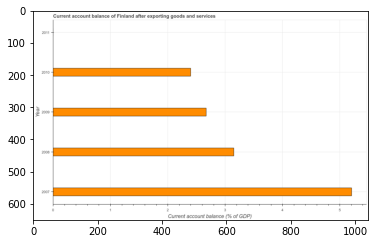

Number of QA =  21





Year  Current account balance (% of GDP)
0  2007                            5.210865
1  2009                            2.689375
2  2011                                 NaN
3  2010                            2.401881
4  2008                            3.135066

> what is the title of the graph ?
PREDICTED =  Current account balance of Finland after exporting goods and services
EXPECTED =  Current account balance of Finland after exporting goods and services




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  Current account balance (% of GDP)
EXPECTED =  Current account balance (% of GDP)




				 2 / 2 = 1.0


> what is the label or title of the y-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 3 / 3 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the current account balance in 2008 and 2009 ?
PREDICTED =  0.4456910741752895
EXPECTED =  0.482




				 3 / 4 = 0.75


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the median current account balance ?
PREDICTED =  3.135065683232364
EXPECTED =  2

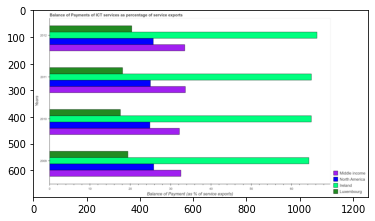

Number of QA =  30





Years  Luxembourg  North America  Middle income    Ireland
0   2012   20.462145      25.629406      33.852799  66.560774
1   2011   18.318410      24.809797      33.793841  65.252368
2   2010   17.695146      24.920371      32.455384  64.759186
3   2009   19.591489      25.834095      32.905089  64.547606

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the balance of payments of ict services in north america in 2009 and that in 2010 ?
PREDICTED =  0.9137236174432033
EXPECTED =  0.9491136144071994




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the balance of payments of ict services in middle income in 2010 and the balance of payments of ict services in luxembourg in 2012 ?
PREDICTED =  -1.397414887111509
EXPECTED =  11.828626098173




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2011, what is the difference between the balance of payments of ict services in middle income and balance of payments of ict services i

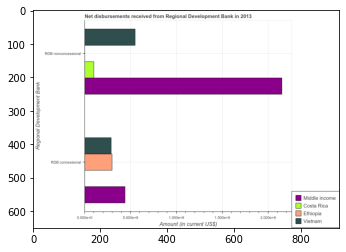

Number of QA =  20





Regional Development Bank  Middle income  Costa Rica  Ethiopia   Vietnam
0          RDB concessional       4.403931         NaN  3.014954  2.918247
1       RDB nonconcessional      21.632827    1.041347       NaN  5.520024

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the net concessional disbursements from rdb in vietnam and that in middle income ?
PREDICTED =  -1.4856835543377724
EXPECTED =  -151083000




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the net concessional disbursements from rdb and net non concessional disbursements from rdb in middle income ?
PREDICTED =  0.0
EXPECTED =  -1711969000




				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the ratio of the net concessional 

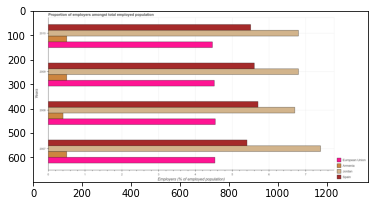

Number of QA =  30





Years     Spain   Armenia    Jordan  European Union
0   2010  5.533190  0.518147  6.894881        4.483673
1   2009  5.597611  0.515479  6.847001        4.552972
2   2007  5.418531  0.519813  7.421643        4.553082
3   2008  5.732951  0.414664  6.676007        4.548158

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the proportion of employers in spain in 2007 and that in 2009 ?
PREDICTED =  -0.17907941799839655
EXPECTED =  -0.19999980926514205




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the proportion of employers in spain in 2009 and the proportion of employers in jordan in 2008 ?
PREDICTED =  -0.135339923555847
EXPECTED =  -1.0999999046325684




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2009, what is the difference between the proportion of employers in jordan and proportion of employers in european union ?
PREDICTED =  9.701646575441536
EXPECTED =  2.28708816282174


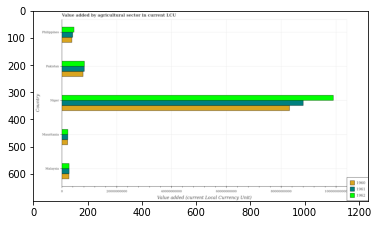

Number of QA =  29





Country          1962          1961          1960
0        Niger  9.969037e+10  8.822416e+10  8.438939e+10
1     Malaysia  2.835470e+09  2.851247e+09  2.768222e+09
2     Pakistan  8.400427e+09  8.337263e+09  7.933395e+09
3   Mauritania  2.359013e+09  2.367961e+09  2.287361e+09
4  Philippines  4.553321e+09  4.129603e+09  3.810350e+09

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the value added by agricultural sector in 1962 in pakistan and that in philippines ?
PREDICTED =  3847105844.064108
EXPECTED =  3799525400.0




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the value added by agricultural sector in 1961 in malaysia and the value added by agricultural sector in 1960 in mauritania?
PREDICTED =  483286599.93517065
EXPECTED =  539107100.0




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the value added by agricultural sector in 1962 and value added by agricultural sector in 1960 in malaysia ?
PREDICTED =  115070383596.

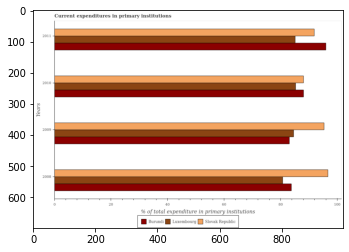

Number of QA =  29





Years  Luxembourg    Burundi  Slovak Republic
0   2011   86.146496  97.307965        92.557467
1   2010   86.301329  89.011727        89.654385
2   2009   84.861898  84.070302        96.462083
3   2008   81.702123  84.690343        97.572687

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the current expenditures in primary institutions in slovak republic in 2010 and that in 2011 ?
PREDICTED =  -2.903082771215608
EXPECTED =  -3.8004074096678835




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the current expenditures in primary institutions in slovak republic in 2009 and the current expenditures in primary institutions in luxembourg in 2011 ?
PREDICTED =  10.315586742596167
EXPECTED =  10.221275329589801




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2010, what is the difference between the current expenditures in primary institutions in luxembourg 

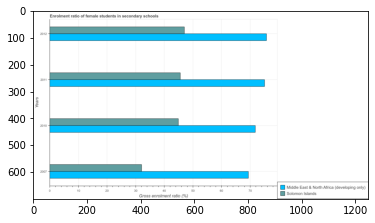

Number of QA =  28





Years  Middle East & North Africa (developing only)  Solomon Islands
0   2012                                     75.444606        46.995250
1   2010                                     71.453837        44.425043
2   2011                                     75.130959        45.579741
3   2007                                     69.398215        32.214139

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the enrolment ratio of female students in secondary schools in solomon islands in 2012 ?
PREDICTED =  11.748812411217092
EXPECTED =  47.00785064697271




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> across all years, what is the maximum enrolment ratio of female students in secondary schools in solomon islands ?
PREDICTED =  11.748812411217092
EXPECTED =  47.00785064697271




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> across all years, what is the minimum enrolment ratio of female students in secondary schools in middle east & north africa (developing only) ?
PREDICTED =  501.75
EXPECTED =  69.3811492919922




				 0 / 3 = 0.0

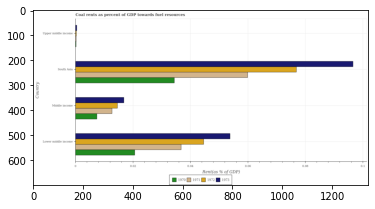

Number of QA =  30





Country      1972      1971      1970      1973
0           South Asia  0.077403  0.060333  0.034769  0.095367
1  Upper middle income  0.000459       NaN       NaN  0.000599
2  Lower middle income       NaN  0.036942  0.020875  0.053900
3        Middle income  0.014731  0.012815  0.007522  0.017116

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the coal rent in 1971 in middle income and that in south asia ?
PREDICTED =  -0.04751809537852603
EXPECTED =  -0.04720304153157




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the coal rent in 1971 in south asia and the coal rent in 1970 in lower middle income?
PREDICTED =  0.023391055314220692
EXPECTED =  0.0392998899550131




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 1 / 3 = 0.3333


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the ratio of the coal rent in 1971 in lower

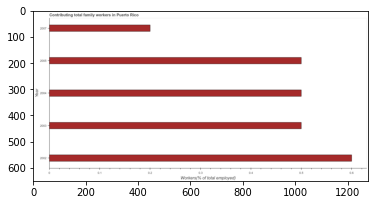

Number of QA =  23





Year  Workers(% of total employed)
0  2004                      0.501062
1  2007                      0.201511
2  2002                      0.602463
3  2005                      0.500722
4  2003                      0.500092

> what is the title of the graph ?
PREDICTED =  Contributing total family workers in Puerto Rico
EXPECTED =  Contributing total family workers in Puerto Rico




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  Workers(% of total employed)
EXPECTED =  Workers(% of total employed)




				 2 / 2 = 1.0


> what is the label or title of the y-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 3 / 3 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the contributing family workers in 2002 and 2007 ?
PREDICTED =  0.40095253103765205
EXPECTED =  0.4




				 4 / 4 = 1.0


> what is the median contributing family workers ?
PREDICTED =  None
EXPECTED =  0.5




				 4 / 6 = 0.6667


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the ratio of the contr

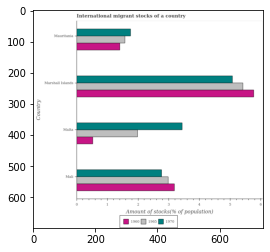

Number of QA =  29





Country      1965      1970      1960
0              Mali       NaN  2.796437  3.180657
1             Malta  1.998534  3.441614  0.543476
2        Mauritania  1.604340  1.772008  1.439793
3  Marshall Islands  5.462619  5.130679  5.815251

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of stocks in in 1970 in malta and that in mauritania ?
PREDICTED =  1.6696064939660973
EXPECTED =  1.68167217988661




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of stocks in in 1965 in malta and the amount of stocks in in 1960 in mauritania?
PREDICTED =  0.39419418910897774
EXPECTED =  0.5773512189991801




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of stocks in in 1960 and amount of stocks in in 1965 in mali ?
PREDICTED =  1.0
EXPECTED =  0.2019829406236




				 1 / 3 = 0.3333


is_built_with_cuda: True
is_

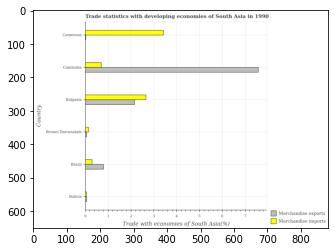

Number of QA =  28





Country  Merchandise imports  Merchandise exports
0           Cameroon             3.478594                  NaN
1  Brunei Darussalam             0.173058             0.080948
2           Cambodia             0.729316             7.632577
3            Bolivia             0.085951                  NaN
4           Bulgaria             2.702351             2.210271
5             Brazil             0.329554             0.846092

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the merchandise exports in bulgaria and that in cambodia ?
PREDICTED =  -5.422305556942421
EXPECTED =  -5.417




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the merchandise exports in bulgaria and the merchandise imports in cambodia ?
PREDICTED =  -5.422305556942421
EXPECTED =  1.4539989363187633




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the merchandise imports and merchandise exports in bolivia ?
PREDICTED =  1.2498039258557416
EXPECTED =  -0.004




				 1 / 3 = 0.3333


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training 

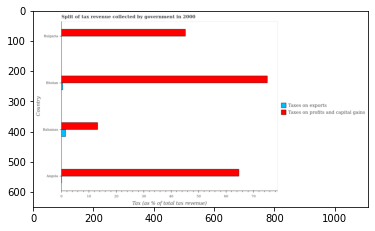

Number of QA =  28





Country  Taxes on profits and capital gains  Taxes on exports
0    Angola                           65.181817               NaN
1  Bulgaria                           45.548005               NaN
2    Bhutan                           75.191570          0.703384
3   Bahamas                           13.404766          1.798139

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of revenue obtained from taxes on profits and capital gains in bahamas and that in bhutan ?
PREDICTED =  -13.40476582894648
EXPECTED =  -61.839




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of revenue obtained from taxes on profits and capital gains in bhutan and the percentage of revenue obtained from taxes on exports in bahamas ?
PREDICTED =  0.0
EXPECTED =  73.53860343784825




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of revenue obtained from taxes on profits and capital gains and percentage o

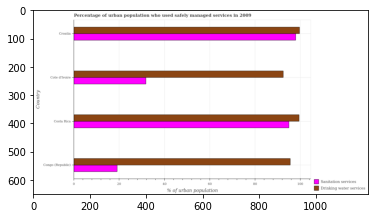

Number of QA =  28





Country  Drinking water services  Sanitation services
0           Croatia               101.000133            98.864292
1        Costa Rica               100.178023            95.766026
2  Congo (Republic)                95.959366            19.523273
3     Cote d'Ivoire                93.625917            32.440920

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of urban population who used sanitation services in congo (republic) and that in cote d'ivoire ?
PREDICTED =  -12.91764657585881
EXPECTED =  -12.7




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of urban population who used sanitation services in croatia and the percentage of urban population who used drinking water services in congo (republic) ?
PREDICTED =  79.34101873363572
EXPECTED =  2.4000000000000057




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of urban population who used sanitation services

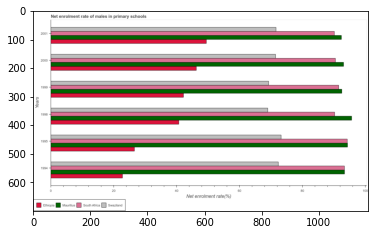

Number of QA =  30





Years  Mauritius  South Africa   Ethiopia  Swaziland
0   2000  92.619014     88.400866  46.802516  73.387017
1   2001  93.477373     91.176073  49.867256  72.061611
2   1994  93.853174     93.006709  23.125377  72.059756
3   1998  94.036130     88.355758  40.893648  69.400933
4   1995  93.843961     92.508952        NaN  74.353164
5   1999  92.229982           NaN  42.545115  69.771278

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the net enrolment rate of males in primary schools in mauritius in 1998 and that in 1999 ?
PREDICTED =  1.8061475057827892
EXPECTED =  3.12931314453121




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the net enrolment rate of males in primary schools in south africa in 1998 and the net enrolment rate of males in primary schools in ethiopia in 2001 ?
PREDICTED =  -2.820315004693555
EXPECTED =  40.79228923828121




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2001, what is the difference between the net enrolment rate of males in primary schools in mauritius and net 

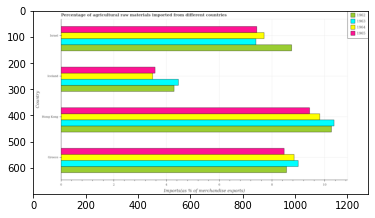

Number of QA =  30





Country      1965      1964       1962       1963
0    Iceland  3.579796  3.473647   4.312898   4.458112
1     Greece  8.508199  8.832722   8.599182   8.968128
2     Israel  7.438107  7.714026   8.835281   7.450244
3  Hong Kong  9.464768  9.764382  10.256882  10.389051

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of imports to different countries in 1964 in greece and the percentage of imports to different countries in 1965 in iceland?
PREDICTED =  0.5263534238196637
EXPECTED =  5.27320032944551




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of imports to different countries in 1963 and percentage of imports to different countries in 1965 in israel ?
PREDICTED =  -3.4381072873226914
EXPECTED =  -0.033307880246499444




				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or pred

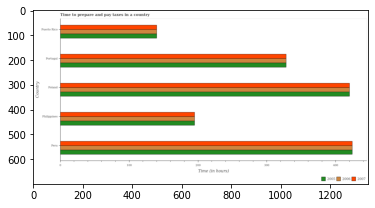

Number of QA =  29





Country        2007        2005        2006
0       Poland  417.816077  420.739730  422.208278
1     Portugal  329.241192  328.862776  328.610995
2          NaN  424.265611  423.823855  424.150576
3  Philippines  194.459101  194.830158         NaN
4  Puerto Rico  141.164926  140.658565  140.730431

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of hours required to prepare and pay taxes in 2007 in peru and that in philippines ?
PREDICTED =  -193.45910115274108
EXPECTED =  229.0




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of hours required to prepare and pay taxes in 2005 in poland and the number of hours required to prepare and pay taxes in 2006 in philippines?
PREDICTED =  -419.7397296958637
EXPECTED =  225.0




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of hours required to prepare and pay taxes in 2005 and number of hours required to prepare and

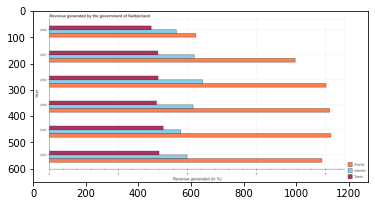

Number of QA =  29





Year     Taxes    Grants  Interest
0  2007  3.181968  7.139439  4.226756
1  2008  2.968733  4.220369  3.687387
2  2005  3.135367  8.095830  4.121538
3  2003  3.217683  7.868189  4.027364
4  2004  3.349683  8.185397  3.837788
5  2006  3.199067  8.029299  4.424186

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of revenue generated by taxes in 2003 and that in 2005 ?
PREDICTED =  0.08231597416099001
EXPECTED =  0.072




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of revenue generated by interest in 2006 and the percentage of revenue generated by grants in 2004 ?
PREDICTED =  0.5863982424413527
EXPECTED =  -3.7102181974759603




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2005, what is the difference between the percentage of revenue generated by grants and percentage of revenue generated by interest ?
PREDICTED =  -20.104649737177418
EXPECT

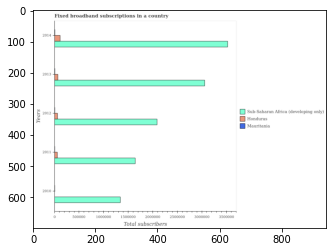

Number of QA =  29





Years  Sub-Saharan Africa (developing only)  Mauritania       Honduras
0   2014                                   NaN         NaN  225906.469421
1   2010                          2.476916e+06         NaN            NaN
2   2012                          3.846833e+06         NaN  130602.625702
3   2011                          3.014652e+06         NaN  130019.569993
4   2013                          5.543557e+06         NaN  145797.191574

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of broadband subscriptions in honduras in 2011 and that in 2014 ?
PREDICTED =  -95886.89942784132
EXPECTED =  -57193.0




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of broadband subscriptions in sub-saharan africa (developing only) in 2010 and the number of broadband subscriptions in honduras in 2012 ?
PREDICTED =  -1369917.445048946
EXPECTED =  1278503.0




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2014, what is the difference between the number of broadband subscriptions in sub-saharan africa (developing only) and number of broadband su

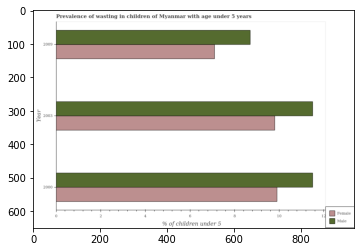

Number of QA =  28





Year    Female       Male
0  2000  9.945968  11.549670
1  2009  7.146261   8.752565
2  2003  9.831368  11.560414

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of undernourished female children in 2003 and that in 2009 ?
PREDICTED =  2.6851067997171185
EXPECTED =  2.7




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of undernourished female children in 2000 and the percentage of undernourished male children in 2003 ?
PREDICTED =  0.11460022538470938
EXPECTED =  -1.6000003814697301




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2009, what is the difference between the percentage of undernourished female children and percentage of undernourished male children ?
PREDICTED =  0.0
EXPECTED =  -1.6

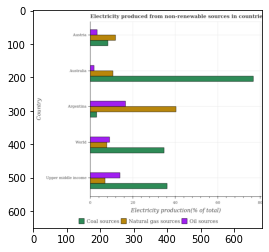

Number of QA =  29





Country  Natural gas sources  Oil sources  Coal sources
0                World             8.011911     9.365081     35.125669
1              Austria            12.148490     3.573769      8.557951
2            Australia            10.954614     2.080687     76.972345
3            Argentina            40.835713    17.040630      3.303566
4  Upper middle income             7.260969    14.374373     36.453643

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of electricity produced by oil sources in australia and that in upper middle income ?
PREDICTED =  -12.293685790515584
EXPECTED =  -12.183




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of electricity produced by oil sources in australia and the percentage of electricity produced by natural gas in austria ?
PREDICTED =  -1.493082699538971
EXPECTED =  -10.09800213179358




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 1 / 3 = 0.3333


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after

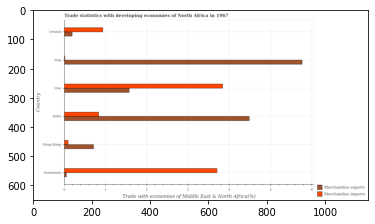

Number of QA =  28





Country  Merchandise imports  Merchandise exports
0       Iran             3.828294                  NaN
1    Ireland             0.947384             0.205567
2      India             0.838844             4.521488
3  Hong Kong             0.107958             0.717321
4       Iraq                  NaN             5.787638
5  Guatemala             3.712308             0.064605

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the merchandise exports in guatemala and that in iran ?
PREDICTED =  0.06460494994047923
EXPECTED =  -1.522




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the merchandise imports in iran and the merchandise exports in hong kong ?
PREDICTED =  3.7203359440513886
EXPECTED =  3.1295999941714983




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the merchandise exports and merchandise imports in ireland ?
PREDICTED =  10.349234346717044
EXPECTED =  -0.743




				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predi

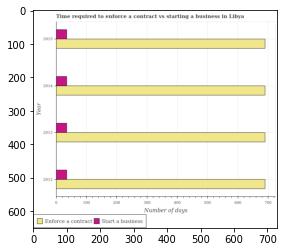

Number of QA =  28





Year  Enforce a contract  Start a business
0  2015          693.314699         36.365899
1  2012          692.671313         36.575850
2  2013          695.880117         36.599137
3  2014                 NaN         36.519658

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of days to start a business in 2012 and that in 2015 ?
PREDICTED =  35.5758497645766
EXPECTED =  0




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of days to start a business in 2012 and the number of days to enforece a contract in 2014 ?
PREDICTED =  0.05619140253732979
EXPECTED =  -655




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2012, what is the difference between the number of days to enforece a contract and number of days to start a business ?
PREDICTED =  -2.0
EXPECTED =  655




				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_ava

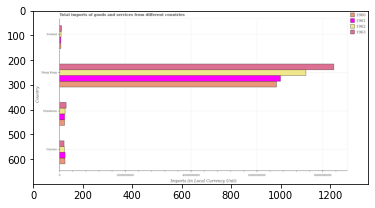

Number of QA =  30





Country          1963          1962          1961          1960
0    Iceland  7.018562e+07  5.769222e+07  4.888518e+07  5.060529e+07
1     Guyana  1.500109e+08  1.624206e+08  1.783863e+08  1.792813e+08
2   Honduras  2.156964e+08  1.847063e+08  1.675198e+08  1.635840e+08
3  Hong Kong  8.357307e+09  7.547328e+09  6.761143e+09  6.645408e+09

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of goods and services imports in 1962 in hong kong and that in iceland ?
PREDICTED =  -7605020210.644786
EXPECTED =  7435483040.0




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of goods and services imports in 1961 in guyana and the amount of goods and services imports in 1963 in hong kong?
PREDICTED =  -3469764756.8183284
EXPECTED =  -8166204700.0




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of goods and services imports in 1962 and amount of goods and services imports in 1961 in iceland ?
PREDICTED =  -57692

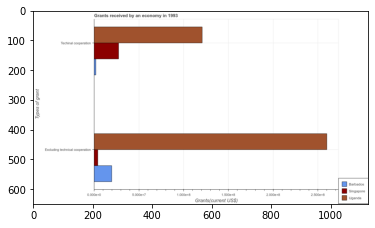

Number of QA =  23





Types of grant  Singapore  Barbados     Uganda
0             Techinal cooperation   5.040933  0.498899  22.004768
1  Excluding technical cooperation   0.902821  3.708325  46.338429

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the amount of grants received(excluding technical cooperation) in barbados ?
PREDICTED =  2.0
EXPECTED =  19650000




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> across all countries, what is the maximum amount of grants received(excluding technical cooperation) ?
PREDICTED =  1.0
EXPECTED =  260040000




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> across all countries, what is the minimum amount of grants received(excluding technical cooperation) ?
PREDICTED =  1.0
EXPECTED =  4070000




				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training s

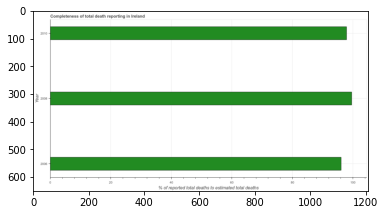

Number of QA =  23





Year  % of reported total deaths to estimated total deaths
0  2008                                         101.212120   
1  2006                                          97.184958   
2  2010                                          97.782866

> what is the title of the graph ?
PREDICTED =  Completeness of total death reporting in Ireland
EXPECTED =  Completeness of total death reporting in Ireland




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  % of reported total deaths to estimated total deaths
EXPECTED =  % of reported total deaths to estimated total deaths




				 2 / 2 = 1.0


> what is the label or title of the y-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 3 / 3 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the completeness of total death reports in 2006 and 2010 ?
PREDICTED =  -0.5979083535447245
EXPECTED =  -1.802




				 3 / 4 = 0.75


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the median completeness of total death reports ?
PREDICTED =  2008.0
EXPE

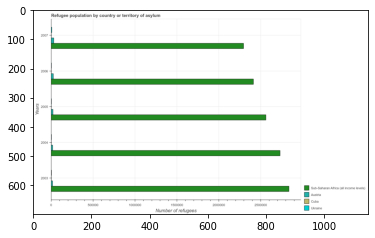

Number of QA =  30





Years  Unnamed: 1  ...  Sub-Saharan Africa (all income levels)  Ukraine
0   2007         NaN  ...                            4.146703e+06      NaN
1   2003         NaN  ...                            5.134564e+06      NaN
2   2005         NaN  ...                            4.626944e+06      NaN
3   2004         NaN  ...                            4.941579e+06      NaN
4   2006         NaN  ...                            4.347784e+06      NaN

[5 rows x 5 columns]

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of refugees in ukraine in 2003 and that in 2004 ?
PREDICTED =  40098.737083080676
EXPECTED =  418.0




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of refugees in sub-saharan africa (all income levels) in 2004 and the number of refugees in cuba in 2007 ?
PREDICTED =  794875.6094858735
EXPECTED =  2730188.0




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2003, what is the difference between the number of refugees in sub-saharan africa (all income levels) and number of refugees in cuba ?
PREDICTED =  0.0
EXPECTED =  2836023.0




				 0 / 3 = 0.

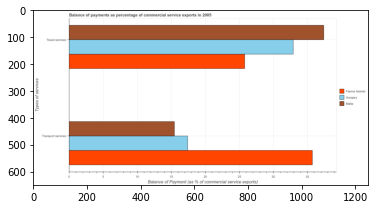

Number of QA =  23





Types of services  Faeroe Islands      Malta    Hungary
0  Transport services       36.017741  15.490109  17.696098
1     Travel services       25.741353  37.472005  32.560611

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the balance of payments of travel services in malta and that in faeroe islands ?
PREDICTED =  11.73065245790449
EXPECTED =  11.620138122939402




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the balance of payments of travel services in faeroe islands and the balance of payments of transport services in malta ?
PREDICTED =  -27.22076121008886
EXPECTED =  10.321693309325601




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the balance of payments of travel services and balance of payments of transport services in faeroe islands ?
PREDICTED =  -36.01

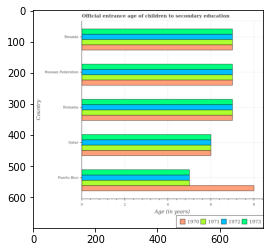

Number of QA =  30





Country      1972      1971      1970      1973
0             Romania       NaN  7.053420  7.069898  7.029822
1              Rwanda  7.036105  7.058279  7.019903  7.043838
2               Qatar       NaN  6.058026  6.076616  6.047015
3  Russian Federation  7.034687  7.063521  7.016328  7.061084
4         Puerto Rico       NaN       NaN  8.074170  5.046017

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the secondary school starting age of children in 1970 in qatar and that in rwanda ?
PREDICTED =  -0.9432865990184265
EXPECTED =  -1.0




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the secondary school starting age of children in 1970 in rwanda and the secondary school starting age of children in 1971 in romania?
PREDICTED =  -0.04999589221072398
EXPECTED =  0.0




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the rat

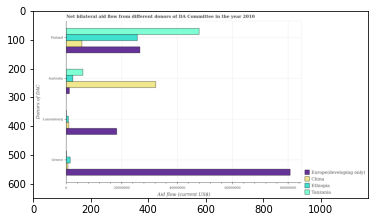

Number of QA =  29





Donors of DAC      Tanzania  ...  Europe(developing only)      Ethiopia
0        Greece           NaN  ...             8.107021e+07  1.575470e+06
1     Australia  6.170670e+06  ...             1.256380e+06  2.509975e+06
2       Finland           NaN  ...             2.671251e+07  2.589783e+07
3    Luxembourg           NaN  ...             1.842843e+07  9.118337e+05

[4 rows x 5 columns]

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of aid given by australia in europe(developing only) and that in tanzania ?
PREDICTED =  0.0
EXPECTED =  -4870000




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of aid given by finland in europe(developing only) and the amount of aid given by australia in china ?
PREDICTED =  -1256379.6664484367
EXPECTED =  -5730000




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of aid given by australia and amount of aid given by luxembourg in ethiopia ?
PREDICTED =  -911832.7419539215
EXPECTED =  1590000




				 0 / 3 = 0.0



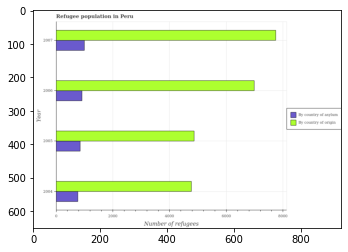

Number of QA =  28





Year  By country of origin  By country of asylum
0  2007           7721.121849           1011.650002
1  2004           4820.580782            787.513028
2  2005           4881.118771            868.089049
3  2006           6973.659214            927.946725

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of refugees by country of origin in 2006 and that in 2007 ?
PREDICTED =  -747.4626347654903
EXPECTED =  -758




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of refugees by country of asylum in 2006 and the number of refugees by country of origin in 2007 ?
PREDICTED =  -6793.175124437804
EXPECTED =  -6832




				 2 / 2 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2004, what is the difference between the number of refugees by country of origin and number of refugees by country of asylum ?
PREDICTED =  -3591.1988027850207
EXPECTED =  4003




				 2 / 3 = 0

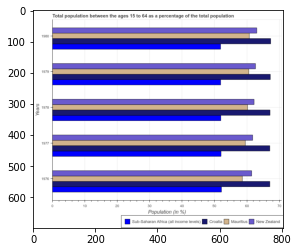

Number of QA =  30





Years  Mauritius  ...  Sub-Saharan Africa (all income levels)    Croatia
0   1979  60.616636  ...                               52.240633  67.868212
1   1980  60.949406  ...                               52.426343  68.322158
2   1976  58.740528  ...                               52.988049  66.956985
3   1977  59.744024  ...                               51.500115  66.500348
4   1978  60.630575  ...                               52.281473  67.332488

[5 rows x 5 columns]

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of the population ages 15 to 64 in mauritius in 1976 and that in 1980 ?
PREDICTED =  -2.208878760346323
EXPECTED =  -2.1641902513476055




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of the population ages 15 to 64 in new zealand in 1978 and the percentage of the population ages 15 to 64 in sub-saharan africa (all income levels) in 1976 ?
PREDICTED =  1.010435497293102
EXPECTED =  10.070198622008




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 1979, what is the difference between the percentage of the population ages 15 to 64 in croat

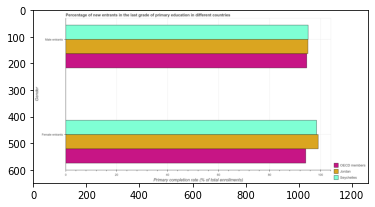

Number of QA =  23





Gender  OECD members  Seychelles     Jordan
0    Male entrants     95.902959   96.202517  95.870147
1  Female entrants     95.319800   99.071922  99.824297

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the primary completion rate of female entrants in oecd members and that in jordan ?
PREDICTED =  -4.504497399774706
EXPECTED =  -4.9015201953125




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the primary completion rate of male entrants in jordan and the primary completion rate of female entrants in seychelles ?
PREDICTED =  -0.33237068347659715
EXPECTED =  -3.390259999999998




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the primary completion rate of male entrants and primary completion rate of female entrants in oecd members ?
PREDICTED =  -

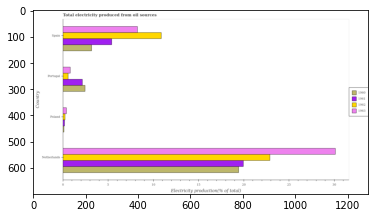

Number of QA =  30





Country       1963       1962       1961       1960
0       Poland   0.432671   0.273396   0.223020        NaN
1     Portugal   0.857297   0.632717   2.185656   2.512234
2        Spain   8.212308  10.935377   5.401272   3.203896
3  Netherlands  30.095532  22.972802  20.050758  19.372898

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total electricity produced in 1962 in poland and that in portugal ?
PREDICTED =  -0.35932069066375566
EXPECTED =  -0.3419630646471499




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total electricity produced in 1962 in portugal and the total electricity produced in 1960 in spain?
PREDICTED =  -10.302660323649627
EXPECTED =  -2.596103128632412




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total electricity produced in 1963 and total electricity produced in 1962 in netherlands ?
PREDICTED =  16.62500591836942
EXPECTED =  7.2405826036

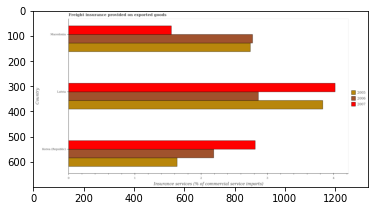

Number of QA =  29





Country      2007      2005      2006
0            Latvia  4.035852  3.848489  2.878337
1         Macedonia  1.567081  2.758784  2.798992
2  Korea (Republic)  2.839667  1.653546  2.203624

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the freight insurance provided on exported goods in 2007 in latvia and that in macedonia ?
PREDICTED =  1.3112559163285127
EXPECTED =  2.4723552229600902




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the freight insurance provided on exported goods in 2006 in macedonia and the freight insurance provided on exported goods in 2007 in korea (republic)?
PREDICTED =  0.5953682311032642
EXPECTED =  -0.03959668902581992




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation f

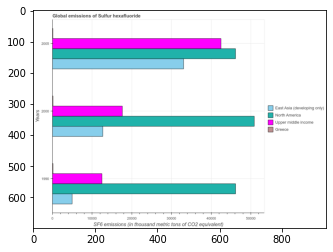

Number of QA =  30





Years  North America  ...  Greece  Upper middle income
0   2005   46050.554476  ...     NaN         42877.619972
1   2000   51395.256632  ...     NaN         17876.157035
2   1990   45950.216434  ...     NaN         12759.190543

[3 rows x 5 columns]

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the global emissions of sulfur hexafluoride in east asia (developing only) in 1990 and that in 2005 ?
PREDICTED =  -28181.443009506864
EXPECTED =  -28097.0380966968




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the global emissions of sulfur hexafluoride in east asia (developing only) in 1990 and the global emissions of sulfur hexafluoride in upper middle income in 2005 ?
PREDICTED =  -28181.443009506864
EXPECTED =  -37519.133080722895




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 1990, what is the difference between the global emissions of sulfur hexafluoride 

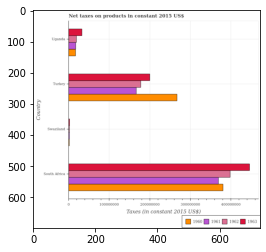

Number of QA =  30





Country          1963          1962          1961          1960
0        Turkey  2.016776e+08  1.790567e+08  1.695989e+08  2.693595e+08
1        Uganda  3.439282e+07  2.104142e+07  1.935408e+07  1.864329e+07
2  South Africa  4.519105e+08  4.010309e+08           NaN  3.820211e+08
3     Swaziland  3.946140e+06           NaN           NaN           NaN

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the net taxes on products in 1962 in swaziland and that in turkey ?
PREDICTED =  -179056740.17889547
EXPECTED =  -176043878.47064415




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the net taxes on products in 1960 in turkey and the net taxes on products in 1963 in uganda?
PREDICTED =  250716222.80756548
EXPECTED =  234635711.0160298




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the net taxes on products in 1963 and net taxes on products in 1961 in turkey ?
PREDICTED =  3382924.652472943
EXPECTED =  33333333.333332986




				 1 / 3 = 0.3333




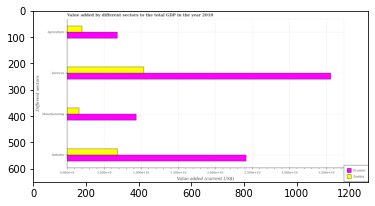

Number of QA =  29





Different sectors     Zambia    Ecuador
0          Services  18.905474  64.594860
1       Agriculture   3.716980  12.395177
2     Manufacturing   3.021764  16.825089
3          Industry  12.383776  43.677294

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the value added by manufacturing sector in ecuador and that in zambia ?
PREDICTED =  13.803325303494518
EXPECTED =  7721488768.50597




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the value added by manufacturing sector in ecuador and the value added by agricultural sector in zambia ?
PREDICTED =  10.086345754075445
EXPECTED =  7320184709.80384




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the value added by agricultural sector and value added by manufacturing sector in ecuador ?
PREDICTED =  -16.825089497457583
EXPECTED =  -2551828000.0




	

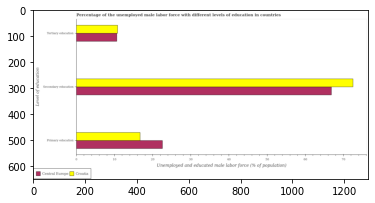

Number of QA =  28





Level of education  Central Europe    Croatia
0    Primary education       22.896025  16.910934
1  Secondary education       67.507814  72.839726
2   Tertiary education       10.894028  10.969122

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of male labor force who received primary education in central europe and that in croatia ?
PREDICTED =  5.9850912680085635
EXPECTED =  5.851080277013001




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of male labor force who received tertiary education in central europe and the percentage of male labor force who received primary education in croatia ?
PREDICTED =  -16.986027410300526
EXPECTED =  -6.1027936199376




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of male labor force who received primary ed

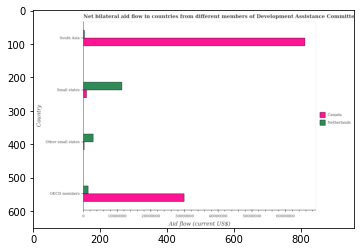

Number of QA =  28





Country   Netherlands        Canada
0  Other small states  3.076504e+06           NaN
1        Small states  1.143503e+07  1.059409e+06
2          South Asia  4.384300e+05  6.593474e+07
3        OECD members  1.547090e+06  2.991356e+07

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of aid given by netherlands in other small states and that in south asia ?
PREDICTED =  14073106.659549415
EXPECTED =  2600000




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of aid given by canada in south asia and the amount of aid given by netherlands in small states ?
PREDICTED =  64875331.8960807
EXPECTED =  54300000




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of aid given by netherlands and amount of aid given by canada in oecd members ?
PREDICTED =  -13416501.266841454
EXPECTED =  -28480000




				 0 /

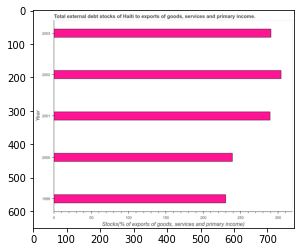

Number of QA =  23





Year  Stocks(% of exports of goods, services and primary income)
0  2000                                         237.016062         
1  2003                                         290.244239         
2  1999                                         229.311269         
3  2002                                         303.175137         
4  2001                                         289.470486

> what is the title of the graph ?
PREDICTED =  Total external debt stocks of Haiti to exports of goods, services and primary income.
EXPECTED =  Total external debt stocks of Haiti to exports of goods, services and primary income.




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  Stocks(% of exports of goods, services and primary income)
EXPECTED =  Stocks(% of exports of goods, services and primary income)




				 2 / 2 = 1.0


> what is the label or title of the y-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 3 / 3 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the external debt stocks in 2000 and 2002 ?
PREDICTED =  -66.15907571566393
EXPECTED =  -65.221




				 4 / 4 = 1.0


> what is the median external debt stocks ?
PREDICTED =  None
EXPECTED =  289.393993966953




				 4 / 6 = 0.6667


is_built_with_cuda: True
is_g

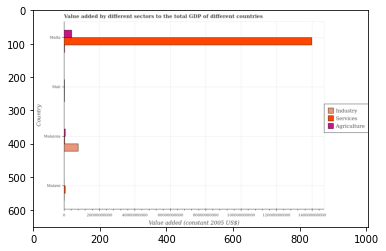

Number of QA =  29





Country      Industry   Agriculture      Services
0      Mali           NaN           NaN           NaN
1    Malawi           NaN           NaN  9.664341e+08
2     Malta           NaN  4.678647e+09  1.414413e+11
3  Malaysia  8.309708e+09           NaN           NaN

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the value added by industrial sector in mali and that in malta ?
PREDICTED =  0.0
EXPECTED =  -147990946.994




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the value added by agricultural sector and value added by services in malaysia ?
PREDICTED =  -136762639511.17625
EXPECTED =  367416300.809




				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the ratio of the value added by agricultural sector in malaysia to that in m

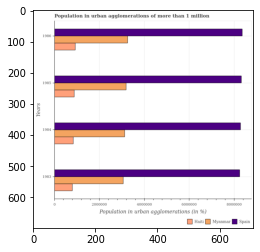

Number of QA =  29





Years         Spain       Myanmar          Haiti
0   1986  8.373915e+06  3.299693e+06  955840.656141
1   1985  8.357971e+06  3.247826e+06  909832.350121
2   1983  8.274816e+06  3.095597e+06  822782.733986
3   1984  8.363772e+06  3.143225e+06  867241.911694

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the population in urban agglomerations in haiti in 1986 ?
PREDICTED =  238960.16403519327
EXPECTED =  926550




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> across all years, what is the maximum population in urban agglomerations in myanmar ?
PREDICTED =  824923.322622889
EXPECTED =  3259255




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> across all years, what is the minimum population in urban agglomerations in spain ?
PREDICTED =  2068703.941251734
EXPECTED =  8248623




				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in 

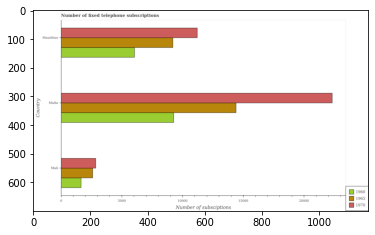

Number of QA =  29





Country          1965          1970          1960
0       Mali   4776.825027   5170.446880   3038.364081
1      Malta  26042.855273  40193.664038  16854.129465
2  Mauritius  16647.362034  20325.468502  11056.532762

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of fixed telephone subscriptions in 1970 in mali and that in mauritius ?
PREDICTED =  -15155.021621638667
EXPECTED =  -8357.0




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of fixed telephone subscriptions in 1965 in mauritius and the number of fixed telephone subscriptions in 1960 in malta?
PREDICTED =  -9395.493238704785
EXPECTED =  -68.0




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of fixed telephone subscriptions in 1960 and number of fixed telephone subscriptions in 1965 in malta ?
PREDICTED =  -26039.855

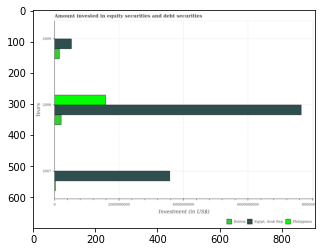

Number of QA =  26





Years  Egypt, Arab Rep.       Bolivia   Philippines
0   2009      5.461477e+08  1.682418e+08           NaN
1   2007      3.508081e+09           NaN           NaN
2   2008      7.716358e+09  2.285442e+08  1.611202e+09

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount invested in equity securities and debt securities in bolivia in 2008 and that in 2009 ?
PREDICTED =  -396785925.98387086
EXPECTED =  54452905.0




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount invested in equity securities and debt securities in egypt, arab rep. in 2009 and the amount invested in equity securities and debt securities in bolivia in 2008 ?
PREDICTED =  -8262505607.408777
EXPECTED =  319007095.0




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2007, what is the difference between the amount invested in equity securities and debt se

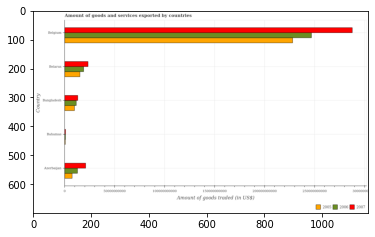

Number of QA =  29





Country          2007          2005          2006
0  Azerbaijan  3.911044e+10  1.463470e+10  2.385157e+10
1     Belarus  4.301402e+10  2.848827e+10  3.502423e+10
2  Bangladesh  2.462628e+10  1.859820e+10  2.204065e+10
3     Bahamas  2.553795e+09           NaN           NaN
4     Belgium  5.231666e+11  4.133932e+11  4.428084e+11

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total amount of goods and services exported in 2007 in bangladesh and that in belgium ?
PREDICTED =  -590806946631.6904
EXPECTED =  -274742751732.0




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total amount of goods and services exported in 2005 in bangladesh and the total amount of goods and services exported in 2006 in azerbaijan?
PREDICTED =  -61721160332.43262
EXPECTED =  -3016700795.0




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total amount of goods and services exported in 2007 and total amount of goods and services export

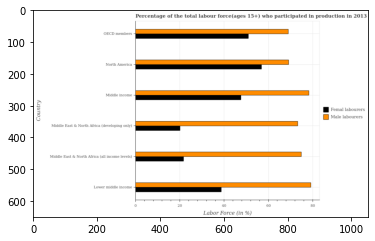

Number of QA =  28





Country  ...  Male labourers
0                                   Middle income  ...       78.206267
1                                    OECD members  ...       70.071262
2                                   North America  ...       69.766950
3                             Lower middle income  ...       79.685086
4  Middle East & North Africa (all income levels)  ...       75.987729
5    Middle East & North Africa (developing only)  ...       73.626088

[6 rows x 3 columns]

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of male labour force in middle east & north africa (all income levels) and that in middle east & north africa (developing only) ?
PREDICTED =  2.361640912182196
EXPECTED =  1.624




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of male labour force in middle income and the percentage of female labor force in north america ?
PREDICTED =  8.439317081361125
EXPECTED =  21.399834722135004




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation fin

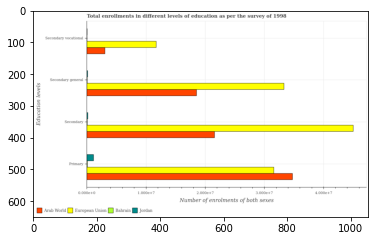

Number of QA =  29





Education levels  Bahrain    Jordan  Arab World  European Union
0               Primary      NaN  0.122522    3.467039             NaN
1     Secondary general      NaN       NaN    1.859972        3.342982
2  Secondary vocational      NaN       NaN    0.315808        1.184802
3             Secondary      NaN  0.024775         NaN        4.500239

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of enrolments in secondary vocational education in european union and that in jordan ?
PREDICTED =  1.0
EXPECTED =  11669551.0




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of enrolments in secondary education in arab world and the number of enrolments in primary education in bahrain ?
PREDICTED =  -2.0
EXPECTED =  21491018.0




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of enrolments in primary education and number of enrolments in secondary education in european union ?
PREDICTED =  -2.0
EXPECTED =  -1341897

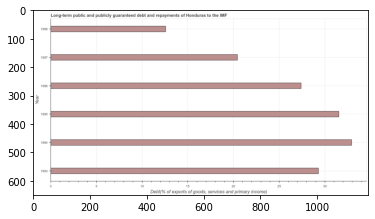

Number of QA =  23





Year  Debt(% of exports of goods, services and primary income)
0  1997                                          20.373647       
1  1998                                          12.607231       
2  1996                                          27.447037       
3  1995                                          31.592211       
4  1994                                          32.895568       
5  1993                                          29.350386

> what is the title of the graph ?
PREDICTED =  Long-term public and publicly guaranteed debt and repayments of Honduras to the IMF
EXPECTED =  Long-term public and publicly guaranteed debt and repayments of Honduras to the IMF




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  Debt(% of exports of goods, services and primary income)
EXPECTED =  Debt(% of exports of goods, services and primary income)




				 2 / 2 = 1.0


> what is the label or title of the y-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 3 / 3 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the debt service in 1993 and 1997 ?
PREDICTED =  8.97673969675768
EXPECTED =  8.865




				 4 / 4 = 1.0


> what is the median debt service ?
PREDICTED =  None
EXPECTED =  28.3504165436675




				 4 / 6 = 0.6667


is_built_with_cuda: True
is_gpu_available: False
GPUs: []

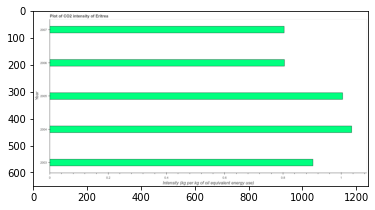

Number of QA =  23





Year  Intensity (kg per kg of oil equivalent energy use)
0  2006                                           0.805939 
1  2007                                           0.802866 
2  2004                                           1.040344 
3  2005                                           1.002990 
4  2003                                           0.905494

> what is the title of the graph ?
PREDICTED =  Plot of CO2 intensity of Eritrea
EXPECTED =  Plot of CO2 intensity of Eritrea




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  Intensity (kg per kg of oil equivalent energy use)
EXPECTED =  Intensity (kg per kg of oil equivalent energy use)




				 2 / 2 = 1.0


> what is the label or title of the y-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 3 / 3 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the co2 intensity in 2005 and 2007 ?
PREDICTED =  0.2001241368886859
EXPECTED =  0.201




				 4 / 4 = 1.0


> what is the median co2 intensity ?
PREDICTED =  None
EXPECTED =  0.902753895103565




				 4 / 6 = 0.6667


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the ratio of the co2 in

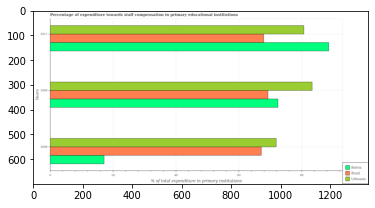

Number of QA =  29





Years    Bolivia     Brazil  Lithuania
0   2011  88.882679  68.230470  81.038426
1   2009  72.892947  69.750519  83.884425
2   2008  17.447627  67.746423  72.894125

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of expenditure towards staff compensation in brazil in 2009 and that in 2011 ?
PREDICTED =  1.520049328322628
EXPECTED =  1.3611679077148011




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of expenditure towards staff compensation in brazil in 2009 and the percentage of expenditure towards staff compensation in lithuania in 2011 ?
PREDICTED =  1.520049328322628
EXPECTED =  -11.404220581054702




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2009, what is the difference between the percentage of expenditure towards staff compensation in 

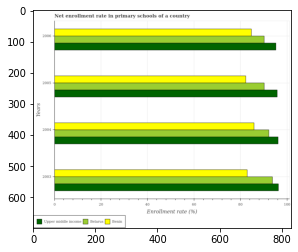

Number of QA =  29





Years    Belarus  Upper middle income      Benin
0   2006  91.238927            96.134461        NaN
1   2004  93.286901            96.620059  85.894071
2   2005  90.332163            96.686967  82.690934
3   2003  94.378912            96.994288        NaN

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the enrollment rate in primary schools in upper middle income in 2004 and that in 2006 ?
PREDICTED =  0.4855981672037899
EXPECTED =  0.945098876953125




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the enrollment rate in primary schools in belarus in 2005 and the enrollment rate in primary schools in upper middle income in 2003 ?
PREDICTED =  -4.046749175317373
EXPECTED =  -6.104843139648494




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training 

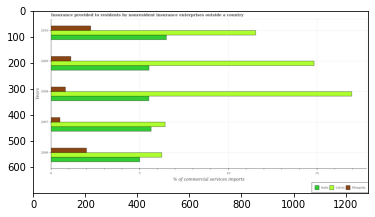

Number of QA =  29





Years     Latvia     India  Mongolia
0   2008  16.950758  5.585995  0.833749
1   2010  11.479092       NaN  2.280441
2   2007        NaN  5.635624  0.529632
3   2009  14.982966  5.554854  1.144522
4   2006   6.219081  4.988904  2.044229

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the insurance provided to residents in mongolia in 2006 and that in 2008 ?
PREDICTED =  1.2104798952834401
EXPECTED =  1.1867695794156292




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the insurance provided to residents in mongolia in 2008 and the insurance provided to residents in latvia in 2007 ?
PREDICTED =  -0.4531816773469436
EXPECTED =  -5.6207577890025195




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 1 / 3 = 0.3333


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the

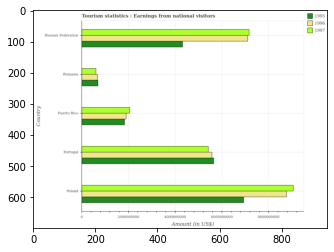

Number of QA =  29





Country          1996          1997          1995
0              Poland  8.882423e+09  9.157107e+09  6.972445e+09
1            Portugal  5.634072e+09  5.490092e+09  5.774849e+09
2             Romania  7.130771e+08  6.392732e+08  7.248813e+08
3         Puerto Rico  1.930976e+09  2.095288e+09  1.878173e+09
4  Russian Federation  7.216016e+09  7.217762e+09  4.365325e+09

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the earnings from national visitors in 1995 in poland and that in romania ?
PREDICTED =  6247564005.844792
EXPECTED =  6238000000.0




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the earnings from national visitors in 1995 in russian federation and the earnings from national visitors in 1996 in portugal?
PREDICTED =  0.2
EXPECTED =  -1260000000.0




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the earnings from national visitors in 1996 and earnings from national visitors in 1997 in poland ?
PREDICTED =  9585384832.197292
EXPECTED =  -289000000.

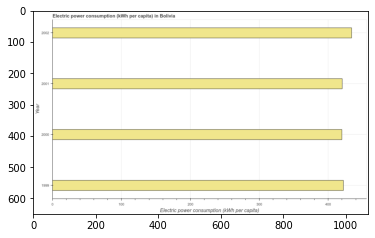

Number of QA =  23





Year  Electric power consumption (kWh per capita)
0  2002                                   436.670488
1  2001                                   421.043394
2  2000                                   420.915833
3  1999                                   424.847552

> what is the title of the graph ?
PREDICTED =  Electric power consumption (kWh per capita) in Bolivia
EXPECTED =  Electric power consumption (kWh per capita) in Bolivia




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  Electric power consumption (kWh per capita)
EXPECTED =  Electric power consumption (kWh per capita)




				 2 / 2 = 1.0


> what is the label or title of the y-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 3 / 3 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the electric power consumption in 1999 and 2000 ?
PREDICTED =  3.9317195169756474
EXPECTED =  2.179




				 3 / 4 = 0.75


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the median electric power consumption ?
PREDICTED =  422.9454729848431
EXPECTED =  421.142

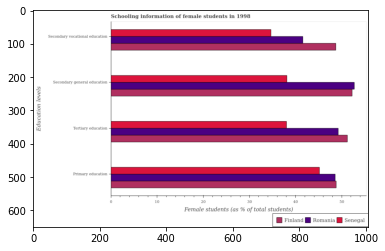

Number of QA =  29





Education levels    Senegal    Finland    Romania
0              Tertiary education  38.520614  51.945847  49.450247
1     Secondary general education  38.542045  52.846284  53.324089
2               Primary education  45.635669  49.195981  48.829515
3  Secondary vocational education  35.051401  48.885032  41.803391

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of female students in secondary vocational education in finland and that in romania ?
PREDICTED =  7.081640888230702
EXPECTED =  7.145949999999999




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of female students in tertiary education in romania and the percentage of female students in secondary vocational education in senegal ?
PREDICTED =  14.39884571914601
EXPECTED =  14.574649999999998




				 2 / 2 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of female students in secondary vocational education and percenta

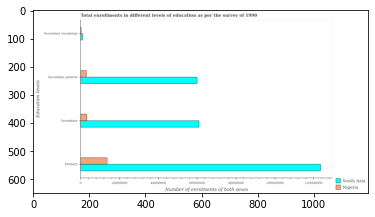

Number of QA =  29





Education levels    South Asia       Nigeria
0             Secondary  6.104726e+07  3.535489e+06
1               Primary  1.239781e+08  1.374720e+07
2  Secondary vocational  1.310592e+06           NaN
3     Secondary general  6.015821e+07  3.303499e+06

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of enrolments in secondary general education in south asia and that in nigeria ?
PREDICTED =  -1.0
EXPECTED =  57020206.0




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of enrolments in secondary vocational education in nigeria and the number of enrolments in secondary education in south asia ?
PREDICTED =  -62357849.847736
EXPECTED =  -60671726.0




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of enrolments in secondary education and number of enrolments in primary education in nigeria ?
PREDICTED =  0.0
EXPECTE

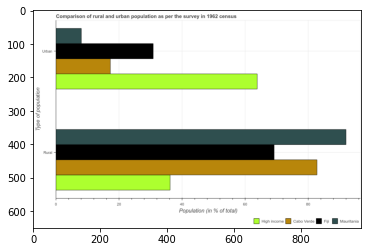

Number of QA =  23





Type of population  Unnamed: 1  Mauritania  Cabo Verde  High income
0              Urban   31.096386    8.236257    17.40709    64.367307
1              Rural   69.435470   92.755849    82.99831    36.446824

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the urban population in high income and that in cabo verde ?
PREDICTED =  46.96021754027961
EXPECTED =  46.588828690354305




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the rural population and urban population in cabo verde ?
PREDICTED =  19.232769894326708
EXPECTED =  65.55200000000002




				 1 / 3 = 0.3333


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the ratio of the rural population in high income to that in cabo verde ?
PREDIC

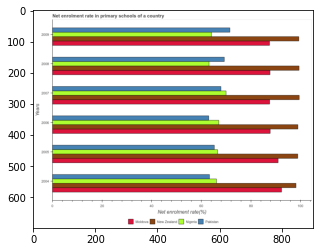

Number of QA =  30





Years    Moldova  New Zealand    Nigeria   Pakistan
0   2004  91.851543    97.451220  66.464987  63.621288
1   2008  87.465854    96.475235  64.021547  69.205497
2   2007  87.447198    98.333783        NaN  68.026672
3   2009  87.431844   101.094911  63.895787  70.494818
4   2005  91.057528    98.241320        NaN  65.356280
5   2006  89.759068   101.818656        NaN  63.318366

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the net enrolment rate in primary schools in new zealand in 2004 and that in 2008 ?
PREDICTED =  0.9759848790631054
EXPECTED =  -1.2404632568358807




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the net enrolment rate in primary schools in nigeria in 2006 and the net enrolment rate in primary schools in new zealand in 2008 ?
PREDICTED =  63.895787081486404
EXPECTED =  -32.36517333984369




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2008, what is the difference between the net enrolment rate in primary schools in moldova and net enrolment rate in primary schools 

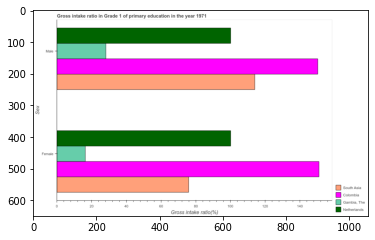

Number of QA =  23





Sex    Colombia  Gambia, The  South Asia  Netherlands
0    Male  150.338318    28.268787  114.074943   100.496262
1  Female  151.175693    16.503317   76.511495   100.487663

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 4 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 5 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 6 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predic

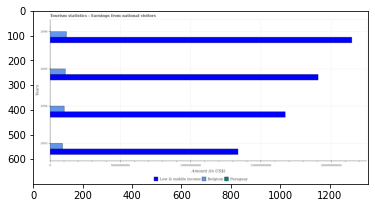

Number of QA =  29





Years       Belgium  Paraguay  Low & middle income
0   2005  2.017754e+10       NaN         3.458809e+11
1   2004  1.865636e+10       NaN         3.029443e+11
2   2003  1.643061e+10       NaN         2.427742e+11
3   2006  2.162577e+10       NaN         3.886089e+11

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the earnings from national visitors in paraguay in 2004 and that in 2005 ?
PREDICTED =  -42936571051.90759
EXPECTED =  -9000000




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the earnings from national visitors in paraguay in 2004 and the earnings from national visitors in low & middle income in 2006 ?
PREDICTED =  -85664552514.70386
EXPECTED =  -214556350863.554




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2006, what is the difference between the earnings from national visitors in paraguay and earnings from national visitors in belgium ?
PREDICTED =  -25724529

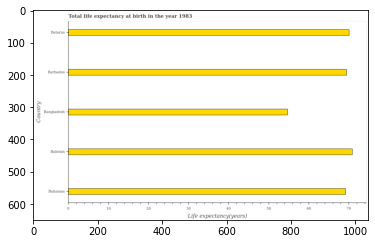

Number of QA =  22





Country  Life expectancy(years)
0     Bahrain               70.583315
1     Belarus               70.047222
2     Bahamas               68.990015
3    Barbados               69.465272
4  Bangladesh               54.571551

> what is the title of the graph ?
PREDICTED =  Total life expectancy at birth in the year 1983
EXPECTED =  Total life expectancy at birth in the year 1983




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  Life expectancy(years)
EXPECTED =  Life expectancy(years)




				 2 / 2 = 1.0


> what is the label or title of the y-axis ?
PREDICTED =  Country
EXPECTED =  Country




				 3 / 3 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the life expectancy at birth in bahrain and belarus ?
PREDICTED =  0.5360931325497802
EXPECTED =  0.799




				 3 / 4 = 0.75


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the median life expectancy at birth ?
PREDICTED =  69.46527151997702
EXPECTED =  69.4166097560976




				 4 / 5 = 0.8


is_built_with_c

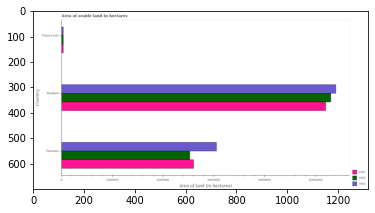

Number of QA =  29





Country          1963          1962          1961
0  Timor-Leste  1.020403e+05  1.003766e+05  1.023206e+05
1     Tanzania  6.164832e+06  5.068118e+06  5.256759e+06
2     Thailand  1.083327e+07  1.072095e+07  1.044834e+07

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total arable land in 1963 in tanzania and that in thailand ?
PREDICTED =  -4668434.860796086
EXPECTED =  -4700000.0




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total arable land in 1963 in thailand and the total arable land in 1962 in timor-leste?
PREDICTED =  10731226.275458017
EXPECTED =  10730000.0




				 2 / 2 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total arable land in 1963 and total arable land in 1962 in timor-leste ?
PREDICTED =  6166495.469121975
EXPECTED =  0.0




				 2 / 3 = 0.6667


is_built_with_cuda: True
is_gpu_availab

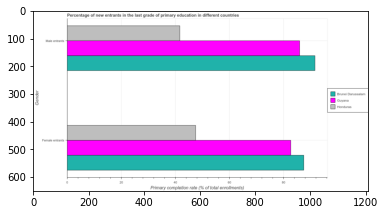

Number of QA =  23





Gender  Brunei Darussalam     Guyana   Honduras
0    Male entrants          91.754285  85.365961  41.994578
1  Female entrants          88.222499  83.530440  47.922638

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the primary completion rate of male entrants in brunei darussalam and that in honduras ?
PREDICTED =  49.759706601440165
EXPECTED =  49.95328




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the primary completion rate of female entrants in brunei darussalam and the primary completion rate of male entrants in honduras ?
PREDICTED =  46.22792120224182
EXPECTED =  45.814910000000005




				 2 / 2 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the primary completion rate of female entrants and primary completion rate of male entrants in honduras ?
PREDICTED =  41

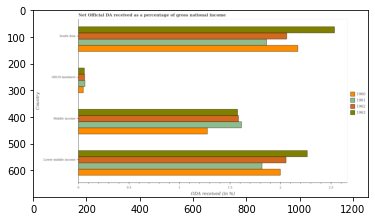

Number of QA =  30





Country      1963      1962      1961      1960
0  Lower middle income  2.265464  2.072442  1.804576  2.000052
1        Middle income  1.589938  1.581314  1.621600       NaN
2         OECD members  0.064804  0.067788  0.070630  0.054247
3           South Asia  2.537870       NaN  1.857970  2.189348

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the net official da received in 1960 in lower middle income and that in south asia ?
PREDICTED =  -0.18929541596198218
EXPECTED =  -0.17306968667559985




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the net official da received in 1960 in lower middle income and the net official da received in 1961 in middle income?
PREDICTED =  0.0
EXPECTED =  0.38480498422617004




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the r

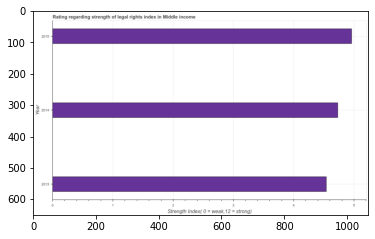

Number of QA =  23





Year  Strength Index( 0 = weak, 12 = strong
0  2015                               4.979128
1  2013                               4.562221
2  2014                               4.746068

> what is the title of the graph ?
PREDICTED =  Rating regarding strength of legal rights index in Middle income
EXPECTED =  Rating regarding strength of legal rights index in Middle income




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  Strength Index( 0 = weak, 12 = strong
EXPECTED =  Strength Index( 0 = weak,12 = strong)




				 1 / 2 = 0.5


> what is the label or title of the y-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 2 / 3 = 0.6667


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the strength of legal rights index in 2013 and 2015 ?
PREDICTED =  -0.4169069938458865
EXPECTED =  -0.42




				 3 / 4 = 0.75


> what is the median strength of legal rights index ?
PREDICTED =  None
EXPECTED =  4.73




				 3 / 6 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished 

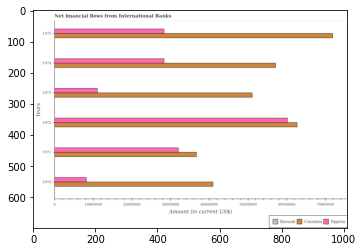

Number of QA =  26





Years  Burundi       Nigeria      Colombia
0   1973      NaN  1.117317e+07  5.125939e+07
1   1974      NaN  2.847932e+07  5.781466e+07
2   1970      NaN  8.394498e+06  4.086611e+07
3   1975      NaN  2.851748e+07  7.423195e+07
4   1971      NaN  3.225347e+07           NaN
5   1972      NaN  6.035364e+07  6.275110e+07

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the net financial aid flows in nigeria in 1970 and that in 1971 ?
PREDICTED =  -23858971.97651025
EXPECTED =  -23761000




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the net financial aid flows in colombia in 1970 and the net financial aid flows in burundi in 1975 ?
PREDICTED =  -33365840.2749615
EXPECTED =  40974000




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 1973, what is the difference between the net financial aid flows in nigeria and net financial aid flows in colombia ?
PREDICTED =  169171573.57269487
EXPECTED =  -40013000




				 1 / 3 = 0.3333


is_b

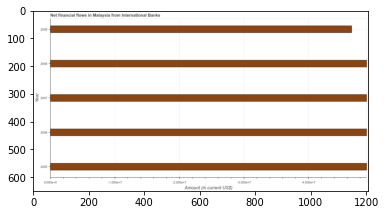

Number of QA =  12





Year  Amount (in current US$)
0  2008                 4.918323
1  2009                 4.655615
2  2006                 4.894674
3  2007                 4.910082
4  2005                 4.897544

> what is the title of the graph ?
PREDICTED =  Net financial flows in Malaysia from International Banks
EXPECTED =  Net financial flows in Malaysia from International Banks




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  Amount (in current US$)
EXPECTED =  Amount (in current US$)




				 2 / 2 = 1.0


> what is the label or title of the y-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 3 / 3 = 1.0


> what is the median net financial flows from ibrd ?
PREDICTED =  None
EXPECTED =  0.0




				 3 / 5 = 0.6


> what is the difference between two consecutive major ticks on the x-axis ?
PREDICTED =  Amount (in current US$)
EXPECTED =  10000000.0




				 3 / 6 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the net financial flows from ibrd in 2006 ?
EXPECTED =  0
PREDICTED =  4.894673952116303





				 3 / 7 = 0.4286 


> across all years, what is t

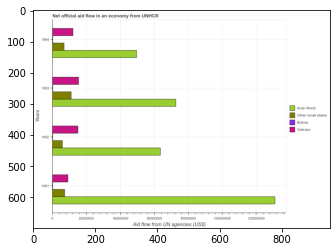

Number of QA =  30





Years    Arab World  Bolivia  Other small states       Vietnam
0   1991  1.313505e+08      NaN        7.558979e+06  9.448666e+06
1   1992  6.368256e+07      NaN        6.235994e+06  1.522301e+07
2   1994  4.999990e+07      NaN        7.201482e+06  1.243030e+07
3   1993  7.328513e+07      NaN        1.146934e+07  1.573630e+07

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the net official aid flow in other small states in 1991 and that in 1993 ?
PREDICTED =  -3910357.1845313404
EXPECTED =  -3860000




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the net official aid flow in arab world in 1992 and the net official aid flow in bolivia in 1994 ?
PREDICTED =  13682658.839776471
EXPECTED =  63390000.0




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 1992, what is the difference between the net official aid flow in other small states and net official aid flow in arab world ?
PREDICTED =  11467343.492208986
EXPECTED =  -57720000




				 1 

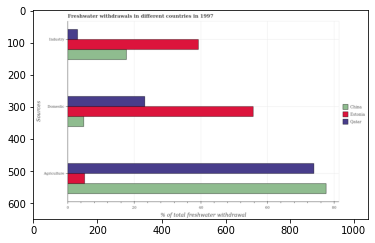

Number of QA =  28





Sources    Estonia      China      Qatar
0     Industry  39.834122  17.867147   3.023695
1     Domestic  56.178459   4.911235  23.290451
2  Agriculture   5.056700  77.684673  73.878306

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of freshwater withdrawal for industry in qatar and that in estonia ?
PREDICTED =  -36.810427044174155
EXPECTED =  -36.292




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of freshwater withdrawal for agriculture in qatar and the percentage of freshwater withdrawal for domestic purposes in china ?
PREDICTED =  71.87830568984678
EXPECTED =  69.131




				 2 / 2 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of freshwater withdrawal for domestic purposes and percentage of freshwater withdrawal for industry in qatar ?
P

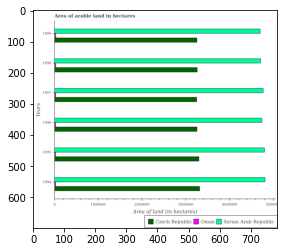

Number of QA =  29





Years  Syrian Arab Republic          Oman  Czech Republic
0   1994          4.847326e+06  41979.749152    3.335173e+06
1   1995          4.847715e+06  42156.033077    3.340542e+06
2   1998          4.756566e+06  43282.200638    3.300002e+06
3   1997          4.824696e+06  41669.044646    3.285452e+06
4   1999          4.691923e+06  43810.670846    3.272979e+06
5   1996          4.756784e+06  40787.188945    3.297849e+06

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total arable land in oman in 1995 and that in 1998 ?
PREDICTED =  -1126.1675607597645
EXPECTED =  -3000




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total arable land in syrian arab republic in 1994 and the total arable land in czech republic in 1996 ?
PREDICTED =  90542.2638529921
EXPECTED =  1555000.0




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 1996, what is the difference between the total arable land in oman and total arable land in czech republic ?
PREDICTED =  -3229168.2849193024
EXPECTED =  -3229000.0




				 1 / 3 = 0.3333


is_built_with_cu

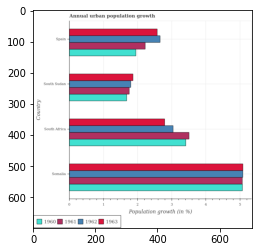

Number of QA =  30





Country      1963      1962      1961      1960
0       Somalia  5.089821  5.084361  5.093233  5.076483
1         Spain  2.591780  2.663033  2.224251  1.965508
2  South Africa  2.807225  3.041954  3.517255  3.435194
3   South Sudan  1.885849  1.817879  1.781539  1.696569

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of urban population growth in 1963 in somalia and that in south sudan ?
PREDICTED =  3.2039715392701833
EXPECTED =  3.2236302545485325




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of urban population growth in 1960 in somalia and the percentage of urban population growth in 1963 in south africa?
PREDICTED =  1.641288794712163
EXPECTED =  2.2797995905445902




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of urban population growth in 1960 and percentage of urban population growth in 1962 in somalia ?

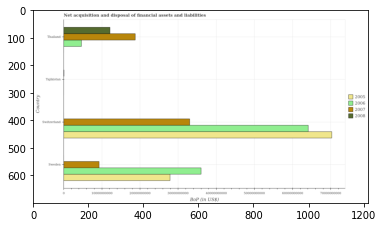

Number of QA =  27





Country          2007          2005          2006          2008
0   Tajikistan           NaN           NaN           NaN           NaN
1       Sweden  9.457744e+09  2.806656e+10  3.612100e+10           NaN
2  Switzerland  3.313668e+10  7.064814e+10  6.432629e+10           NaN
3     Thailand  1.893185e+10           NaN  4.667141e+09  1.207624e+10

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the balance of payments in 2006 in sweden and that in switzerland ?
PREDICTED =  -28205287111.519257
EXPECTED =  -28090162911.0




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the balance of payments in 2005 in switzerland and the balance of payments in 2006 in sweden?
PREDICTED =  42581578420.56395
EXPECTED =  34274843550.0




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the balance of payments in 2007 and balance of payments in 2006 in switzerland ?
PREDICTED =  -2800011078.077751
EXPECTED =  -31069537360.0




				 1 / 3 = 0.3333


is_built_wi

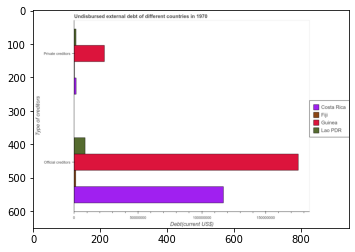

Number of QA =  23





Type of creditors    Costa Rica          Fiji        Guinea       Lao PDR
0  Official creditors  2.118885e+08  2.869599e+06  3.149627e+08  1.625740e+07
1   Private creditors  3.549877e+06           NaN  4.337967e+07  3.250508e+06

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the undisbursed external debt of private creditors in costa rica and that in fiji ?
PREDICTED =  3549877.31051232
EXPECTED =  1347000




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the undisbursed external debt of official creditors in guinea and the undisbursed external debt of private creditors in fiji ?
PREDICTED =  312093060.208403
EXPECTED =  175319000




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the undisbursed external debt of private creditors and undisbursed external debt of official creditors in fiji ?
PREDICTED =  680277.8107896694

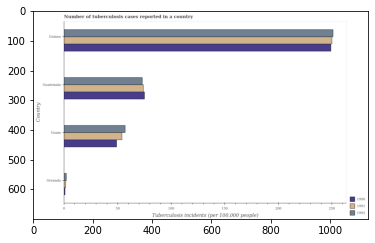

Number of QA =  29





Country        1992        1990        1991
0     Guinea  450.278671  449.287388  448.046428
1       Guam  104.394314   89.390299   98.392848
2    Grenada    4.990340    2.894221    3.871997
3  Guatemala  133.353392  136.150836  134.708185

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of tuberculosis cases reported in in 1991 in guam and that in guatemala ?
PREDICTED =  -36.31533680947534
EXPECTED =  -20.0




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of tuberculosis cases reported in in 1990 in guam and the number of tuberculosis cases reported in in 1991 in guinea?
PREDICTED =  -359.8970890024181
EXPECTED =  -201.0




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of tuberculosis cases reported in in 1992 and number of tuberculosis cases reported in in 1991 in grenada ?
PREDICTED =  0.1280031

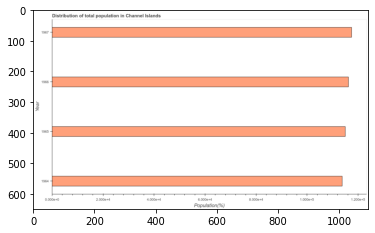

Number of QA =  23





Year  Population(%)
0  1966      11.604206
1  1965      11.520867
2  1964      11.492137
3  1967      11.736365

> what is the title of the graph ?
PREDICTED =  Distribution of total population in Channel Islands
EXPECTED =  Distribution of total population in Channel Islands 




				 0 / 1 = 0.0


> what is the label or title of the x-axis ?
PREDICTED =  Population(%)
EXPECTED =  Population(%)




				 1 / 2 = 0.5


> what is the label or title of the y-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 2 / 3 = 0.6667


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the population in 1964 and 1965 ?
PREDICTED =  -0.028730232931563293
EXPECTED =  -1214.0




				 2 / 4 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the median population ?
PREDICTED =  11.562536677702465
EXPECTED =  115609.0




				 2 / 5 = 0.4


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Traini

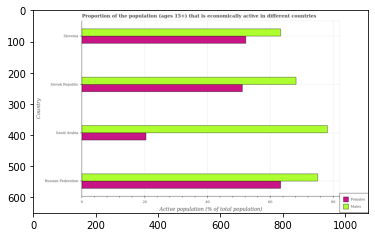

Number of QA =  28





Country      Males    Females
0            Slovenia  63.483749  52.166793
1        Saudi Arabia  77.841590  20.876029
2     Slovak Republic  68.716501  51.175119
3  Russian Federation  75.075077  63.654149

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of economically active female population in russian federation and that in slovenia ?
PREDICTED =  0.25
EXPECTED =  11.1




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of economically active male population in slovak republic and the percentage of economically active female population in saudi arabia ?
PREDICTED =  -9.125088123018116
EXPECTED =  47.7999973297119




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of economically active female population and percentage of economically active male populatio

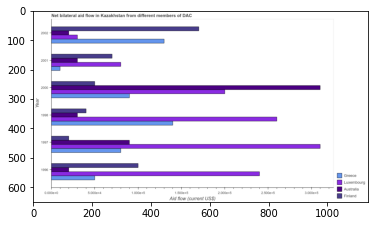

Number of QA =  30





Year  Luxembourg  Australia    Finland     Greece
0  1997   55.510671  16.530760   3.715185  14.493338
1  1996   43.376497   3.682618  18.175148   9.096048
2  2000   36.431411  55.741667   9.119147  16.398561
3  2002    5.521324   3.683909  30.749398        NaN
4  2001   14.649575   5.542551  12.600299   1.900096
5  1998   46.745351   5.489055   7.292479  25.123379

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of aid given by australia in 1998 and that in 2000 ?
PREDICTED =  -50.25261212479141
EXPECTED =  -280000




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of aid given by greece in 2000 and the amount of aid given by australia in 1997 ?
PREDICTED =  1.9052228396828585
EXPECTED =  0




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 1997, what is the difference between the amount of aid given by luxembourg and amount of aid given by greece ?
PREDICTED =  -61.49009925237811
EXPECTED =  230000




				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_ava

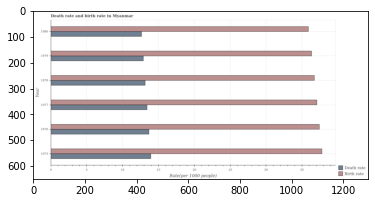

Number of QA =  28





Year  Birth rate  Death rate
0  1980   35.990341   12.714809
1  1978   36.790285         NaN
2  1979   36.738592   12.930087
3  1976   37.467862   13.636673
4  1977   37.030164   13.468885
5  1975   38.126726   13.890076

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the death rate in 1975 and that in 1980 ?
PREDICTED =  1.17526775845376
EXPECTED =  1.292




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the birth rate in 1975 and the death rate in 1980 ?
PREDICTED =  2.136385802562245
EXPECTED =  25.142




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 1979, what is the difference between the birth rate and death rate ?
PREDICTED =  23.27553215707034
EXPECTED =  23.446




				 1 / 3 = 0.3333


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> wha

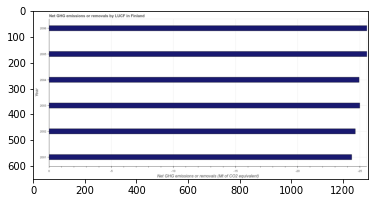

Number of QA =  12





Year  Net GHG emissions or removals (Mt of CO2 equivalent)
0  2002                                          24.791657   
1  2006                                          25.577625   
2  2005                                          25.329778   
3  2003                                          25.074099   
4  2004                                          24.961485   
5  2001                                          24.382807

> what is the title of the graph ?
PREDICTED =  Net GHG emissions or removals by LUCF in Finland
EXPECTED =  Net GHG emissions or removals by LUCF in Finland




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  Net GHG emissions or removals (Mt of CO2 equivalent)
EXPECTED =  Net GHG emissions or removals (Mt of CO2 equivalent)




				 2 / 2 = 1.0


> what is the label or title of the y-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 3 / 3 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the median ghg net emissions or removals ?
PREDICTED =  25.01779185511435
EXPECTED =  0.0




				 3 / 4 = 0.75


> what is the difference between two consecutive major ticks on the x-axis ?
PREDICTED =  Net GHG emissions or removals (Mt of CO2 equivalent)
EXPECTED =  5.0




				 3 / 5 = 0.6


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicti

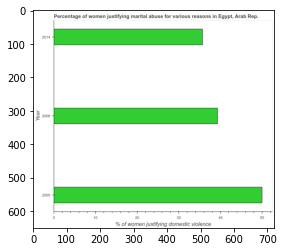

Number of QA =  23





Year  % of women justifying domestic violence
0  2014                                 35.90687
1  2005                                 50.62913
2  2008                                 39.41446

> what is the title of the graph ?
PREDICTED =  Percentage of women justifying marital abuse for various reasons in Egypt, Arab Rep.
EXPECTED =  Percentage of women justifying marital abuse for various reasons in Egypt, Arab Rep.




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  % of women justifying domestic violence
EXPECTED =  % of women justifying domestic violence




				 2 / 2 = 1.0


> what is the label or title of the y-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 3 / 3 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of women justifying marital abuse in 2005 and 2008 ?
PREDICTED =  11.21466928747094
EXPECTED =  10.7




				 4 / 4 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the median percentage o

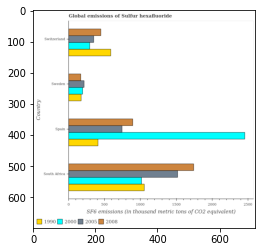

Number of QA =  30





Country         2005         2000         1990         2008
0         Spain  1380.861130  4460.833273   750.865007  1641.615803
1  South Africa          NaN  1854.100151  1922.735138  3178.672718
2        Sweden   406.938291   370.566958   335.950336   319.719919
3   Switzerland   649.849904   549.844211  1080.563930   823.408334

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the global emissions of sulfur hexafluoride in 2000 in spain and that in sweden ?
PREDICTED =  4090.2663147427406
EXPECTED =  2262.5




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the global emissions of sulfur hexafluoride in 2000 in switzerland and the global emissions of sulfur hexafluoride in 2005 in sweden?
PREDICTED =  179.2772521681432
EXPECTED =  78.90000000000003




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the global emissions of sulfur hexafluoride in 2000 and global emissions of sulfur hexafluoride in 1990 in spain ?
PREDICTED =  

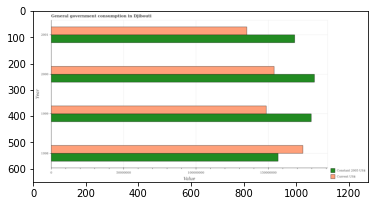

Number of QA =  28





Year   Current US$  Constant 2005 US$
0  2001  2.453090e+08       3.035740e+08
1  2000  2.812059e+08       3.301367e+08
2  1998  3.130043e+08       2.827792e+08
3  1999  2.680742e+08       3.241797e+08

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the value consumed in current us$ in 1999 and that in 2000 ?
PREDICTED =  -13131736.17425111
EXPECTED =  -5424795.044




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the value consumed in current us$ in 2000 and the value consumed in constant 2005 us$ in 2001 ?
PREDICTED =  35896952.04521102
EXPECTED =  -14179106.820780009




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 1999, what is the difference between the value consumed in current us$ and value consumed in constant 2005 us$ ?
PREDICTED =  36105960.63381797
EXPECTED =  -31074956.195




				 0 / 3 = 0.0


is_bu

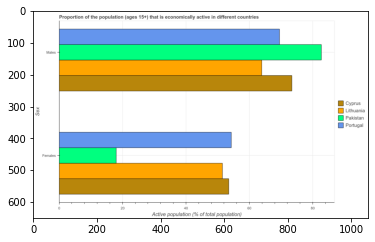

Number of QA =  23





Sex   Portugal  Lithuania     Cyprus   Pakistan
0    Males  69.200211  63.969441  73.803824  82.895272
1  Females  54.500709  52.054463  53.862470  17.973668

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of economically active female population in cyprus and that in portugal ?
PREDICTED =  -0.6382396654490918
EXPECTED =  -0.7999992370604971




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of economically active female population in pakistan and the percentage of economically active male population in lithuania ?
PREDICTED =  -34.080795812911475
EXPECTED =  -45.9000015258789




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of economically active male population and percentage of economically active female

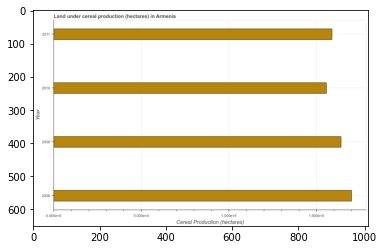

Number of QA =  23





Year  Cereal Production (hectares)
0  2008                     31.093495
1  2009                     29.706223
2  2011                     28.750991
3  2010                     28.313826

> what is the title of the graph ?
PREDICTED =  Land under cereal production (hectares) in Armenia
EXPECTED =  Land under cereal production (hectares) in Armenia




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  Cereal Production (hectares)
EXPECTED =  Cereal Production (hectares)




				 2 / 2 = 1.0


> what is the label or title of the y-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 3 / 3 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the land under cereal production in 2009 and 2010 ?
PREDICTED =  1.3923970188108257
EXPECTED =  8348.0




				 3 / 4 = 0.75


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the median land under cereal production ?
PREDICTED =  2009.5
EXPECTED =  161426.0




				 3 / 5 = 0.6


is_built_with_cuda:

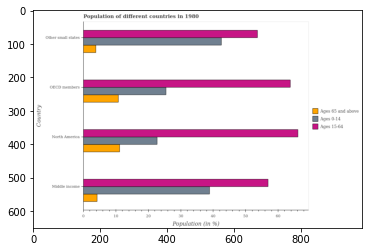

Number of QA =  29





Country  Ages 65 and above  Ages 0-14  Ages 15-64
0        OECD members          10.945372  25.621860   63.555013
1       Middle income           4.421115  39.063224   56.984668
2  Other small states           4.019424  42.724927   54.080305
3       North America          11.418631  23.017347   66.956254

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of population within the age-group of 65 and above in middle income and that in oecd members ?
PREDICTED =  6.997515866907246
EXPECTED =  -6.565




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of population within the age-group 15-64 and percentage of population within the age-group 0-14 in other small states ?
PREDICTED =  24.231327205279293
EXPECTED =  11.129




				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training st

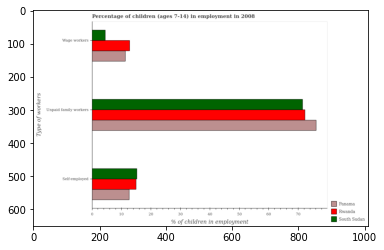

Number of QA =  28





Type of workers     Rwanda     Panama  South Sudan
0           Wage workers  13.090560  11.660987     4.676987
1          Self-employed  15.298159  13.047600    15.700663
2  Unpaid family workers  73.475012  77.385596    72.353399

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of children employed as unpaid family workers in rwanda and that in panama ?
PREDICTED =  -3.910583990665387
EXPECTED =  -3.8100000000000023




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of children employed as wage workers in panama and the percentage of self employed children in rwanda ?
PREDICTED =  -16.72773189361657
EXPECTED =  -3.6499999999999986




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 1 / 3 = 0.3333


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0

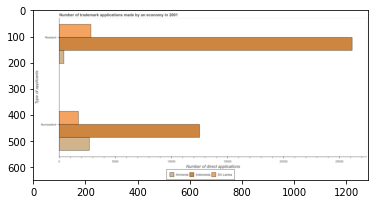

Number of QA =  23





Type of applicants       Armenia      Indonesia     Sri Lanka
0           Resident   5136.790119  309242.048170  33277.488801
1        Nonresident  31749.672484  147921.828073  20433.063517

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of trademark applications made by non residents in armenia and that in sri lanka ?
PREDICTED =  0.0
EXPECTED =  978




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of trademark applications made by residents in sri lanka and the number of trademark applications made by non residents in armenia ?
PREDICTED =  -1.0
EXPECTED =  135




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of trademark applications made by non residents and number of trademark applications made by residents in armenia ?
PREDICTED =  0.0
EXPECTE

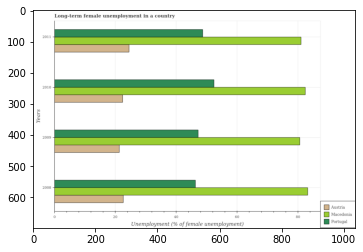

Number of QA =  29





Years   Portugal    Austria  Macedonia
0   2010  52.759998  22.771946  83.025771
1   2011  48.915462  24.889521  81.895512
2   2008  46.855401  23.012411  84.752945
3   2009  47.459515  21.806591  80.964786

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of long-term unemployed female population in portugal in 2009 and that in 2011 ?
PREDICTED =  -1.4559471440338854
EXPECTED =  -1.5




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of long-term unemployed female population in austria in 2009 and the percentage of long-term unemployed female population in portugal in 2008 ?
PREDICTED =  -1.2058201486259463
EXPECTED =  -24.999999999999996




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2008, what is the difference between the percentage of long-term unemployed female population in portugal

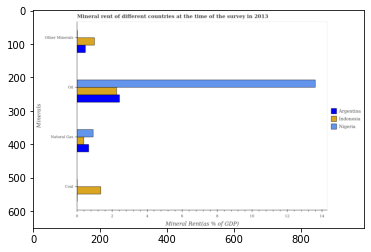

Number of QA =  29





Minerals  Unnamed: 1    Nigeria  Indonesia
0            Coal         NaN        NaN   1.396380
1  Other Minerals    0.511548        NaN   1.037340
2     Natural Gas    0.699616   0.954162   0.416081
3             Oil    2.457040  13.603682   2.288997

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the oil rent and natural gas rent in argentina ?
PREDICTED =  1.5028789098058914
EXPECTED =  1.764104106582406




				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the ratio of the  rent of other minerals in indonesia to that in argentina ?
PREDICTED =  2.027845081066266
EXPECTED =  2.089844299154061




				 1 / 4 = 0.25


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Ev

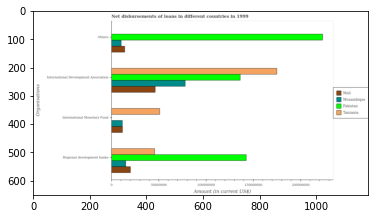

Number of QA =  26





Organisations  ...      Pakistan
0                                 Others  ...  4.052089e+08
1             Regional development banks  ...  2.636083e+08
2            International Monetary Fund  ...           NaN
3  International Development Association  ...  2.476771e+08

[4 rows x 5 columns]

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of loan disimbursed by international development association in mali and that in mozambique ?
PREDICTED =  -58850812.00577247
EXPECTED =  -31718000




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of loan disimbursed by international monetary fund in mali and the amount of loan disimbursed by other organisations in mozambique ?
PREDICTED =  -19494160.158000525
EXPECTED =  1333000




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of loan disimbursed by international monetary fund and amount of loan disimbursed by inte

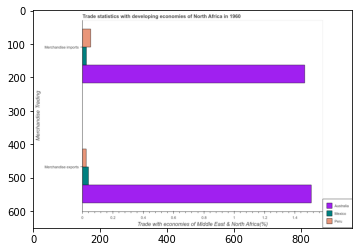

Number of QA =  23





Merchandise Trading  Unnamed: 1  Australia    Mexico
0  Merchandise imports    0.058773   1.467911  0.031030
1  Merchandise exports    0.030447   1.510900  0.044294

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the ratio of the merchandise exports in peru to that in australia ?
PREDICTED =  0.029316134829740156
EXPECTED =  0.016224214815052495




				 0 / 4 = 0.0


> what is the difference between two consecutive major ticks on the x-axis ?
PREDICTED =  Trade with economies of Middle East & North Africa(%)
EXPECTED =  0.2




				 0 / 5 = 0.0


> what is the title of the graph ?
PREDICTED =  Trade 

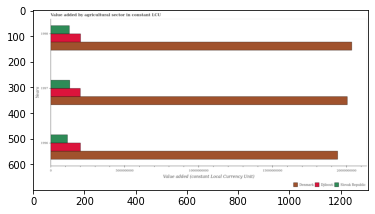

Number of QA =  29





Years      Djibouti  Slovak Republic       Denmark
0   1998  3.715734e+09     2.341290e+09  3.666578e+10
1   1996  3.652115e+09     2.086227e+09  3.485298e+10
2   1997  3.697676e+09     2.387391e+09  3.621731e+10

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the value added by agricultural sector in djibouti in 1997 and that in 1998 ?
PREDICTED =  -18058118.683300972
EXPECTED =  -15458600.0




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the value added by agricultural sector in slovak republic in 1996 and the value added by agricultural sector in djibouti in 1997 ?
PREDICTED =  -301163679.4609628
EXPECTED =  -872489600.0




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 1997, what is the difference between the value added by agricultural sector in denmark and value added by agricultural sector in djibouti ?
PREDICTED = 

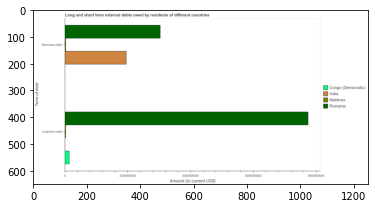

Number of QA =  20





Term of debt       Romania  ...      Maldives  Congo (Democratic)
0   Long-term debt  7.814161e+09  ...           NaN        1.523214e+08
1  Short-term debt  3.055868e+09  ...  3.586516e+07                 NaN

[2 rows x 5 columns]

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the short-term debts owed by residents in maldives and that in romania ?
PREDICTED =  -3020002659.8134584
EXPECTED =  -3008000000




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 1 / 3 = 0.3333


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the ratio of the long-term debts owed by residents in romania to that in congo (democratic) ?
PREDICTED =  51.300480488267546
EXPECTED =  56.69330402930403




				 1 / 4 = 0.25


> what is the difference between two consecutiv

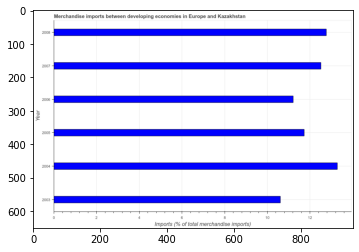

Number of QA =  23





Year  Imports (% of total merchandise imports)
0  2004                                 13.292656
1  2008                                 12.779786
2  2005                                 11.799507
3  2007                                 12.563127
4  2006                                 11.267011
5  2003                                 10.654683

> what is the title of the graph ?
PREDICTED =  Merchandise imports between developing economies in Europe and Kazakhstan
EXPECTED =  Merchandise imports between developing economies in Europe and Kazakhstan




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  Imports (% of total merchandise imports)
EXPECTED =  Imports (% of total merchandise imports)




				 2 / 2 = 1.0


> what is the label or title of the y-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 3 / 3 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the merchandise imports in 2004 and 2006 ?
PREDICTED =  2.0256454694864985
EXPECTED =  2.067




				 4 / 4 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the median merchandise imports ?
PREDICTED =  12.181316945061518
E

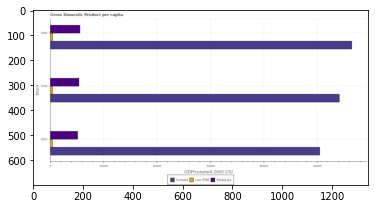

Number of QA =  29





Years       Iceland     Malaysia     Lao PDR
0   2004  54070.126706  5540.924111  536.604320
1   2003  50302.740829  5233.805133  537.868762
2   2005  56701.469231  5768.639128  573.762448

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the gdp per capita in iceland in 2003 and that in 2005 ?
PREDICTED =  -6398.728401915905
EXPECTED =  -5995.1398816647925




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the gdp per capita in iceland in 2004 and the gdp per capita in malaysia in 2003 ?
PREDICTED =  48836.321572318586
EXPECTED =  48989.083481831185




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2004, what is the difference between the gdp per capita in malaysia and gdp per capita in iceland ?
PREDICTED =  5765.639127788803
EXPECTED =  -48741.068700213014




				 1 / 3 = 0.3333


is_built_with_cuda:

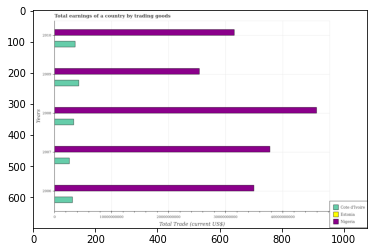

Number of QA =  26





Years  Estonia       Nigeria  Cote d'Ivoire
0   2010      NaN  3.151573e+10   3.763555e+09
1   2007      NaN  3.798587e+10   2.722149e+09
2   2006      NaN  3.507993e+10   3.231985e+09
3   2009      NaN  2.565835e+10   4.422947e+09
4   2008      NaN  4.624047e+10   3.467279e+09

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total earnings in cote d'ivoire in 2007 and that in 2010 ?
PREDICTED =  -1041406076.2222819
EXPECTED =  -1010565548.0




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total earnings in cote d'ivoire in 2010 and the total earnings in nigeria in 2009 ?
PREDICTED =  -659392143.892952
EXPECTED =  -21766504560.0




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2006, what is the difference between the total earnings in nigeria and total earnings in cote d'ivoire ?
PREDICTED =  38053973346.66666
EXPECTED =  31794367744.0




				 1 / 3 = 0.3333


is_built_with_cuda:

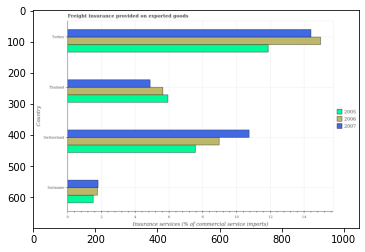

Number of QA =  29





Country       2007       2005       2006
0       Turkey  14.496256  11.865456  14.943290
1  Switzerland  10.822110   7.541038   9.052149
2     Thailand   4.910880   5.975201   5.674634
3     Suriname   1.848419   1.547892   1.799224

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the freight insurance provided on exported goods in 2005 in thailand and that in turkey ?
PREDICTED =  -5.890254773135032
EXPECTED =  -5.938747499408719




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the freight insurance provided on exported goods in 2007 in thailand and the freight insurance provided on exported goods in 2005 in switzerland?
PREDICTED =  -5.911229851981575
EXPECTED =  -2.6795112838667716




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 1 / 3 = 0.3333


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finish

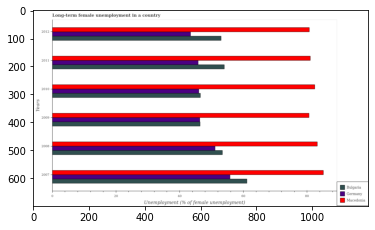

Number of QA =  29





Years   Bulgaria    Germany  Macedonia
0   2009  46.529554  47.018370  80.546213
1   2011  54.316103  46.449894  81.000204
2   2012  53.359209  43.841826  81.256800
3   2010  46.536062  46.443313  82.965080
4   2007  61.446946  56.290720  85.347215
5   2008  54.260655  51.704890  83.476020

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of long-term unemployed female population in bulgaria in 2011 and that in 2012 ?
PREDICTED =  0.9568941566271931
EXPECTED =  1.0




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of long-term unemployed female population in bulgaria in 2011 and the percentage of long-term unemployed female population in macedonia in 2012 ?
PREDICTED =  0.9568941566271931
EXPECTED =  -26.6999969482422




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2007, what is the difference between the percentage of long-term unemployed female population in germany and

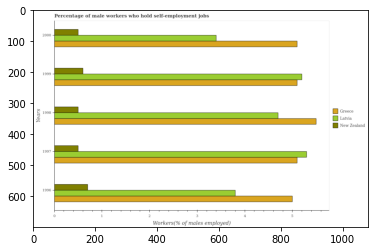

Number of QA =  29





Years  New Zealand    Latvia    Greece
0   2000     0.518936  3.428630  5.131232
1   1997     0.508219  5.341376  5.178472
2   1999     0.617393  5.234214  5.166360
3   1998     0.517471  4.748804  5.561040
4   1996     0.712003       NaN  5.038450

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of self-employed male workers in latvia in 1996 and that in 1997 ?
PREDICTED =  -5.341375976233897
EXPECTED =  -1.5000002384185822




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of self-employed male workers in new zealand in 1996 and the percentage of self-employed male workers in latvia in 2000 ?
PREDICTED =  0.19306630598542895
EXPECTED =  -2.700000107288359




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training s

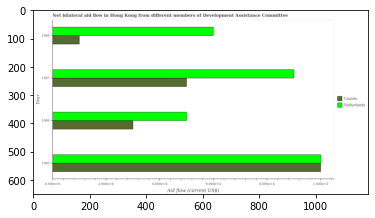

Number of QA =  28





Year  Netherlands     Canada
0  1988     6.048935   1.013208
1  1987     9.097371   5.048183
2  1986     5.096286   3.042276
3  1985    10.143601  10.043116

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of aid given by netherlands in 1985 and that in 1988 ?
PREDICTED =  4.09466620742223
EXPECTED =  40000




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of aid given by netherlands in 1985 and the amount of aid given by canada in 1986 ?
PREDICTED =  5.047314778557023
EXPECTED =  70000




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 1988, what is the difference between the amount of aid given by canada and amount of aid given by netherlands ?
PREDICTED =  -11.23940831742696
EXPECTED =  -50000




				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu

In [ ]:
# IMAGE_IDs = list(map(str, plot_types["hbar_categorical"][:5]))
# NO_CSV = 2

# IMAGE_IDs = []
# files = random.sample(csvs, NO_CSV)
# for f in files:
#   w = f.split("/content/final_csv/")[-1]
#   IMAGE_IDs.append(w.split(".csv")[0])

per_img_data_h = []
IMG_COUNT = 0
for TEST_IMG in h_IMAGE_IDs:

  TOTAL_QA = 0
  TOTAL_CORRECT_QA = 0
  
  IMG_COUNT += 1
  print("Image number = ", IMG_COUNT)
  print("\n\n")
  
  IMAGE_ID = TEST_IMG

  ind, plotqa_questions, plotqa_answers = display_image_qa_pairs(IMAGE_ID)

  df = pd.read_csv('/content/final_csv/' + IMAGE_ID + '.csv')
  

  dic_labels = dict()
  for col in df.columns:
    if col == 'xlabel':
      dic_labels['xlabel'] = df['xlabel'].iloc[-1].strip()
    elif col == 'ylabel':
      dic_labels['ylabel'] = df['ylabel'].iloc[-1].strip()
    elif col == 'title':
      dic_labels['title'] = df['title'].iloc[-1].strip()
  

  df.drop(axis = 1 , labels = ['Unknown' , 'xlabel' , 'ylabel' ,'title' , 'legend orientation'] , inplace= True, errors = 'ignore')
  columns = list(df.columns)

  display(df)

  data = get_list_of_list('/content/final_csv/' + IMAGE_ID + '.csv', False)

  question_answer = dict()
  for i, q in enumerate(plotqa_questions):
      question_answer[q.lower()] = plotqa_answers[i]

  questions = plotqa_questions    

  tapas_questions, tabfact_questions = binary_classifier_predict(questions)
  tapas_find_answers(tapas_questions, columns, data, question_answer, dic_labels)
  tabfact_find_answers(data, tabfact_questions, columns, question_answer) 

  ACCURACY = round(TOTAL_CORRECT_QA * 100 / TOTAL_QA, 4)
  per_img_data_h.append([TEST_IMG, TOTAL_CORRECT_QA, TOTAL_QA, ACCURACY])

In [ ]:
per_img_data_h

[['16148', 11, 21, 52.381],
 ['13238', 14, 29, 48.2759],
 ['12651', 7, 20, 35.0],
 ['12822', 14, 29, 48.2759],
 ['9889', 7, 17, 41.1765],
 ['11619', 13, 28, 46.4286],
 ['7240', 5, 27, 18.5185],
 ['14212', 8, 30, 26.6667],
 ['16196', 14, 24, 58.3333],
 ['10742', 14, 29, 48.2759],
 ['6069', 10, 28, 35.7143],
 ['7421', 11, 28, 39.2857],
 ['5665', 15, 28, 53.5714],
 ['12581', 13, 29, 44.8276],
 ['14726', 9, 25, 36.0],
 ['10294', 10, 29, 34.4828],
 ['11480', 14, 28, 50.0],
 ['11663', 8, 29, 27.5862],
 ['6589', 12, 27, 44.4444],
 ['11178', 10, 24, 41.6667],
 ['5892', 13, 27, 48.1481],
 ['7353', 9, 28, 32.1429],
 ['13792', 6, 18, 33.3333],
 ['7942', 6, 24, 25.0],
 ['15123', 12, 23, 52.1739],
 ['12254', 10, 30, 33.3333],
 ['11061', 7, 23, 30.4348],
 ['12966', 6, 18, 33.3333],
 ['12050', 6, 29, 20.6897],
 ['6296', 16, 27, 59.2593],
 ['14275', 12, 29, 41.3793],
 ['8727', 5, 12, 41.6667],
 ['13059', 13, 30, 43.3333],
 ['9732', 13, 29, 44.8276],
 ['13974', 14, 29, 48.2759],
 ['14695', 7, 18, 38.88

In [ ]:
df_hor_per_img = pd.DataFrame(per_img_data_h, columns=["Image ID", "Correct QA", "Total QA", "Accuracy"])
df_hor_per_img

Image ID  Correct QA  Total QA  Accuracy
0     16148          11        21   52.3810
1     13238          14        29   48.2759
2     12651           7        20   35.0000
3     12822          14        29   48.2759
4      9889           7        17   41.1765
..      ...         ...       ...       ...
95     9455          13        26   50.0000
96     8045          13        29   44.8276
97    11011          14        28   50.0000
98     9148           7        28   25.0000
99     6132          10        27   37.0370

[100 rows x 4 columns]

In [ ]:
print(f"AVERAGE ACCURACY FOR HORIZONTAL IMGS = {round(df_hor_per_img['Accuracy'].mean(), 4)} %")

AVERAGE ACCURACY FOR HORIZONTAL IMGS = 40.5009 %


## Vertical Images

In [ ]:
v_IMAGE_IDs = []
count = 100
# files = random.sample(csvs)
for f in csvs:
  if not count:
    break

  w = f.split("/content/final_csv/")[-1]
  imgid = w.split(".csv")[0]
  if int(imgid) in plot_types["vbar_categorical"]:
    v_IMAGE_IDs.append(imgid)
    count -= 1

In [ ]:
v_IMAGE_IDs

['32448',
 '32897',
 '22421',
 '22955',
 '33321',
 '31624',
 '28322',
 '32410',
 '23249',
 '25674',
 '31570',
 '25689',
 '23002',
 '22659',
 '32682',
 '26734',
 '27511',
 '24699',
 '28182',
 '32435',
 '25322',
 '24365',
 '31180',
 '28414',
 '31267',
 '22716',
 '24746',
 '29007',
 '26252',
 '23549',
 '31259',
 '22427',
 '27741',
 '27633',
 '25641',
 '30126',
 '33176',
 '31323',
 '30825',
 '23831',
 '24049',
 '25222',
 '28781',
 '33000',
 '22605',
 '25284',
 '22842',
 '32414',
 '26737',
 '26720',
 '27191',
 '32029',
 '27952',
 '26235',
 '28384',
 '25772',
 '24896',
 '23115',
 '28742',
 '33031',
 '24381',
 '31550',
 '30253',
 '31745',
 '26533',
 '29382',
 '25872',
 '32613',
 '22714',
 '28051',
 '30321',
 '23992',
 '22970',
 '33441',
 '33457',
 '32721',
 '24656',
 '33565',
 '32626',
 '24589',
 '24370',
 '29272',
 '27803',
 '26477',
 '30025',
 '27155',
 '23711',
 '30854',
 '25442',
 '27925',
 '24425',
 '23108',
 '25130',
 '33574',
 '31640',
 '31377',
 '22696',
 '25551',
 '27150',
 '30482']

In [ ]:
len(v_IMAGE_IDs)

100

Image number =  1




Image:

/content/plotqa/TEST/png/32448.png


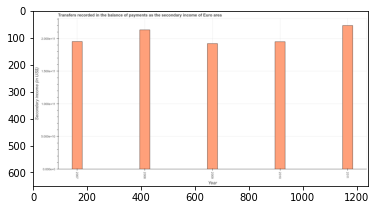

Number of QA =  23





Year  Secondary income (in US$)
0  2009                   1.948100
1  2008                   2.156453
2  2010                   1.970516
3  2011                   2.219115
4  2007                   1.976026

> what is the title of the graph ?
PREDICTED =  ransfers recorded in the balance of payments as the secondary income of Euro area
EXPECTED =  Transfers recorded in the balance of payments as the secondary income of Euro area




				 0 / 1 = 0.0


> what is the label or title of the x-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 1 / 2 = 0.5


> what is the label or title of the y-axis ?
PREDICTED =  Secondary income (in US$)
EXPECTED =  Secondary income (in US$)




				 2 / 3 = 0.6667


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of secondary income in 2008 and 2010 ?
PREDICTED =  0.18593649311914362
EXPECTED =  18151018443.2




				 2 / 4 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the median amount of secondary income ?
PREDICTED =  2009.0


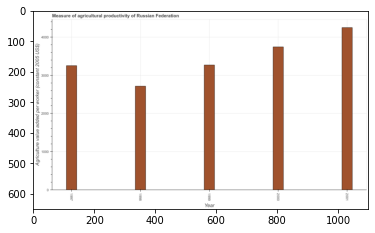

Number of QA =  23





Year  Agriculture value added per worker (constant 2005 US$)
0  2000                                        3730.833596     
1  1997                                        3253.863915     
2  1998                                        2725.605755     
3  1999                                        3277.259154     
4  2001                                        4266.494268

> what is the title of the graph ?
PREDICTED =  Measure of agricultural productivity of Russian Federation
EXPECTED =  Measure of agricultural productivity of Russian Federation




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 2 / 2 = 1.0


> what is the label or title of the y-axis ?
PREDICTED =  Agriculture value added per worker (constant 2005 US$)
EXPECTED =  Agriculture value added per worker (constant 2005 US$)




				 3 / 3 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the agriculture value added per worker in 1997 and 2001 ?
PREDICTED =  -1012.6303534148369
EXPECTED =  -997.793




				 4 / 4 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the median agriculture value added per worker ?
P

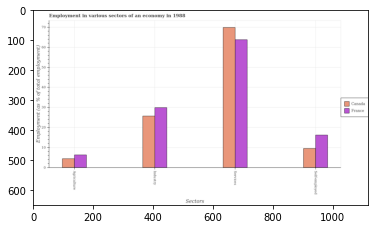

Number of QA =  29





Sectors     France     Canada
0     Agriculture   6.502249   4.727159
1        Industry  29.987725  25.979219
2        Services  63.854947  69.520713
3  Self-em ployed  16.525696   9.849115

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of workers in industry in france and the percentage of workers in agriculture in canada?
PREDICTED =  14.63453614380211
EXPECTED =  25.499999523162877




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the ratio of the percentage of workers in agriculture in canada to that in france ?
PREDICTED =  0.727003659361675
EXPECTED =  0.6984126924056797




				 1 / 4 = 0.25


is_built_with_cuda: True

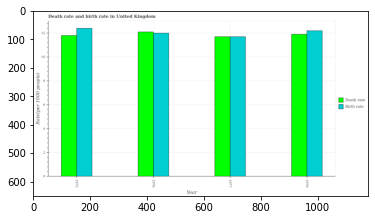

Number of QA =  28





Year  Death rate  Birth rate
0  1978   12.058476   12.214578
1  1976   12.114657   12.041610
2  1975   11.795959   12.420426
3  1977   11.704161   11.763517

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the birth rate in 1976 and that in 1977 ?
PREDICTED =  0.2780929355994992
EXPECTED =  0.3000000000000007




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the birth rate in 1977 and the death rate in 1978?
PREDICTED =  -0.4510609422362677
EXPECTED =  -0.5




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 1975, what is the difference between the death rate and birth rate ?
PREDICTED =  0.41049581275164115
EXPECTED =  0.0




				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.


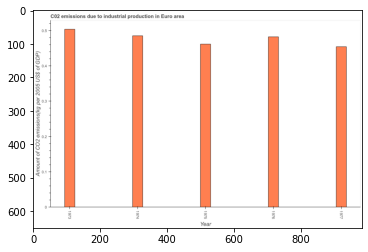

Number of QA =  23





Year  Amount of CO2 emissions(kg per 2005 US$ of GDP)
0  1975                                         0.465875
1  1977                                         0.459107
2  1973                                         0.509357
3  1976                                         0.487146
4  1974                                         0.488986

> what is the title of the graph ?
PREDICTED =  C02 emissions due to industrial production in Euro area
EXPECTED =  C02 emissions due to industrial production in Euro area




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 2 / 2 = 1.0


> what is the label or title of the y-axis ?
PREDICTED =  Amount of CO2 emissions(kg per 2005 US$ of GDP)
EXPECTED =  Amount of CO2 emissions(kg per 2005 US$ of GDP)




				 3 / 3 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of co2 emissions in 1975 and 1976 ?
PREDICTED =  -0.021270532697336864
EXPECTED =  -0.021




				 4 / 4 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the median amount of co2 emissions ?
PREDICTED =  0.4871455718057643
EXPECTED = 

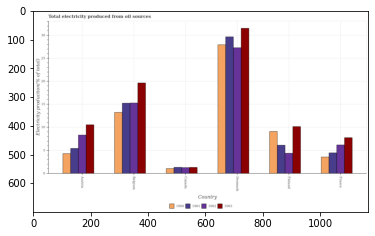

Number of QA =  30





Country       1963       1962       1961       1960
0  Belgium  19.776394  15.426238  15.396362  13.420758
1   France   7.859798   6.311685   4.566565   3.663424
2  Finland  10.316605   4.468429   6.276397   9.281648
3   Canada   1.404123   1.347280   1.430247   1.133435
4  Denmark  31.729792  27.514996  29.991100  28.362700
5  Austria  10.738999   8.505276   5.564625   4.452776

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total electricity produced in 1960 in belgium and that in france ?
PREDICTED =  9.757334464195422
EXPECTED =  9.6847008864115




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total electricity produced in 1962 in france and the total electricity produced in 1961 in austria?
PREDICTED =  -2.1935903369942586
EXPECTED =  0.7631304652920692




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total electricity produced of/in 1963 and total electricity produced of/in 1960 in france?
PREDICTED =  78.16228733828177
EXPECTED =  4.19979395816978





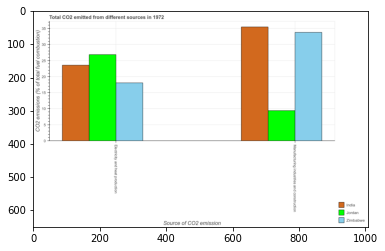

Number of QA =  23





Source of CO2 emission   Zimbabwe      India     Jordan
0           Electricity and heat production  18.415215  24.115298  26.978401
1  Manufacturing industnes and construction  34.271149  35.925454   9.811139

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the co2 emissions due to manufacturing industries and co2 emissions due to electricity and heat production in jordan ?
PREDICTED =  -25.978400791164212
EXPECTED =  -17.44966442953019




				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 4 = 0.0


> what is the difference between two consecutive major ticks on the y-axis ?
PREDICTED =  CO2 emissions (% of total fuel combustion)
EXPECTED =  5.0




				 0 / 5 = 

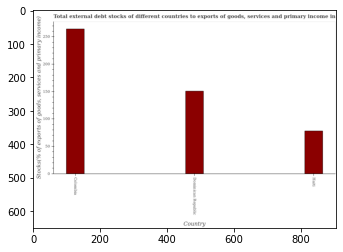

Number of QA =  22





Country  Stocks(% of exports of goods, services and primary income)
0               Haiti                                          79.000466         
1  Dominican Republic                                         152.021258         
2            Colombia                                         264.474096

> what is the title of the graph ?
PREDICTED =  Total external debt stocks of different countries to exports of goods, services and primary income in
EXPECTED =  Total external debt stocks of different countries to exports of goods, services and primary income in 1971




				 0 / 1 = 0.0


> what is the label or title of the x-axis ?
PREDICTED =  Country
EXPECTED =  Country




				 1 / 2 = 0.5


> what is the label or title of the y-axis ?
PREDICTED =  Stocks(% of exports of goods, services and primary income)
EXPECTED =  Stocks(% of exports of goods, services and primary income)




				 2 / 3 = 0.6667


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the external debt stocks in colombia and haiti ?
PREDICTED =  185.4736292648879
EXPECTED =  186.356




				 3 / 4 = 0.75


> what is the median external debt stocks ?
PREDICTED =  None
EXPECTED =  150.819677751114






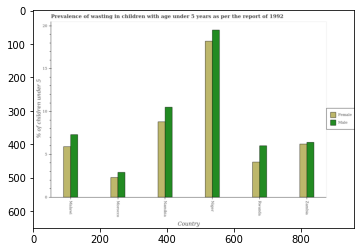

Number of QA =  28





Country     Female       Male
0   Malawi   5.995160   7.361159
1  Morocco   2.389771   2.978476
2   Zambia   6.321370   6.542423
3    Niger  18.407183  19.724818
4  Namibia   8.939537  10.637031
5   Rwanda   4.203624   6.107608

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of undernourished male children in namibia and the percentage of undernourished female children in morocco?
PREDICTED =  0.5887044443962863
EXPECTED =  8.20000004768372




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the ratio of the percentage of undernourished male children in rwanda to that in zambia ?
PREDICTED =  0.9335391258070965
EXPECTED =  0.9374999860301619




				 1 / 4 = 0.25



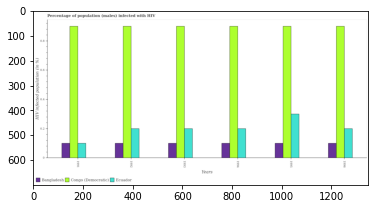

Number of QA =  29





Years   Ecuador  Congo (Democratic)  Bangladesh
0   1996  0.204094            0.907951    0.103181
1   1991  0.103067            0.908684    0.103336
2   1995  0.304464            0.910522    0.103327
3   1994  0.202811            0.908908    0.103680
4   1993  0.203399            0.909717    0.103603
5   1992  0.201976            0.909799    0.103213

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of hiv infected male population in congo (democratic) in 1992 and that in 1995 ?
PREDICTED =  -0.0007225427166216436
EXPECTED =  0.0




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of hiv infected male population in congo (democratic) in 1996 and the percentage of hiv infected male population in bangladesh in 1995?
PREDICTED =  -0.002570418656519635
EXPECTED =  0.8




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after trainin

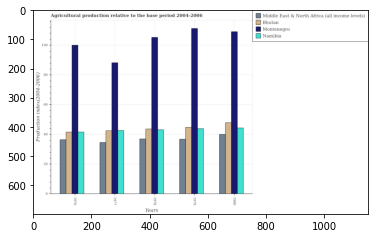

Number of QA =  30





Years  Montenegro  ...  Middle East & North Africa (all income levels)    Namibia
0   1980  107.809962  ...                                       40.421479  44.859851
1   1978  105.770121  ...                                       37.230559  43.409272
2   1976  100.124800  ...                                       36.793298  42.085696
3   1977   88.644694  ...                                       34.939595  42.937706
4   1979  111.853071  ...                                       37.263793  44.226367

[5 rows x 5 columns]

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the agricultural production index in middle east & north africa (all income levels) in 1977 and that in 1980 ?
PREDICTED =  -5.481883921408155
EXPECTED =  -5.435583183468701




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the agricultural production index in namibia in 1977 and the agricultural production index in bhutan in 1976?
PREDICTED =  0.8520099959855685
EXPECTED =  1.0700000000000003




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 1978, what is the difference between the agricultural production index in bhutan and agricultural production index in namibia ?


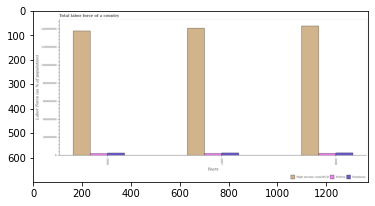

Number of QA =  29





Years       Eritrea      Honduras  High income: nonOECD
0  2008  2.900623e+06  3.471385e+06          1.440925e+08
1  2006  2.765979e+06  3.232367e+06          1.380536e+08
2  200?  2.803195e+06  3.347216e+06          1.413886e+08

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of labor force in eritrea in 2006 and that in 2008 ?
PREDICTED =  -134644.16321748774
EXPECTED =  -104792




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of labor force in honduras in 2008 and the percentage of labor force in eritrea in 2006?
PREDICTED =  239017.3095881124
EXPECTED =  708276




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2007, what is the difference between the percentage of labor force in honduras and percentage of labor force in eritrea ?
PREDICTED =  409101.38262903783
EXPECTED =  568237




				 0 / 3 = 0.0


is_b

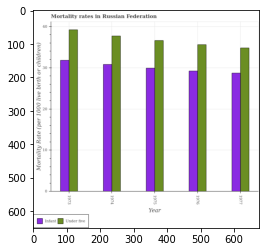

Number of QA =  28





Year     Infant  Under five
0  1975  29.974266   36.618474
1  1974  30.881175   37.744278
2  1973  31.901087   39.225883
3  1977  28.698839   34.832512
4  1976  29.391490   35.553247

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the infant mortality rate in 1973 and that in 1974 ?
PREDICTED =  1.0199123664176
EXPECTED =  1.0




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the infant mortality rate in 1976 and the under-5 mortality rate in 1974?
PREDICTED =  -8.352787986973041
EXPECTED =  -1.6000000000000014




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 1974, what is the difference between the infant mortality rate and under-5 mortality rate ?
PREDICTED =  0.0
EXPECTED =  0.0




				 2 / 3 = 0.6667


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Eva

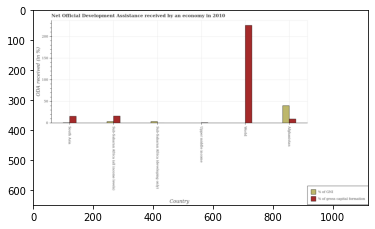

Number of QA =  28





Country  ...   % of GNI
0                     Upper middie income  ...        NaN
1                             Afghanistan  ...  41.375622
2                                   World  ...        NaN
3                              South Asia  ...        NaN
4  Sub-Saharan Africa (all income levels)  ...   4.521675
5    Sub-Saharan Africa (developing only)  ...   4.441862

[6 rows x 3 columns]

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the oda received as percentage of gross capital formation in afghanistan and that in sub-saharan africa (all income levels) ?
PREDICTED =  24.353473092019726
EXPECTED =  -6.78695773823625




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the ratio of the oda received as percentage of gross capital formation in afghanistan to that in sub-saharan africa (all income levels) ?
PREDICTED =  0.6019036674950707
EX

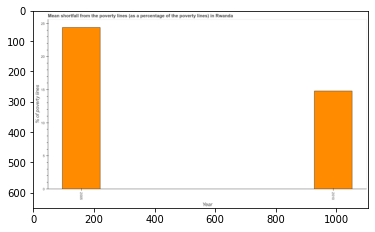

Number of QA =  19





Year  % of poverty lines
0  2010           15.080965
1  2005           24.740001

> what is the title of the graph ?
PREDICTED =  Mean shortfall from the poverty lines (as a percentage of the poverty lines) in Rwanda
EXPECTED =  Mean shortfall from the poverty lines (as a percentage of the poverty lines) in Rwanda




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 2 / 2 = 1.0


> what is the label or title of the y-axis ?
PREDICTED =  % of poverty lines
EXPECTED =  % of poverty lines




				 3 / 3 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the poverty gap at national poverty lines in 2005 and 2010 ?
PREDICTED =  9.659036234314913
EXPECTED =  9.6




				 4 / 4 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the median poverty gap at national poverty lines ?
PREDICTED =  19.91

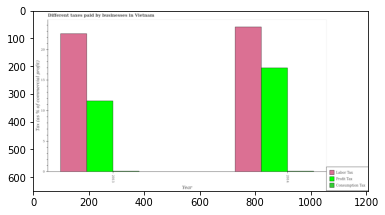

Number of QA =  25





Year  Labor Tax  Consumption Tax  Profit Tax
0  2014  23.929988              NaN   17.077494
1  2013  22.718373              NaN   11.770792

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of consumption tax in 2013 and that in 2014 ?
PREDICTED =  nan
EXPECTED =  0.0




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of labor tax in 2014 and the percentage of profit tax in 2013?
PREDICTED =  1.211614899594764
EXPECTED =  1.0999999999999979




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2014, what is the difference between the percentage of consumption tax and percentage of labor tax ?
PREDICTED =  nan
EXPECTED =  0.0




				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...

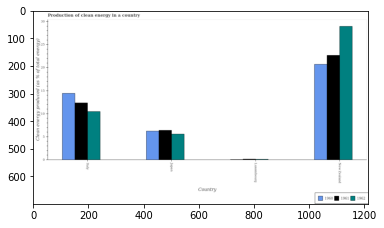

Number of QA =  29





Country       1962       1961       1960
0   Luxembourg        NaN   0.138207        NaN
1        Japan   5.686578   6.546591   6.354076
2  New Zealand  29.269772  22.839872  20.908346
3        Italy  10.506632        NaN  14.589121

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of clean energy produced in 1961 in japan and that in new zealand ?
PREDICTED =  -16.29328142465484
EXPECTED =  -16.275651118344072




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of clean energy produced in 1961 in new zealand and the percentage of clean energy produced in 1960 in japan?
PREDICTED =  16.29328142465484
EXPECTED =  16.448791049623832




				 2 / 2 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of clean energy produced of/in 1962 and percentage of clean energy produced of/in 1960 in japan?
PREDICTED 

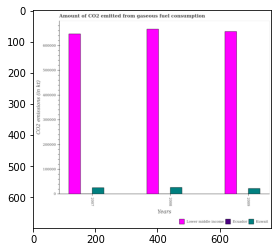

Number of QA =  29





Years  Lower middle income  Ecuador        Kuwait
0   2007        652898.318323      NaN  28379.933424
1   2008        674072.827740      NaN  29428.554411
2   2009        664453.969721      NaN  24661.259220

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of co2 emitted in lower middle income in 2008 and that in 2009 ?
PREDICTED =  9618.858018934727
EXPECTED =  9672.50507413398




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of co2 emitted in ecuador in 2007 and the amount of co2 emitted in kuwait in 2008?
PREDICTED =  623469.76391294
EXPECTED =  -25749.674000000003




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2008, what is the difference between the amount of co2 emitted in lower middle income and amount of co2 emitted in kuwait ?
PREDICTED =  1963935.200100132
EXPECTED =  639929.095096329


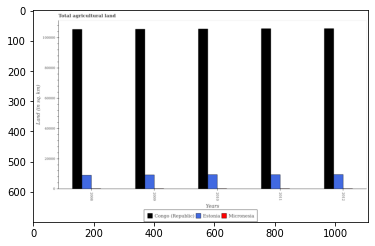

Number of QA =  29





Years      Estonia  Micronesia  Congo (Republic)
0   2010  9760.292186         NaN     106459.374614
1   2009  9662.697331         NaN     106418.976180
2   2012  9883.896039         NaN     106367.225545
3   2008  9319.630331         NaN     106521.290360
4   2011  9782.524501         NaN     106581.393391

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total agricultural land in micronesia in 2008 and that in 2010 ?
PREDICTED =  -440.6618544519697
EXPECTED =  5.0




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total agricultural land in micronesia in 2010 and the total agricultural land in estonia in 2012?
PREDICTED =  -123.6038534995514
EXPECTED =  -9340.0




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2011, what is the difference between the total agricultural land in estonia and total agricultural land in micronesia ?
PREDICTED =  9883.89603917361
EXPECTED =  9230.0




				 0 / 3 = 0.0


is_built_wit

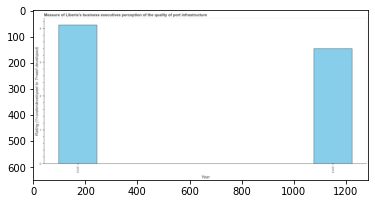

Number of QA =  19





Year  Rating (1=underdeveloped to 7=well developed)
0  2013                                       3.420897
1  2012                                       4.126968

> what is the title of the graph ?
PREDICTED =  Measure of Liberia's business executives perception of the quality of port infrastructure
EXPECTED =  Measure of Liberia's business executives perception of the quality of port infrastructure




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 2 / 2 = 1.0


> what is the label or title of the y-axis ?
PREDICTED =  Rating (1=underdeveloped to 7=well developed)
EXPECTED =  Rating (1=underdeveloped to 7=well developed) 




				 2 / 3 = 0.6667


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the rating measuring quality of port infrastructure in 2012 and 2013 ?
PREDICTED =  0.7060713126285685
EXPECTED =  0.7




				 3 / 4 = 0.75


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> w

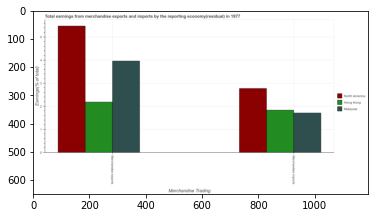

Number of QA =  23





Merchandise Trading  North America  Malaysia  Hong Kong
0  Merchandise imports       2.784673  1.719351   1.844562
1  Merchandise exports       5.456993  3.937872   2.207645

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the earnings from merchandise imports in hong kong and the earnings from merchandise exports in north america?
PREDICTED =  -0.18154178541257027
EXPECTED =  -3.64809951988846




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the ratio of the earnings from merchandise exports in north america to that in malaysia ?
PREDICTED =  1.385772210696437
EXPECTED =  1.383996582017525




				 1 / 4 = 0.25


> what is 

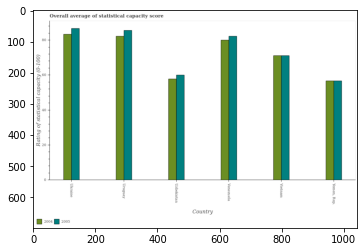

Number of QA =  28





Country       2005       2004
0      Uruguay  86.792052  82.909617
1    Venezuela  82.526564  80.431180
2      Vietnam  71.676132  71.794840
3   Uzbekistan  60.461853  58.142787
4      Ukraine  87.364893  84.173050
5  Yemen, Rep.  57.092035  57.098818

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the rating of statistical capacity in 2005 in vietnam and that in yemen, rep. ?
PREDICTED =  14.584097532633244
EXPECTED =  14.4444444444444




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the rating of statistical capacity in 2004 in yemen, rep. and the rating of statistical capacity in 2005 in uruguay?
PREDICTED =  -25.810798878732278
EXPECTED =  -28.888888888888886




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the rating of statistical capacity of/in 2005 and rating of statistical capacity of/in 2004 in uzbekistan?
PREDICTED =  387.770741845

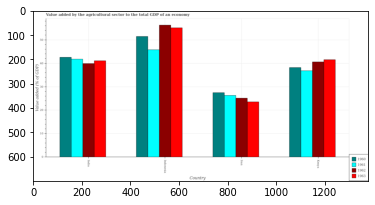

Number of QA =  30





Country       1963       1962       1961       1960
0      Kenya  41.722010  40.795224  37.006575  38.499679
1  Indonesia  55.314587  56.392575  46.069786  51.418909
2       lran  23.733268  25.405366  26.610034  27.739955
3      India  41.192307  40.047321  41.967004  42.770900

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the value added by the agricultural sector to the total gdp in 1963 in india and that in iran ?
PREDICTED =  -23.733267562266654
EXPECTED =  17.532707942974703




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the value added by the agricultural sector to the total gdp in 1963 in india and the value added by the agricultural sector to the total gdp in 1960 in indonesia?
PREDICTED =  -14.122280098413576
EXPECTED =  -10.380525919754994




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the value added by the agricultural sector to the total gdp of/in 19

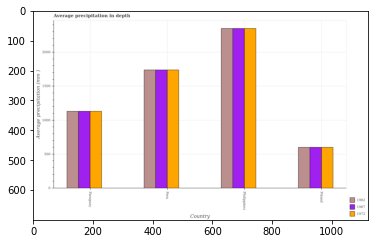

Number of QA =  29





Country         1972         1967         1962
0     Paraguay  1136.159060  1137.856568  1142.097703
1       Poland   611.133920   609.901886   609.279588
2         Peru  1753.662586  1755.841912  1754.971141
3  Philippines  2371.280150  2361.673619  2369.491550

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the average precipitation in 1962 in paraguay and that in poland ?
PREDICTED =  532.8181150719106
EXPECTED =  530.0




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the average precipitation in 1972 in peru and the average precipitation in 1967 in philippines?
PREDICTED =  -617.6175644455634
EXPECTED =  -610.0




				 2 / 2 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the average precipitation of/in 1967 and average precipitation of/in 1972 in poland?
PREDICTED =  1750.5396986481057
EXPECTED =  0.0




				 2 / 3 = 0.6667


is_built_with_cuda: True
is_gpu_av

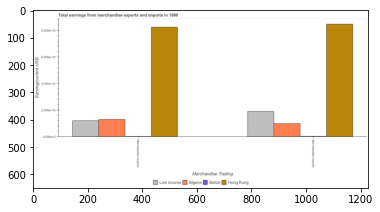

Number of QA =  23





Merchandise Trading  Low income   Algeria  Belize  Hong Kong
0  Merchandise imports    1.943431  1.016637     NaN   8.520062
1  Merchandise exports    1.241055  1.331321     NaN   8.367319

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the earnings from merchandise imports in hong kong and that in belize ?
PREDICTED =  0.0
EXPECTED =  84514000000.0




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the earnings from merchandise exports in algeria and the earnings from merchandise imports in belize?
PREDICTED =  1.3313213720820072
EXPECTED =  12719000000.0




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the earnings from merchandise imports and earnings from merchandise exports in algeria ?
PREDICTED =  0.6121097712204848
EXPECTED =  -3150000000.0




				 0 / 3 = 0.0


is_built_wi

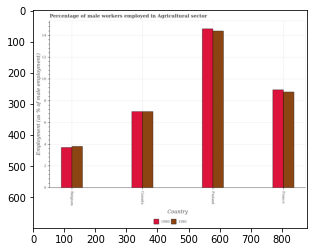

Number of QA =  28





Country       1980       1981
0   France   9.044598   8.905254
1  Finland  14.674432  14.458538
2      NaN   3.706252   3.827901
3   Canada   7.042376   7.053653

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of male workers employed in agricultural sector in 1981 in belgium and that in canada ?
PREDICTED =  0.9258005115234615
EXPECTED =  -3.20000004768372




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of male workers employed in agricultural sector of/in 1981 and percentage of male workers employed in agricultural sector of/in 1980 in canada?
PREDICTED =  -3.214475321846151
EXPECTED =  0.0




				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation 

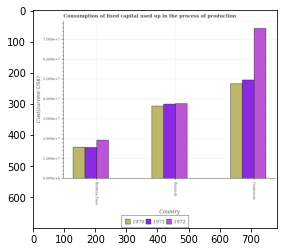

Number of QA =  29





Country      1972      1971      1970
0      Cameroon  7.581037  4.977532  4.775580
1  Burkina Faso  1.931329  1.576247  1.590996
2       Burundi  3.774424  3.742285  3.652193

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount consumed in the process of production in 1971 in burkina faso and that in cameroon ?
PREDICTED =  -3.4012852266215425
EXPECTED =  -33932659.311378606




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount consumed in the process of production in 1970 in burundi and the amount consumed in the process of production in 1972 in burkina faso?
PREDICTED =  2.0611974980123002
EXPECTED =  17180270.4183071




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount consumed in the process of production of/in 1971 and amount consumed in the p

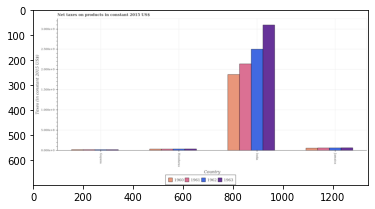

Number of QA =  30





Country      1963      1962      1961      1960
0   Jamaica  0.074045  0.072394  0.071247  0.066729
1    Guyana       NaN       NaN       NaN       NaN
2  Honduras  0.045067       NaN       NaN       NaN
3     India  3.145642  2.525107  2.172489  1.926516

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the net taxes on products in 1960 in guyana and that in honduras ?
PREDICTED =  0.0
EXPECTED =  -15100043.103487302




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the net taxes on products in 1961 in honduras and the net taxes on products in 1962 in jamaica?
PREDICTED =  -0.07124738264391059
EXPECTED =  -28399973.141893797




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the ratio of the net taxes on products in 1963 

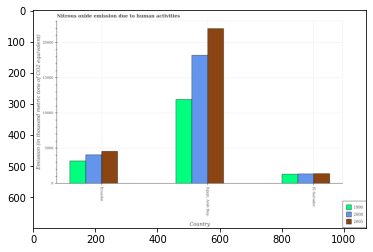

Number of QA =  29





Country          2005          2000          1990
0       El Salvador   1494.096088   1449.736246   1404.933561
1  Egypt, Arab Rep.  22119.808703  18311.609531  12025.813389
2           Ecuador   4667.531379   4144.673626   3273.161229

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of nitrous oxide emitted in 1990 in egypt, arab rep. and that in el salvador ?
PREDICTED =  -1404.9335608210895
EXPECTED =  10617.5




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of nitrous oxide emitted in 2005 in ecuador and the amount of nitrous oxide emitted in 1990 in egypt, arab rep.?
PREDICTED =  -17452.277323541835
EXPECTED =  -7378.4




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of nitrous oxide emitted of/in 2000 and amount of nitrous oxide emitted of/in 2005 in ecuador?
PREDICTED =  -3217.79513383762

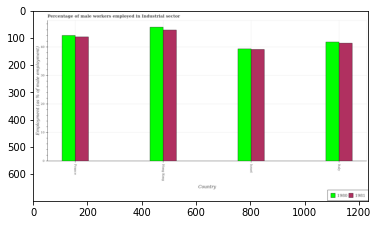

Number of QA =  28





Country       1980       1981
0     Israel  39.510738  39.313626
1     France  44.025510  43.417778
2  Hong Kong  46.963464  46.263756
3      Italy  41.879982  41.661673

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of male workers employed in industrial sector in 1981 in israel and that in italy ?
PREDICTED =  -2.3480474066683783
EXPECTED =  -2.2000007629393963




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of male workers employed in industrial sector in 1981 in france and the percentage of male workers employed in industrial sector in 1980 in italy?
PREDICTED =  1.7561050518933854
EXPECTED =  1.7999992370604971




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of male workers employed in industrial sector of/in 

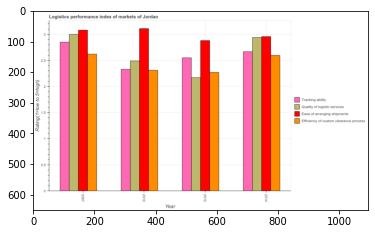

Number of QA =  30





Year  ...  Efficiency of custom clearance process
0  2010  ...                                2.324709
1  2014  ...                                2.616129
2  2012  ...                                2.280083
3  2007  ...                                2.632203

[4 rows x 5 columns]

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the lpi rating of quality of logistic services in 2007 and that in 2014 ?
PREDICTED =  0.05846030368454036
EXPECTED =  0.06060599999999994




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the lpi rating of efficiency of custom clearance process in 2010 and the lpi rating of quality of logistic services in 2007?
PREDICTED =  -0.30749310224839377
EXPECTED =  -0.31000000000000005




				 2 / 2 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2010, what is the difference between the lpi rating of quality of logistic services and lpi rating of ease of arranging shipments ?
PREDICTED = 

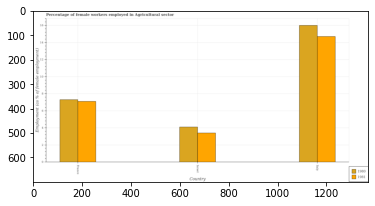

Number of QA =  28





Country       1980       1981
0  Israel   4.115146   3.437589
1  France   7.318937   7.120322
2   Italy  15.961142  14.639595

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of females employed in agricultural sector in 1980 in france and that in italy ?
PREDICTED =  -8.642204477453479
EXPECTED =  -8.69999980926514




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of females employed in agricultural sector in 1981 in israel and the percentage of females employed in agricultural sector in 1980 in italy?
PREDICTED =  -11.202005530185565
EXPECTED =  -12.59999990463257




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of females employed in agricultural sector of/in 1980 and perce

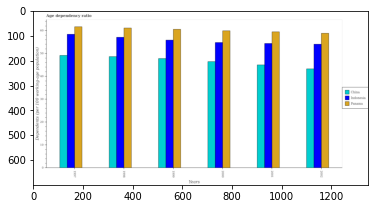

Number of QA =  29





Years     Panama      China  Indonesia
0   1999  60.853134  48.299359  56.092015
1   2001  60.092084  45.633566  55.008456
2   2002  58.899740  43.952295  54.348332
3   2000  60.493236  46.839683  55.372996
4   1998  61.618270  49.316832  57.288651
5   1997  62.268584  49.652935  59.051815

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the age dependency ratio in in indonesia in 1998 ?
PREDICTED =  0.028634780684507814
EXPECTED =  57.0781119584915




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> across all years, what is the maximum age dependency ratio in in indonesia ?
PREDICTED =  0.9981672775741419
EXPECTED =  58.3878983666985




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> across all years, what is the minimum age dependency ratio in in indonesia ?
PREDICTED =  1.0006664445184938
EXPECTED =  54.0531477583617




				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.


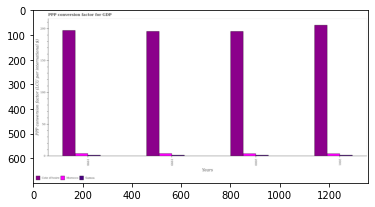

Number of QA =  29





Years  Unnamed: 1  Cote d'Ivoire   Morocco
0   1998         NaN     197.571283  4.600801
1   2000         NaN     195.936200  4.353810
2   2001         NaN     205.959088  4.348533
3   1999    2.034209     196.037271  4.519575

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the ppp conversion factor for gdp in samoa in 1998 and that in 2000 ?
PREDICTED =  0.24699160866771575
EXPECTED =  -0.02172508924999006




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the ppp conversion factor for gdp in cote d'ivoire in 2000 and the ppp conversion factor for gdp in morocco in 1998?
PREDICTED =  -1.6350831480545764
EXPECTED =  191.79364244932793




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 1998, what is the difference between the ppp conversion factor for gdp in samoa and ppp conversion factor for gdp in morocco ?
PREDICTED =  -0.455679879804831

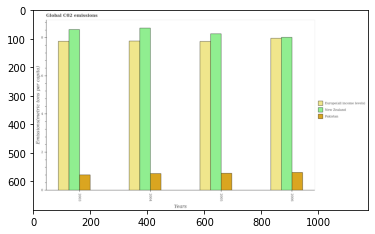

Number of QA =  29





Years  Europe(all income levels)  New Zealand  Pakistan
0   2003                   7.811414     8.417950  0.815158
1   2006                   7.974603     8.010825  0.951880
2   2005                   7.787566     8.233918  0.917054
3   2004                   7.866608     8.510083  0.888556

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of co2 emitted in in new zealand in 2005 and that in 2006 ?
PREDICTED =  0.22309352858976794
EXPECTED =  0.18704463915895886




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of co2 emitted in in europe(all income levels) in 2005 and the amount of co2 emitted in in new zealand in 2003?
PREDICTED =  -0.023848441103924145
EXPECTED =  -0.6230368961540895




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2003, what is the difference between the amount of co2 emitted in in new zealand and amount of co2 emitted in in pakistan ?
PREDICTED =  0.0
EXPECTED

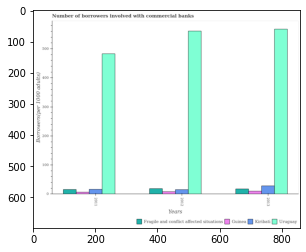

Number of QA =  30





Years  Fragile and conflict affected situations  ...     Guinea   Kiribati
0   2013                                 19.489051  ...  11.470316  30.165366
1   2012                                 20.391863  ...   9.774882  17.275781
2   2011                                 17.540645  ...   8.469352  18.331690

[3 rows x 5 columns]

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of borrowers involved with commercial banks in uruguay in 2011 and that in 2013 ?
PREDICTED =  0.0
EXPECTED =  -84.90271303523895




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of borrowers involved with commercial banks in fragile and conflict affected situations in 2011 and the number of borrowers involved with commercial banks in uruguay in 2012?
PREDICTED =  1.0
EXPECTED =  -545.4074839347461




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2013, what is the difference between the number of borrowers involved with commercial banks in fragi

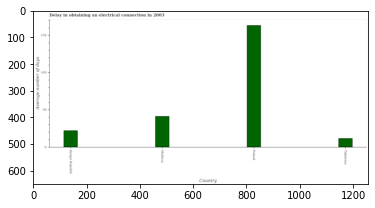

Number of QA =  22





Country  Average number of days
0  Kyrgyz Republic               23.455869
1           Poland              164.933486
2       Tajikistan               12.986675
3          Moldova               42.885992

> what is the title of the graph ?
PREDICTED =  Delay in obtaining an electrical connection in 2003
EXPECTED =  Delay in obtaining an electrical connection in 2003




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  Country
EXPECTED =  Country




				 2 / 2 = 1.0


> what is the label or title of the y-axis ?
PREDICTED =  Average number of days
EXPECTED =  Average number of days




				 3 / 3 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 3 / 4 = 0.75


> what is the median dalay in electrical connection ?
PREDICTED =  None
EXPECTED =  31.7




				 3 / 6 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the ratio of the dalay in electrical connection in poland to that in tajikistan?
PREDICTED =  12.700208455515124
EXPECTED =  14.078




				 3 / 7 = 0.4286

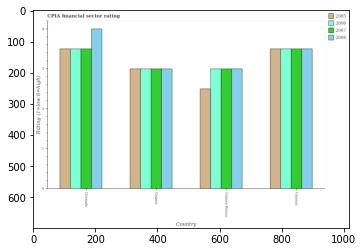

Number of QA =  30





Country      2007      2005      2006      2008
0         Guinea  3.016804  3.014545  3.018235  3.011002
1  Guinea-Bissau  3.021839  2.506396  3.025289  3.012273
2         Guyana  3.504874  3.513903  3.529290  3.514723
3        Grenada  3.520797  3.521814  3.515378  4.050037

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the cpia rating in 2008 in grenada and that in guyana ?
PREDICTED =  0.5353138976233329
EXPECTED =  0.5




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the cpia rating in 2007 in guyana and the cpia rating in 2005 in guinea-bissau?
PREDICTED =  0.48303535780184603
EXPECTED =  1.0




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the ratio of the cpia rating in 2008 in guinea to that in guyana?
PREDICTED =  0.85668258741

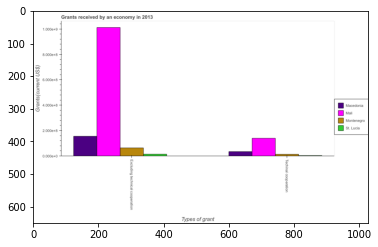

Number of QA =  23





Types of grant  Montenegro  St. Lucia       Mali  Macedonia
0             Techinal cooperation         NaN        NaN   5.037212   1.388677
1  Excluding technical cooperation    2.435821        NaN  35.599250   5.637636

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the amount of grants received(including technical cooperation) in st. lucia ?
PREDICTED =  2.0
EXPECTED =  3080000




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> across all countries, what is the maximum amount of grants received(including technical cooperation) ?
PREDICTED =  1.0
EXPECTED =  139440000




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> across all countries, what is the minimum amount of grants received(including technical cooperation) ?
PREDICTED =  2.0
EXPECTED =  3080000




				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training s

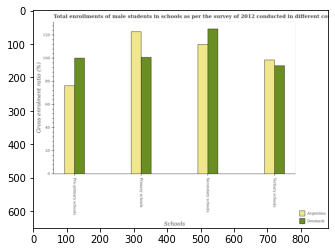

Number of QA =  29





Schools   Argentina     Denmark
0      Primary schools  124.278953  101.463903
1    Secondary schools  112.454417  126.287873
2  Pre-primary schools   76.852257   99.908376
3     Tertiary schools   98.891939   94.100599

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the gross enrolment ratio(male) in tertiary schools in denmark ?
PREDICTED =  23.52514963440948
EXPECTED =  93.537841796875




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> across all countries, what is the maximum gross enrolment ratio(male) in primary schools ?
PREDICTED =  31.069738319010728
EXPECTED =  122.950080871582




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> across all countries, what is the minimum gross enrolment ratio(male) in tertiary schools ?
PREDICTED =  24.72298467362549
EXPECTED =  93.537841796875




				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evalua

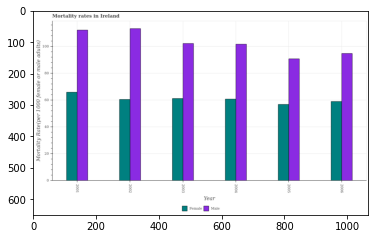

Number of QA =  28





Year     Female        Male
0  2004  61.256983  101.932863
1  2005  57.290626   91.493771
2  2006  59.476621   94.636039
3  2002  61.345723  114.377404
4  2003  61.570509  102.447185
5  2001  65.955375  113.077811

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the male mortality rate in 2002 and that in 2003 ?
PREDICTED =  11.93021953466345
EXPECTED =  11.076999999999998




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the male mortality rate in 2004 and the female mortality rate in 2002?
PREDICTED =  40.5871401755139
EXPECTED =  -11.602999999999994




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2003, what is the difference between the female mortality rate and male mortality rate ?
PREDICTED =  0.0
EXPECTED =  0.0




				 1 / 3 = 0.3333


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting 

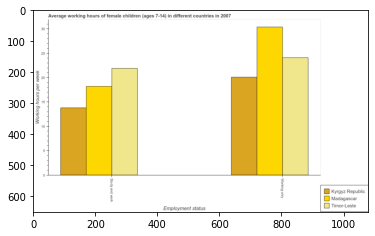

Number of QA =  23





Employment status  Kyrgyz Republic  Timor-Leste  Madagascal
0      Working only        20.038982    24.020592   30.294064
1    Study and work        13.817695    21.791064   18.289310

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the ratio of the average working hour of children involved in study and work in kyrgyz republic to that in timor-leste ?
PREDICTED =  0.6340991397639425
EXPECTED =  0.6301369863013699




				 1 / 4 = 0.25


> what is the difference between two consecutive major ticks on the y-axis ?
PREDICTED =  Working hours per week
EXPECTED =  5.0




				 1 / 5 = 0.2


> what is the title of the graph ?


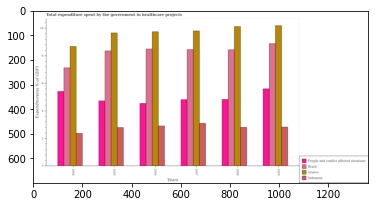

Number of QA =  30





Years  Fragile and conflict affected situations  ...    Brazil  Indonesia
0   2004                                  5.368770  ...  7.099077   2.367113
1   2007                                  4.825172  ...  8.419518   3.114757
2   2009                                  5.608004  ...  8.850004   2.843255
3   2006                                  4.541149  ...  8.475478   2.915819
4   2008                                  4.819608  ...  8.473021   2.827431
5   2005                                  4.733129  ...  8.374032   2.802106

[6 rows x 5 columns]

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total expenditure spent by the government in healthcare projects in fragile and conflict affected situations in 2005 and that in 2008 ?
PREDICTED =  -3.5527379002459814
EXPECTED =  -0.09967664417299993




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total expenditure spent by the government in healthcare projects in fragile and conflict affected situations in 2005 and the total expenditure spent by the government in healthcare projects in brazil in 2004?
PREDICTED =  -4.101899231219349
EXPECTED =  -2.39871450078485




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the

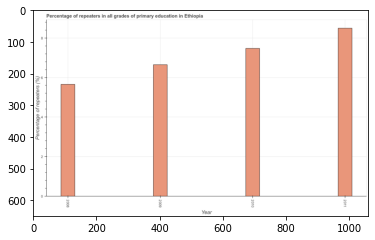

Number of QA =  23





Year  Percentage of repeaters (%)
0  2010                     7.468596
1  2009                     6.671978
2  2008                     5.665975
3  2011                     8.515768

> what is the title of the graph ?
PREDICTED =  Percentage of repeaters in all grades of primary education in Ethiopia
EXPECTED =  Percentage of repeaters in all grades of primary education in Ethiopia




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 2 / 2 = 1.0


> what is the label or title of the y-axis ?
PREDICTED =  Percentage of repeaters (%)
EXPECTED =  Percentage of repeaters (%)




				 3 / 3 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of repeaters in primary education in 2008 and 2011 ?
PREDICTED =  -2.849792902873121
EXPECTED =  -2.84




				 4 / 4 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the median percentage of repeaters in primary education ?
PREDICTED =  20

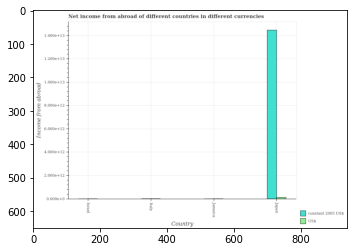

Number of QA =  21





Country  US$  constant 2005 US$
0    Japan  NaN           1.453251
1   Israel  NaN                NaN
2  Jamaica  NaN                NaN
3    Italy  NaN                NaN

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 3 = 0.0


> what is the difference between two consecutive major ticks on the y-axis ?
PREDICTED =  Income from abroad
EXPECTED =  2000000000000.0




				 0 / 4 = 0.0


> what is the title of the graph ?
PREDICTED =  Net income from abroad of different countries in different currencies
EXPECTED =  Net income from abroad of different countries in different currencies




				 1 / 5 = 0.2


> what is the label or title of the x-axis ?
PREDICTED =  Country
EXPECTED =  Country




				 2 / 6 = 0.3333


> what is the label or title of the y-axis 

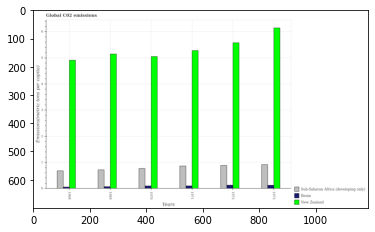

Number of QA =  29





Years  Sub-Saharan Africa (developing only)  New Zealand     Benin
0   1971                              0.885459     5.262144  0.115880
1   1969                              0.730522     5.127613  0.084547
2   1968                              0.693592     4.904249  0.070117
3   1972                              0.897613     5.570975  0.144554
4   1970                              0.788680     5.040440  0.112517
5   1973                              0.927133     6.234926  0.139908

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of co2 emitted in in new zealand in 1970 and that in 1971 ?
PREDICTED =  -0.2217035121036366
EXPECTED =  -0.22845535374676107




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of co2 emitted in in sub-saharan africa (developing only) in 1968 and the amount of co2 emitted in in benin in 1970?
PREDICTED =  -0.09508762529155901
EXPECTED =  0.5794183993037421




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 1970, what is the difference between the amount of co2 emitted in in benin and amount of co2 emitted in in new zealand ?
PREDICTED =  -26.1403485

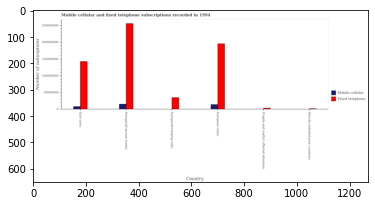

Number of QA =  28





Country  Mobile cellular  Fixed telephone
0                                 Euro area     9.025758e+06     1.444832e+08
1                 Europe(all income levels)     1.643858e+07     2.596210e+08
2                            European Union     1.520374e+07     1.979965e+08
3                   Europe(developing only)              NaN     3.660282e+07
4           Heavily indebted poor countries              NaN              NaN
5  Fragile and conflict affected situations              NaN     5.002469e+06

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of fixed telephone subscriptions in euro area and that in european union ?
PREDICTED =  -53513327.824741185
EXPECTED =  -52904945




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of mobile cellular subscriptions in european union and the number of fixed telephone subscriptions in europe(developing only)?
PREDICTED =  15203738.60079375
EXPECTED =  -20836793




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of mobile cellular subscriptions and number of fixed telephone subscriptions in europe(all income levels) ?
PREDI

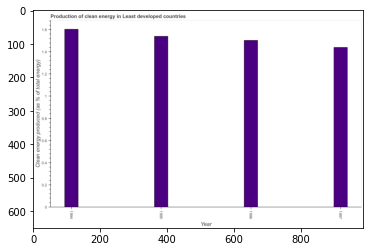

Number of QA =  23





Year  Clean energy produced (as % of total energy)
0  1995                                      1.552928
1  1996                                      1.512664
2  1997                                      1.446930
3  1994                                      1.610080

> what is the title of the graph ?
PREDICTED =  Production of clean energy in Least developed countries
EXPECTED =  Production of clean energy in Least developed countries




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 2 / 2 = 1.0


> what is the label or title of the y-axis ?
PREDICTED =  Clean energy produced (as % of total energy)
EXPECTED =  Clean energy produced (as % of total energy)




				 3 / 3 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the production of clean energy in 1995 and 1997 ?
PREDICTED =  0.10599790677498322
EXPECTED =  0.1




				 3 / 4 = 0.75


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the median production of clean energy ?
PREDICTED =  1995.5
EXPECTED =  1.5217938156465

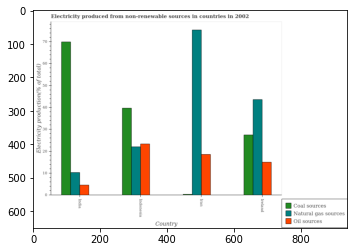

Number of QA =  29





Country  Coal sources  Oil sources  Natural gas sources
0    Ireland     27.751690    15.260916            43.876433
1      India     70.167191     4.780870            10.484671
2  Indonesia     40.185386    23.399621            22.364906
3        NaN           NaN    18.766654            75.356153

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of electricity produced by oil sources in iran and that in ireland ?
PREDICTED =  -5.240023282970171
EXPECTED =  3.5517649480314013




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of electricity produced by oil sources in india and the percentage of electricity produced by coal in ireland?
PREDICTED =  -10.480046565940341
EXPECTED =  -22.88166656967859




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of electricity produced by coal and percentage of electricity produced by natural gas in ireland ?
PREDI

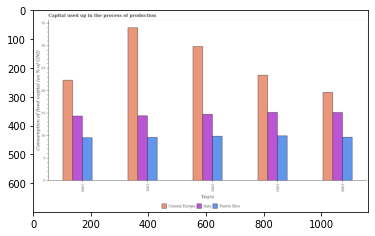

Number of QA =  29





Years  Central Europe  Puerto Rico      Italy
0   1990       22.354579     9.590476  14.415880
1   1993       23.479471    10.085159  15.211370
2   1994       19.596554     9.660520  14.959689
3   1991       34.036639     9.674528  14.432804
4   1992       29.840817     9.952182  14.842359

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the capital used up in the process of production in central europe in 1991 and that in 1993 ?
PREDICTED =  10.557168735284403
EXPECTED =  10.565629031591907




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the capital used up in the process of production in italy in 1992 and the capital used up in the process of production in central europe in 1991?
PREDICTED =  0.4095548139953227
EXPECTED =  -19.271921375970607




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 1991, what is the difference between the capital used up in the process of production in puerto rico and cap

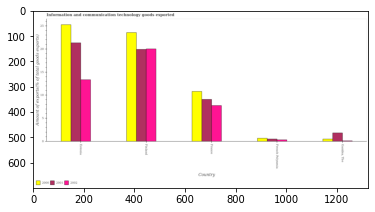

Number of QA =  29





Country       2002       2000       2001
0           Finland  20.063901  23.530331  19.961197
1  French Polynesia   0.394308   0.759066   0.586106
2           Estonia  13.463853  25.296938  21.339052
3            France   7.806654  10.791341   9.170811
4       Gambia, The        NaN   0.583866   1.925896

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of goods exported in 2000 in estonia and that in finland ?
PREDICTED =  1.7666068995883535
EXPECTED =  1.7054796538999994




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of goods exported in 2001 in gambia, the and the amount of goods exported in 2002 in french polynesia?
PREDICTED =  1.3397901936292715
EXPECTED =  1.4950129968




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of goods exported of/in 2000 and amount of goods exported of/in 2001 in france?
PREDICTED =  51.79073174057115
EXPECTED =  1.721207358700001


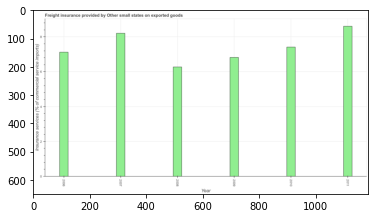

Number of QA =  23





Year  Insurance services (% of commercial service imports)
0  2011                                           8.670005   
1  2006                                           7.169863   
2  2010                                           7.454116   
3  2008                                           6.317064   
4  2007                                           8.255550   
5  2009                                           6.855785

> what is the title of the graph ?
PREDICTED =  Freight insurance provided by Other small states on exported goods
EXPECTED =  Freight insurance provided by Other small states on exported goods 




				 0 / 1 = 0.0


> what is the label or title of the x-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 1 / 2 = 0.5


> what is the label or title of the y-axis ?
PREDICTED =  Insurance services (% of commercial service imports)
EXPECTED =  Insurance services (% of commercial service imports)




				 2 / 3 = 0.6667


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the freight insurance in 2006 and 2011 ?
PREDICTED =  -1.5001415278100918
EXPECTED =  -1.488




				 3 / 4 = 0.75


> what is the median freight insurance ?
PREDICTED =  None
EXPECTED =  7.265581770369871




				 3 / 6 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting .

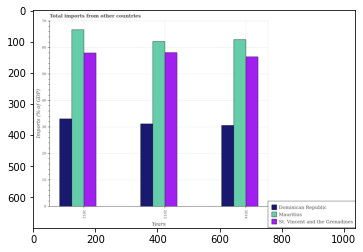

Number of QA =  29





Years  Dominican Republic  Mauritius  Sst. Vincent and the Grenadines
0   2013           31.519744  62.269074                        58.304048
1   2014           30.857433  63.332617                        56.619758
2   2012           33.268436  67.212892                        58.180880

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total imports in mauritius in 2012 and that in 2013 ?
PREDICTED =  4.943817601456239
EXPECTED =  4.411325950243999




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total imports in st. vincent and the grenadines in 2012 and the total imports in mauritius in 2013?
PREDICTED =  -59.26907433794815
EXPECTED =  -4.3586762324788




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2014, what is the difference between the total imports in mauritius and total imports in dominican republic ?
PREDICTED =  189.81458295516228
EXPECTED =  32.3851108996881




				 0 / 3 = 0.0

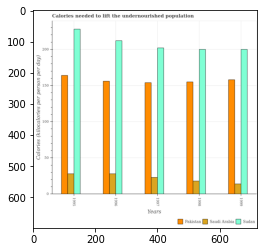

Number of QA =  29





Years    Pakistan  Saudi Arabia       Sudan
0   1997  156.153379     23.904416  203.369830
1   1999  159.608381     14.751306  201.389106
2   1995  165.504576     29.179317  228.682888
3   1998  155.973485     18.842710  201.535106
4   1996  157.348720     28.909954  212.339329

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total calories needed to lift the undernourished population in saudi arabia in 1997 and that in 1999 ?
PREDICTED =  -9.75130559152314
EXPECTED =  9




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total calories needed to lift the undernourished population in sudan in 1997 and the total calories needed to lift the undernourished population in saudi arabia in 1996?
PREDICTED =  145.28055790867418
EXPECTED =  174.0




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 1999, what is the difference between the total calories needed to lift the undernourished populatio

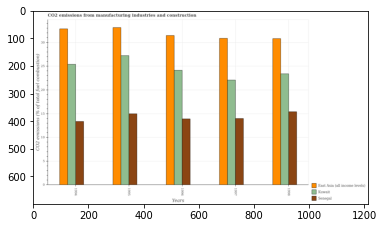

Number of QA =  29





Years    Senegal  East Asia (all income levels)     Kuwait
0   1997  14.198988                      31.410973  22.309623
1   1996  14.103983                      32.038173  24.336242
2   1995  15.160346                      33.536327  27.492538
3   1998  15.644511                      31.097579  23.716944
4   1994  13.585459                      33.415565  25.748828

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of co2 emitted in senegal in 1994 and that in 1997 ?
PREDICTED =  -0.613528896312701
EXPECTED =  -0.6239450204967998




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount of co2 emitted in senegal in 1997 and the amount of co2 emitted in kuwait in 1995?
PREDICTED =  -0.9613580135089848
EXPECTED =  -13.2363620870959




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 1994, what is the difference between the amount of co2 emitted in east asia (all income levels) and amount of co2 emitted in kuwait ?
PREDICTED =  0.0
EXPECTED =  7.470836837039698




				 

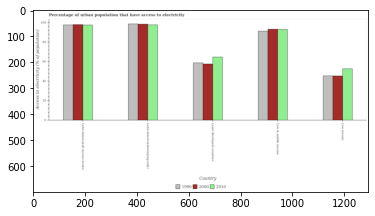

Number of QA =  29





Country       2000       1990       2010
0         Least developed countries  58.030878  59.207993  65.180960
1               Low & middle income  93.657865  91.620744  93.399344
2    Latin America(developing only)  98.857494  99.016504  98.143577
3  Latin America(all income levels)  98.365972  97.923230  98.046918
4                         Low mcome  46.032081  45.689546  53.321615

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of urban population that have access to electricity in 2010 in low & middle income and the percentage of urban population that have access to electricity in 1990 in least developed countries?
PREDICTED =  35.36846573735574
EXPECTED =  34.20304628464279




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of urban population that have access to electricity of/in 1990 and percentage of urban population that have access to electricity of/in 2000 in least developed countries?
PREDICTED =  40.98562592017034
EXPECT

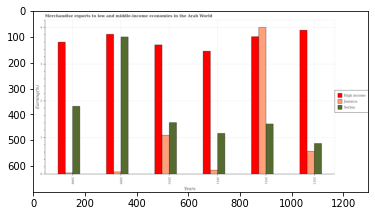

Number of QA =  29





Years    Serbia   Jamaica  High income
0   2008  1.858946  0.043823     3.607755
1   2013  0.849166  0.637099     3.932625
2   2011  1.113825  0.118403     3.362778
3   2009  3.744086  0.074971     3.815262
4   2010  1.402359  1.054055     3.585211
5   2012  1.372387  4.003787     3.762561

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of amount earned from merchandise exports in jamaica in 2011 and that in 2012 ?
PREDICTED =  -3.8853837818129224
EXPECTED =  -3.8929200448231565




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of amount earned from merchandise exports in jamaica in 2011 and the percentage of amount earned from merchandise exports in high income in 2009?
PREDICTED =  0.04343192889200867
EXPECTED =  -3.7042673822353662




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2011, what is the difference between the percentage of amount earned from merchandise exp

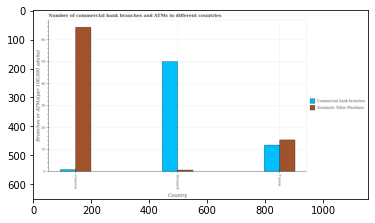

Number of QA =  28





Country  Automatic Teller Machines  Commercial bank branches
0  Tunisia                  14.800841                 12.328812
1  Comoros                  66.539113                       NaN
2  Denmark                        NaN                 50.622325

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of commercal bank branches in comoros and that in denmark ?
PREDICTED =  -50.622324592397355
EXPECTED =  -49.19469601501721




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of commercal bank branches in denmark and the number of atms in comoros?
PREDICTED =  50.622324592397355
EXPECTED =  -15.604150036042597




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of atms and number of commercal bank branches in tunisia ?
PREDICTED =  -10.328811983931447
EXPECTED =  2.3902154450130997




				 1 / 3 = 0.3333


is_built_with

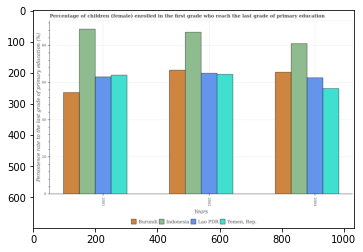

Number of QA =  30





Years  Yemen, Rep.    Burundi  Indonesia    Lao PDR
0   2004    57.349214  66.149184  81.555022  63.083950
1   2002    65.040721  67.195646  87.485386  65.445895
2   2001    64.130791  55.382294  89.070974  63.373834

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the persistence rate of children in lao pdr in 2001 and that in 2004 ?
PREDICTED =  0.2898839917611369
EXPECTED =  0.4800071716307741




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the persistence rate of children in lao pdr in 2002 and the persistence rate of children in burundi in 2004?
PREDICTED =  2.361945205578607
EXPECTED =  -0.5253524780273011




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2001, what is the difference between the persistence rate of children in yemen, rep. and persistence rate of children in burundi ?
PREDICTED =  -5.5598269605346715
EXPEC

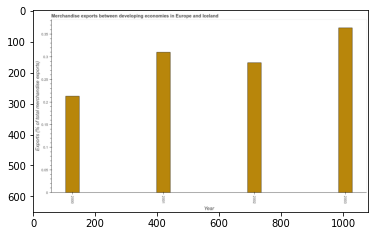

Number of QA =  23





Year  Exports (% of total merchandise exports)
0  2003                                  0.363651
1  2000                                  0.214087
2  2001                                  0.311534
3  2002                                  0.287967

> what is the title of the graph ?
PREDICTED =  Merchandise exports between developing economies in Europe and Iceland
EXPECTED =  Merchandise exports between developing economies in Europe and Iceland




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 2 / 2 = 1.0


> what is the label or title of the y-axis ?
PREDICTED =  Exports (% of total merchandise exports)
EXPECTED =  Exports (% of total merchandise exports)




				 3 / 3 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the merchandise exports in 2002 and 2003 ?
PREDICTED =  -0.07568395905442099
EXPECTED =  -0.077




				 4 / 4 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the median merchandise exports ?
PREDICTED =  0.29975069892349016
EXP

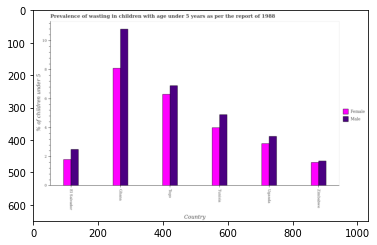

Number of QA =  28





Country    Female       Male
0        Ghana  8.227049  10.898861
1      Tunisia  4.026441   4.944326
2  El Salvador  1.847232   2.546712
3     Zimbabwe  1.636212   1.744052
4       Uganda  2.965342   3.398010
5         Togo  6.344289   6.895749

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of undernourished female children in zimbabwe and the percentage of undernourished male children in el salvador?
PREDICTED =  -0.21102020091212914
EXPECTED =  -0.8999999761581401




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the ratio of the percentage of undernourished male children in el salvador to that in ghana ?
PREDICTED =  0.23366775257495773
EXPECTED =  0.2314814773933707




				

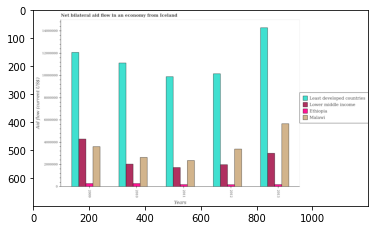

Number of QA =  30





Years  Least developed countries  ...       Ethiopia  Lower middle income
0   2012               1.013916e+07  ...  217329.953777         1.994674e+06
1   2010               1.110832e+07  ...  322685.263860         2.063897e+06
2   2009               1.202464e+07  ...  318953.589736         4.336531e+06
3   2013               1.422285e+07  ...  227441.340720         3.021369e+06
4   2011               9.879747e+06  ...  223853.133822         1.743705e+06

[5 rows x 5 columns]

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the net bilateral aid flow in malawi in 2010 and that in 2011 ?
PREDICTED =  278005.9066716125
EXPECTED =  280000




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the net bilateral aid flow in malawi in 2010 and the net bilateral aid flow in least developed countries in 2012?
PREDICTED =  -741572.1709066681
EXPECTED =  -7520000




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2010, what is the difference between the net bilateral aid flow in least developed countries and net bilateral aid flow in lower middle income ?
PREDICTED =  55631001.53144585
EXPECTED =  909000

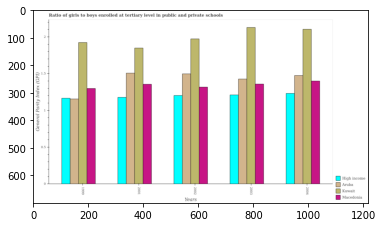

Number of QA =  30





Years  High income     Aruba  Macedonia    Kuwait
0   2004     1.243104  1.487077   1.409938  2.121054
1   2003     1.222009  1.441226   1.376764  2.144166
2   1999     1.175675  1.163774   1.307510  1.922245
3   2002     1.214519  1.508706   1.330254  1.969215
4   2001     1.189719  1.511963   1.365006  1.847691

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the general parity index in kuwait in 2001 and that in 2002 ?
PREDICTED =  -0.12152407244961005
EXPECTED =  -0.1244199275970499




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the general parity index in kuwait in 2002 and the general parity index in macedonia in 2004?
PREDICTED =  -0.15183893372398738
EXPECTED =  0.5728399753570599




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2002, what is the difference between the general parity index in kuwait and general parity index in macedonia ?
PREDICTED =  -2.85583352586991
EXPECTED =  0.655179977417




				 1 / 3 = 0

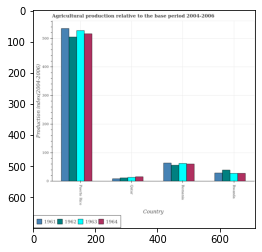

Number of QA =  30





Country        1963        1964        1962        1961
0        Qatar   15.933474   18.040780   14.563386   11.091762
1      Romania   65.300233   63.384210   58.819106   66.413677
2       Rwanda   30.260649   30.329499   41.424348   31.460760
3  Puerto Rico  533.703841  523.116442  512.654816  542.009493

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the agricultural production index in 1962 in puerto rico and that in qatar ?
PREDICTED =  -14.56338568200988
EXPECTED =  492.97999999999996




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the agricultural production index in 1961 in rwanda and the agricultural production index in 1962 in qatar?
PREDICTED =  20.368997586181713
EXPECTED =  17.16




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the agricultural production index of/in 1962 and agricultural production index of/in 1961 in qatar?
PREDICTED =  47.727343931295614
EXPECTED =  3.0




				 0

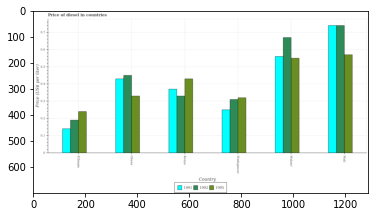

Number of QA =  29





Country      1992      1995      1991
0       Kenya  0.332092  0.431715  0.371499
1       Ghana  0.451638  0.332289  0.431895
2      Malawi  0.669933  0.550619  0.564260
3        Mali  0.737930  0.570579  0.739612
4  Madagascar  0.310516  0.321424  0.252650
5    Ethiopia  0.193145  0.242930  0.143216

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the price of diesel in 1995 in ethiopia and that in ghana ?
PREDICTED =  -0.08935887964390923
EXPECTED =  -0.09000000000000002




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the price of diesel in 1991 in malawi and the price of diesel in 1992 in kenya?
PREDICTED =  0.19276168884538308
EXPECTED =  0.23000000000000004




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the price of diesel of/in 1995 and price of diesel of/in 1991 in kenya?
PREDICTED =  0.1990798987874814
EXPECTED =  0.06




				 1 / 3 = 0.3333


is_built_with_cuda: True
is_gpu_avail

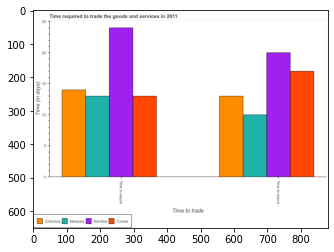

Number of QA =  23





Time to trade   Colombia   Malaysia    Tunisia    Namibia
0  Time to import  13.022639  10.060638  17.057824  20.085637
1  Time to export  14.061275  13.037727  13.069889  24.029221

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 4 = 0.0


> what is the difference between two consecutive major ticks on the y-axis ?
PREDICTED =  Time (in days)
EXPECTED =  5.0




				 0 / 5 = 0.0


> what is the title of the graph ?
PREDICTED =  Time required to trade the goods and services in 2011
EXPECTED =  Time required to trade the goods and services in 2011




				 1 / 6 = 0.1667


> what is the label or title of the x-axis ?
P

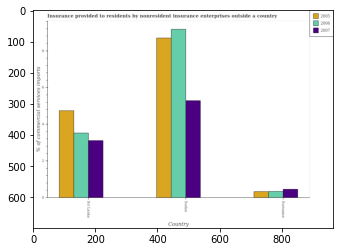

Number of QA =  29





Country      2007      2005      2006
0   Suriname  0.487910  0.361170  0.368865
1      Sudan  5.367767  8.782772  9.257836
2  Sri Lanka  3.159220  4.793409  3.587213

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the insurance provided to residents in 2007 in sudan and that in suriname ?
PREDICTED =  4.879857443210044
EXPECTED =  4.831320527180635




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the insurance provided to residents in 2005 in sudan and the insurance provided to residents in 2006 in suriname?
PREDICTED =  8.421602038863325
EXPECTED =  8.361160550971247




				 2 / 2 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 2 / 3 = 0.6667


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the ratio 

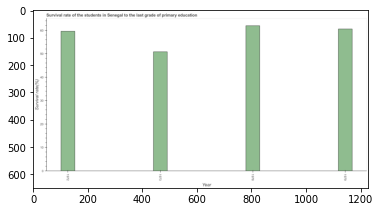

Number of QA =  23





Year  Survival rate(%)
0  1978         62.957318
1  1973         51.643549
2  1972         60.167907
3  1979         61.407565

> what is the title of the graph ?
PREDICTED =  Survival rate of the students in Senegal to the last grade of primary education
EXPECTED =  Survival rate of the students in Senegal to the last grade of primary education




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 2 / 2 = 1.0


> what is the label or title of the y-axis ?
PREDICTED =  Survival rate(%)
EXPECTED =  Survival rate(%)




				 3 / 3 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the survival rate in primary education in 1973 and 1979 ?
PREDICTED =  -9.764015987026426
EXPECTED =  -9.737




				 4 / 4 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the median survival rate in primary education ?
PREDICTED =  1975.5
EXPECTED =  60.080

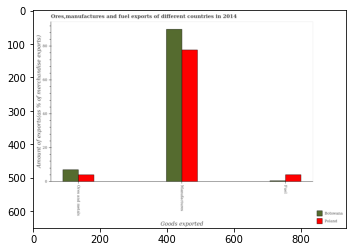

Number of QA =  28





Goods exported   Botswana     Poland
0     Manufactures  90.011207  78.033453
1             Fuel        NaN   4.353666
2  Ores and metals   7.336327   4.334570

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of manufactures exports in botswana and that in poland ?
PREDICTED =  11.977754885458026
EXPECTED =  12.172301205931888




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of ores and metals exports in poland and the percentage of fuel exports in botswana?
PREDICTED =  3.0017565806287267
EXPECTED =  3.5286688428744926




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of ores and metals exports and percentage of manufactures exports in poland ?
PREDICTED =  3.0017565806287267
EXPECTED =  -73.73145783367585




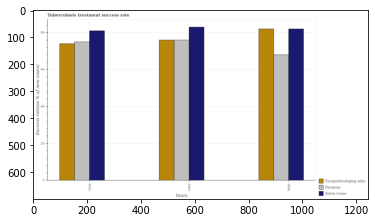

Number of QA =  29





Years  Sierra Leone  Europe(developing only)   Paraguay
0   2003     82.928247                76.018438  76.434983
1   2004     82.193371                82.169019  68.951628
2   2002     81.159750                73.989551  75.427655

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the tuberculosis treatment success rate in europe(developing only) in 2002 and that in 2003 ?
PREDICTED =  -2.028886354828714
EXPECTED =  -2




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the tuberculosis treatment success rate in paraguay in 2002 and the tuberculosis treatment success rate in europe(developing only) in 2004?
PREDICTED =  6.476027169067265
EXPECTED =  -7.0




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2002, what is the difference between the tuberculosis treatment success rate in sierra leone and tuberculosis treatment success rate in paraguay ?

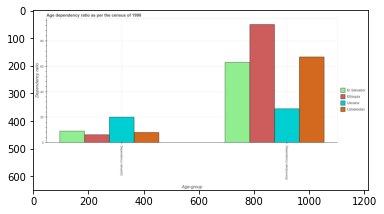

Number of QA =  23





Age-group  Uzbekistan  El Salvador    Ukraine   Ethiopia
0    Dependency ratio(old)    8.361195     9.322253  20.397179   6.570205
1  Dependency ratio(young)   67.937282    63.516846  26.802032  93.289951

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the age dependency ratio(old) in ethiopia ?
PREDICTED =  3.2851025983733932
EXPECTED =  6.18207308150962




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in which country was the age dependency ratio(old) maximum ?
PREDICTED =  4.180597694741113
EXPECTED =  Ukraine




				 0 / 5 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in which country

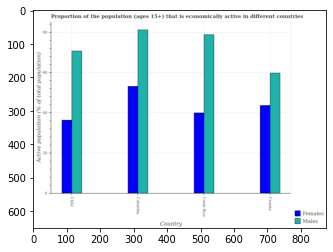

Number of QA =  28





Country      Males    Females
0    Colombia  81.776380  53.514906
1  Costa Rica  79.230368  40.323580
2     Croatia  59.963924  43.946959
3       Chile  70.867946  36.774987

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of economically active female population in chile and that in costa rica ?
PREDICTED =  -3.548592600891517
EXPECTED =  -3.600002288818402




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of economically active male population in croatia and the percentage of economically active female population in colombia?
PREDICTED =  -21.812455809675534
EXPECTED =  6.600002288818402




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of economically active female population and percentage of economically active male pop

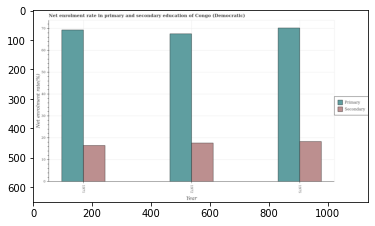

Number of QA =  28





Year  Secondary    Primary
0  1971  16.768582  70.095861
1  1972  17.622552  67.661360
2  1975  18.449518  70.351934

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the enrollment rate in secondary education in 1971 and that in 1972 ?
PREDICTED =  -0.8539695046514204
EXPECTED =  -1.1385099999999895




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the enrollment rate in secondary education in 1971 and the enrollment rate in primary education in 1975?
PREDICTED =  -1.6809360047558606
EXPECTED =  -1.8213899999999974




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 1975, what is the difference between the enrollment rate in secondary education and enrollment rate in primary education ?
PREDICTED =  49.840651552884864
EXPECTED =  0.0

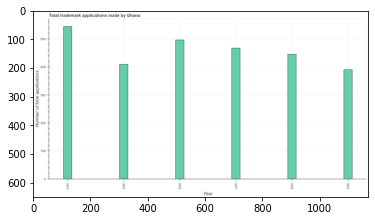

Number of QA =  23





Year  Number of total applications
0  1974                    550.723644
1  1976                    500.882415
2  1978                    449.076599
3  1975                    413.635735
4  1977                    470.672825
5  1979                    394.753337

> what is the title of the graph ?
PREDICTED =  Total trademark applications made by Ghana
EXPECTED =  Total trademark applications made by Ghana




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 2 / 2 = 1.0


> what is the label or title of the y-axis ?
PREDICTED =  Number of total applications
EXPECTED =  Number of total applications




				 3 / 3 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of trademark applications in 1974 and 1975 ?
PREDICTED =  137.0879094375249
EXPECTED =  135.0




				 4 / 4 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the median number of trademark applications ?
PREDICTED =  1976.5
EXPECTED =  456.0




				 4 / 5 = 0.8


is_built_with_cuda: True
is_gpu_a

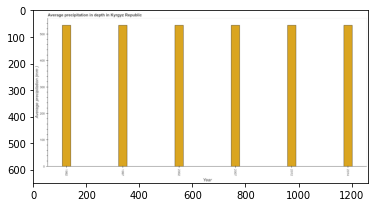

Number of QA =  23





Year  Average precipitation (mm )
0  1997                   537.059152
1  2014                   536.386125
2  2002                   536.268184
3  2012                   536.826689
4  1992                   537.260923
5  2007                   536.855751

> what is the title of the graph ?
PREDICTED =  Average precipitation in depth in Kyrgyz Republic
EXPECTED =  Average precipitation in depth in Kyrgyz Republic




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 2 / 2 = 1.0


> what is the label or title of the y-axis ?
PREDICTED =  Average precipitation (mm )
EXPECTED =  Average precipitation (mm )




				 3 / 3 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the average precipitation in depth in 1997 and 2014 ?
PREDICTED =  0.6730271612094612
EXPECTED =  0.0




				 3 / 4 = 0.75


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the median average precipitation in depth ?
PREDICTED =  536.6064071519617
EXPECTED =  533.0




				 4 / 5 = 0.8


is_built_with_

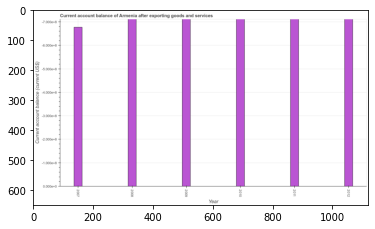

Number of QA =  12





Year  Current account balance (current US$)
0  2009                               7.225452
1  2008                               7.229201
2  2011                               7.194824
3  2010                               7.219958
4  2007                               6.855845
5  2012                               7.211593

> what is the title of the graph ?
PREDICTED =  Current account balance of Armenia after exporting goods and services
EXPECTED =  Current account balance of Armenia after exporting goods and services




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 2 / 2 = 1.0


> what is the label or title of the y-axis ?
PREDICTED =  Current account balance (current US$)
EXPECTED =  Current account balance (current US$)




				 3 / 3 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the median current account balance ?
PREDICTED =  7.042522772058588
EXPECTED =  0.0




				 3 / 4 = 0.75


> what is the difference between two consecutive major ticks on the y-axis ?
PREDICTED =  Current account balance (current US$)
EXPECTED =  100000000.0




				 3 / 5 = 0.6


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predictin

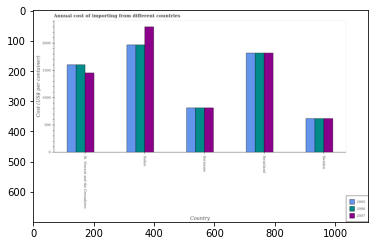

Number of QA =  29





Country         2007         2005         2006
0                          Sweden   629.442301   628.869284   627.421556
1                        Suriname   826.770790   824.262549   825.923567
2                           Sudan  2312.167858  1988.980840  1984.503733
3                       Swaziland  1835.514852  1832.765662  1832.195869
4  St. Vincent and the Grenadines  1466.377732  1617.155699  1615.359529

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total annual cost of importing in 2007 in st. vincent and the grenadines and that in suriname ?
PREDICTED =  -826.7707904355591
EXPECTED =  640.0




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total annual cost of importing in 2005 in swaziland and the total annual cost of importing in 2006 in st. vincent and the grenadines?
PREDICTED =  215.60996244763828
EXPECTED =  215.0




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total annual cost of importing of/in 2005 and total annual cost of importing of/in 2007 in sweden?
PREDICTED =  62

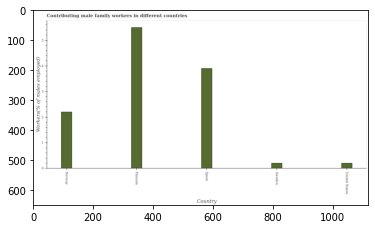

Number of QA =  22





Country  Workers(% of males employed)
0         Norway                      2.231093
1            NaN                      3.934302
2         Panama                      5.535025
3         Sweden                      0.218375
4  United States                      0.218259

> what is the title of the graph ?
PREDICTED =  Contributing male family workers in different countries
EXPECTED =  Contributing male family workers in different countries




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  Country
EXPECTED =  Country




				 2 / 2 = 1.0


> what is the label or title of the y-axis ?
PREDICTED =  Workers(% of males employed)
EXPECTED =  Workers(% of males employed)




				 3 / 3 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 3 / 4 = 0.75


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 3 / 5 = 0.6


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the ratio of the contributing male family workers in norway to that in spain?
PREDICTED =  0.

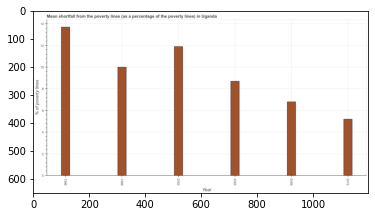

Number of QA =  23





Year  % of poverty lines
0  2002           11.844188
1  2009            6.775518
2  1999            9.971078
3  1996           13.653611
4  2012            5.189523
5  2005            8.647939

> what is the title of the graph ?
PREDICTED =  Mean shortfall from the poverty lines (as a percentage of the poverty lines) in Uganda
EXPECTED =  Mean shortfall from the poverty lines (as a percentage of the poverty lines) in Uganda




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 2 / 2 = 1.0


> what is the label or title of the y-axis ?
PREDICTED =  % of poverty lines
EXPECTED =  % of poverty lines




				 3 / 3 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the poverty gap at national poverty lines in 2005 and 2009 ?
PREDICTED =  1.8724205903239124
EXPECTED =  1.9




				 4 / 4 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the median poverty gap at national poverty lines ?
PREDICTED =  9.30

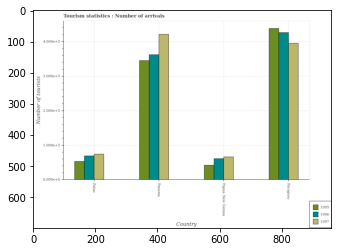

Number of QA =  29





Country      1996      1997      1995
0  Papua New Guinea  0.625129  0.672547  0.433730
1             Palau  0.699301  0.754851  0.545508
2            Panama  3.637743  4.223584  3.457172
3          Paraguay  4.267594  3.968323  4.388929

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of tourist arrivals in 1997 in panama and that in papua new guinea ?
PREDICTED =  3.551036863942724
EXPECTED =  355000.0




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of tourist arrivals in 1997 in papua new guinea and the number of tourist arrivals in 1996 in palau?
PREDICTED =  -0.08230380166908846
EXPECTED =  -3000.0




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of tourist arrivals of/in 1997 and number of tourist arrivals of/in 1995 in panama?
PREDICTED =  6.162132710440998
EXPECTED =  76000.0




				 0 /

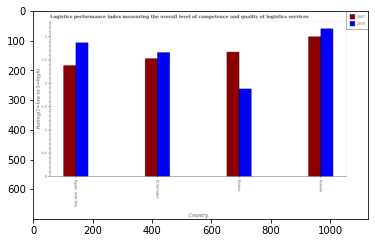

Number of QA =  28





Country      2007      2010
0           Eritrea  2.703967  1.902943
1           Estonia  3.028153  3.192956
2  Egypt, Arab Rep.  2.409071  2.898424
3       E] Salvador  2.557347  2.683275

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the logistic performance index in 2010 in el salvador and that in eritrea ?
PREDICTED =  0.780332495293639
EXPECTED =  0.7800000000000002




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the logistic performance index in 2007 in estonia and the logistic performance index in 2010 in eritrea?
PREDICTED =  0.3241859194950685
EXPECTED =  1.12




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the logistic performance index of/in 2007 and logistic performance index of/in 2010 in eritrea?
PREDICTED =  8.795594766793553
EXPECTED =  0.79




				 1 / 3 = 0.3

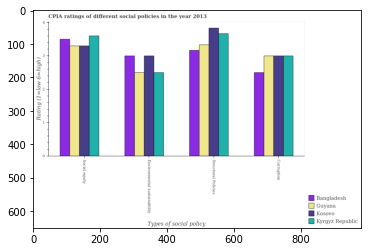

Number of QA =  29





Types of social policy  Kyrgyz Republic  ...    Guyana  Bangladesh
0                    Corruption         3.030681  ...  3.017674    2.523992
1           Structural Policies         3.688348  ...  3.342678    3.185033
2                 Social equity         3.622982  ...  3.311553    3.488252
3  Environmental sustainability         2.512927  ...  2.512014    2.996992

[4 rows x 5 columns]

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the cpia rating of structural policies in bangladesh and that in kyrgyz republic ?
PREDICTED =  0.0
EXPECTED =  -0.5




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the cpia rating of corruption in bangladesh and the cpia rating of social equity in guyana?
PREDICTED =  1.5239923278954923
EXPECTED =  -0.7999999999999998




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the ratio of the cpia rating of structural policies 

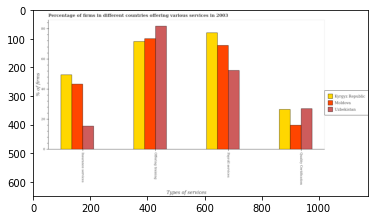

Number of QA =  29





Types of services  Uzbekistan  Kyrgyz Republic    Moldova
0       Payroll services   52.279226        77.213823  68.902237
1     Insurance services   15.687926        49.612326  43.321895
2  Quality Certification   26.974392        26.538279  16.176120
3      Offering training   81.400907        71.417701  73.348821

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of firms offering payroll services in moldova and that in uzbekistan ?
PREDICTED =  16.623010836750645
EXPECTED =  16.6




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of firms offering insurance services in moldova and the percentage of firms offering quality certification in uzbekistan?
PREDICTED =  27.633969179383513
EXPECTED =  16.299999999999997




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of firms offering quality certification and percentage of firms offering payroll services in kyrgyz republ

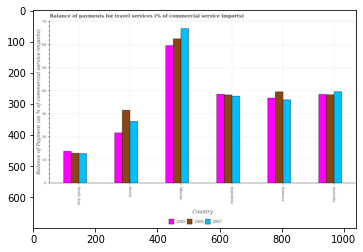

Number of QA =  29





Country       2007       2005       2006
0         NaN  67.120358  60.098516  63.310381
1     Armenia  36.478917  37.282415  39.879041
2       World  27.023133  22.014240  31.727694
3   Australia  39.644786  38.709420  38.533203
4   Argentina  38.054542  38.763563  38.563214
5  South Asia  13.142250  14.137193  13.305185

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the balance of payments for travel services in 2007 in armenia and that in south asia ?
PREDICTED =  23.336666557165223
EXPECTED =  23.309092702616404




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the balance of payments for travel services in 2007 in armenia and the balance of payments for travel services in 2006 in world?
PREDICTED =  9.455783769438916
EXPECTED =  4.504262659100803




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the balance of payments for travel services of/in 2005 and balance of payments for travel services of/in 2007 in al

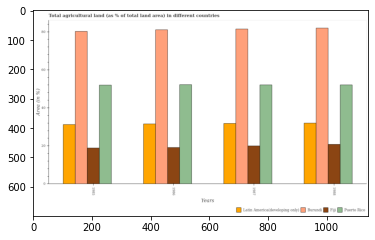

Number of QA =  30





Years       Fiji  Latin America(developing only)    Burundi  Puerto Rico
0   1985  19.159219                       31.338384  80.262643    52.433791
1   1986  19.444994                       31.884401  81.326851    52.602278
2   1987  20.274280                       32.020009  81.971303    52.530682
3   1988  21.098914                       32.266204  82.688344    52.648951

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of agricultural land in latin america(developing only) in 1986 and that in 1987 ?
PREDICTED =  -0.13560828285036308
EXPECTED =  -0.24562761182479065




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of agricultural land in fiji in 1986 and the percentage of agricultural land in puerto rico in 1985?
PREDICTED =  0.2857750699858208
EXPECTED =  -32.815854380213096




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 1986, what is the difference between the percentage of agricultural land in fiji and percentage of agricultural land in burundi ?
P

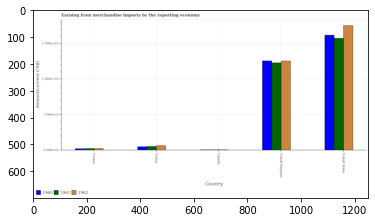

Number of QA =  29





Country      1962      1961      1960
0          Uganda       NaN       NaN       NaN
1         Tunisia  0.030424  0.030222  0.028458
2          Turkey  0.071745  0.060968  0.056648
3   United States  1.763732  1.589495  1.627391
4  United Kingdom  1.262191  1.235723  1.264212

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount earned from merchandise imports in 1960 in tunisia and that in united states ?
PREDICTED =  -1.5989327557185797
EXPECTED =  -15979600000.0




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount earned from merchandise imports in 1962 in united kingdom and the amount earned from merchandise imports in 1961 in tunisia?
PREDICTED =  1.2317661577672017
EXPECTED =  12324800000.0




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the amount earned from merchandise imports of/in 1960 and amount earned from merchandise imports of/in 1961 in t

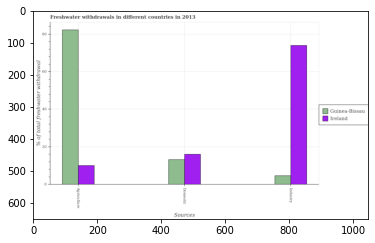

Number of QA =  28





Sources  Guinea-Bissau    Ireland
0     Industry       4.849192  74.448495
1  Agriculture      82.815398  10.304400
2     Domestic      13.463022  16.349518

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of freshwater withdrawal for agriculture in guinea-bissau and that in ireland ?
PREDICTED =  72.51099796929716
EXPECTED =  72.29




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of freshwater withdrawal for domestic purposes in guinea-bissau and the percentage of freshwater withdrawal for agriculture in ireland?
PREDICTED =  -13.190896860988003
EXPECTED =  3.1400000000000006




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 1 / 3 = 0.3333


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished a

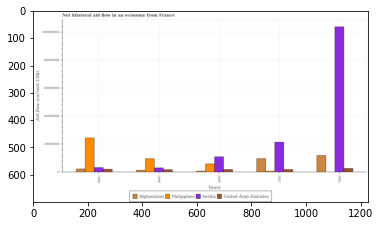

Number of QA =  27





Years   Philippines  United Arab Emirates   Afghanistan        Serbia
0   2001           NaN          2.156481e+06  9.952692e+06  2.177327e+07
1   2002           NaN          2.898167e+06  1.206227e+07  1.045190e+08
2   1999  9.849760e+06          2.054698e+06  1.596208e+06  3.312375e+06
3   1998  2.479353e+07          2.364944e+06  2.601439e+06  3.578268e+06
4   2000  6.189670e+06          2.082371e+06           NaN  1.126943e+07

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the net bilateral aid flow in serbia in 1998 and that in 2000 ?
PREDICTED =  -7691159.813651956
EXPECTED =  -7700000.0




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the net bilateral aid flow in united arab emirates in 2000 and the net bilateral aid flow in serbia in 1999?
PREDICTED =  27672.977344358573
EXPECTED =  -1160000.0




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2002, what is the difference between the net bilateral aid flow in afghanistan and net bilateral aid flow in serbia ?
PREDICTED =  12062263.839128105
EXPECTED =  -91880000.0




				 1 / 3 = 0

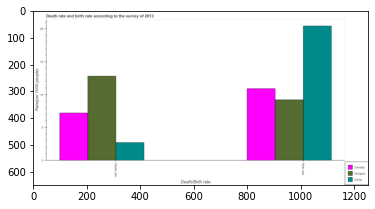

Number of QA =  23





Death/Birth rate    Hungary       Oman     Canada
0       Death rate  12.829225   2.741166   7.243251
1       Birth rate   9.211405  20.528496  10.948644

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the birth rate in oman and the death rate in hungary?
PREDICTED =  7.699270834271564
EXPECTED =  7.619




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 1 / 3 = 0.3333


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the ratio of the death rate in canada to that in oman ?
PREDICTED =  2.6423977569948
EXPECTED =  2.6558465510881595




				 2 / 4 = 0.5


> what is the difference between two consecutive major ticks on the y-axis ?
PREDICTED =  Rate(per 1000 people)
EXP

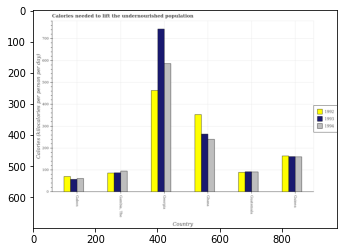

Number of QA =  29





Country        1992        1993        1994
0        Gabon   71.077442   58.042204   62.160262
1       Guinea  162.711087  161.793087  157.960221
2    Guatemala   88.929573   92.334800   92.109067
3  Gambia, The   85.745701   87.139337   95.288303
4        Ghana  353.740491  260.162528  239.813940
5      Georgia  460.582772  744.750838  583.171576

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total calories needed to lift the undernourished population in 1993 in georgia and that in guinea ?
PREDICTED =  582.9577513388804
EXPECTED =  583.0




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total calories needed to lift the undernourished population in 1994 in ghana and the total calories needed to lift the undernourished population in 1993 in guatemala?
PREDICTED =  147.47913980440381
EXPECTED =  148.0




				 2 / 2 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total calories needed to lift the undernourished population of/in 1992 and tot

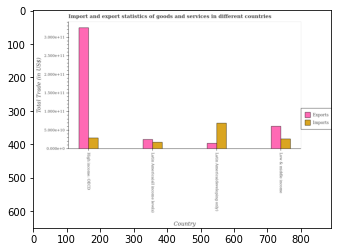

Number of QA =  28





Country   Imports   Exports
0               Low & middle income  0.277232  0.624185
1                 High income: OECD  0.302127  3.300432
2    Latin America(developing only)  0.701173  0.159392
3  Latin America(all income levels)  0.184505  0.261300

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the export of goods and services in latin america(developing only) and that in low & middle income ?
PREDICTED =  3.56173143397685
EXPECTED =  -45757373420.490295




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the imports of goods and services in latin america(all income levels) and the export of goods and services in high income: oecd?
PREDICTED =  1.162910229538158
EXPECTED =  -307936495039.65155




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the export of goods and services and imports of goods and services in high income: oecd ?
PREDICTED =

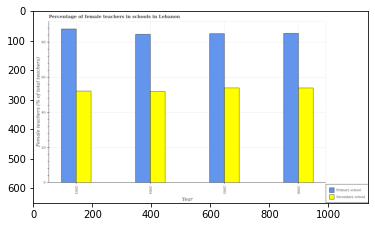

Number of QA =  28





Year  Primary school  Secondary school
0  2003       88.134528         52.807149
1  2004       84.874931         52.086767
2  2005       84.756464         53.992176
3  2006       85.714171         53.905146

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of female teachers in primary schools in 2004 and that in 2005 ?
PREDICTED =  0.11846659168034535
EXPECTED =  -0.38405609130859375




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of female teachers in primary schools in 2003 and the percentage of female teachers in secondary schools in 2004?
PREDICTED =  3.2595969499871558
EXPECTED =  3.044441223144503




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2006, what is the difference between the percentage of female teachers in secondary schools and percentage of female teachers in primary s

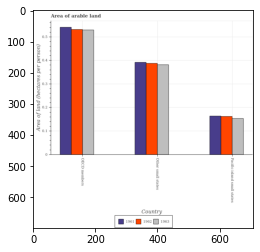

Number of QA =  29





Country      1963      1962      1961
0           Other small states  0.387945  0.391527  0.398548
1  Pacific island small states  0.156471  0.166919  0.167300
2                 OECD members  0.541084  0.539495  0.549322

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total arable land in 1962 in oecd members and that in other small states ?
PREDICTED =  0.14796766597533234
EXPECTED =  0.14381826894155797




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total arable land in 1963 in pacific island small states and the total arable land in 1961 in oecd members?
PREDICTED =  -0.38461231028411136
EXPECTED =  -0.387684356534529




				 2 / 2 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the total arable land of/in 1961 and total arable land of/in 1963 in other small states?
PREDICTED =  0.7272247507692062
EXPECTED =  0.

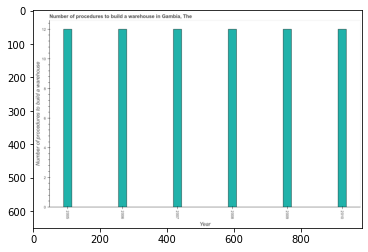

Number of QA =  23





Year  Number of procedures to build a warehouse
0  2010                                  12.137680
1  2006                                  12.187254
2  2005                                  12.134564
3  2008                                  12.158869
4  2007                                  12.098347
5  2009                                  12.150909

> what is the title of the graph ?
PREDICTED =  Number of procedures to build a warehouse in Gambia, The
EXPECTED =  Number of procedures to build a warehouse in Gambia, The




				 1 / 1 = 1.0


> what is the label or title of the x-axis ?
PREDICTED =  Year
EXPECTED =  Year




				 2 / 2 = 1.0


> what is the label or title of the y-axis ?
PREDICTED =  Number of procedures to build a warehouse
EXPECTED =  Number of procedures to build a warehouse




				 3 / 3 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of procedures to build a warehouse in 2005 and 2007 ?
PREDICTED =  0.03621654272499697
EXPECTED =  0.0




				 3 / 4 = 0.75


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the median number of procedures to build a warehouse ?
PREDICTED =  2007.5
E

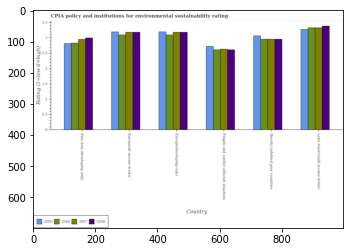

Number of QA =  30





Country      2007  ...      2006      2008
0                 Europe(all income levels)  3.229747  ...  3.128219  3.216561
1                   Europe(developing only)  3.203383  ...  3.129762  3.219090
2               East Asia (developing only)  2.992345  ...  2.864627  3.034549
3           Heavily indebted poor countries  2.996589  ...  2.998802  2.993535
4          Latin America(all income levels)  3.360580  ...  3.364230  3.431210
5  Fragile and conflict affected situations  2.664982  ...  2.648554  2.647054

[6 rows x 5 columns]

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the cpia rating in 2008 in europe(all income levels) and the cpia rating in 2006 in latin america(all income levels)?
PREDICTED =  -0.2146495960926158
EXPECTED =  -0.14583333333332993




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the cpia rating of/in 2005 and cpia rating of/in 2008 in heavily indebted poor countries?
PREDICTED =  0.32877953081910993
EXPECTED =  0.1099849849849801




				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.




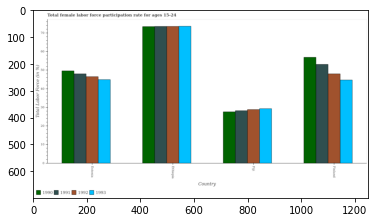

Number of QA =  30





Country       1992       1993       1990       1991
0   Estonia  46.780678  45.185123  50.018603  48.384385
1   Finland  48.290850  45.223109  57.153375  53.369784
2  Ethiopia  73.848380  74.245466  73.662742  73.987302
3      Fiji  29.300062  29.666482  28.050171  28.505546

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the female labor force participation rate in 1991 in fiji and that in finland ?
PREDICTED =  -24.86423818082108
EXPECTED =  -24.8999977111816




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the female labor force participation rate in 1992 in fiji and the female labor force participation rate in 1993 in finland?
PREDICTED =  -18.990788290199028
EXPECTED =  -15.900001525879002




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the female labor force participation rate of/in 1992 and female labor force participation rate of/in 1990 in finland?
PREDICT

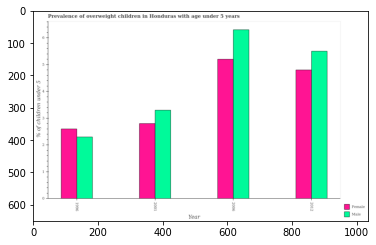

Number of QA =  28





Year    Female      Male
0  2001  2.833957  3.310490
1  2006  5.201630  6.313799
2  1996  2.625375  2.314633
3  2012  4.809321  5.499536

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of obese male children in 2006 and that in 2012 ?
PREDICTED =  0.8142633191985178
EXPECTED =  0.8000001907348606




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of obese male children in 2001 and the percentage of obese female children in 2012?
PREDICTED =  -2.1890461770205647
EXPECTED =  -2.20000004768372




				 2 / 2 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2006, what is the difference between the percentage of obese female children and percentage of obese male children ?
PREDICTED =  0.0
EXPECTED =  0.0




				 3 / 3 = 1.0


is_built_wit

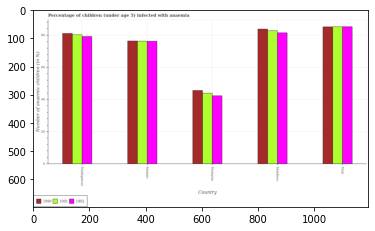

Number of QA =  29





Country       1992       1990       1991
0        Mali  85.893364  85.246368  86.078277
1      Malawi  76.960753  76.889958  76.935250
2    Malaysia  42.848843  46.077570  44.378209
3  Madagascar  79.774256  81.105925  80.884127
4    Maldives  82.322874  84.613449  83.243327

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of children infected with anaemia in in 1991 in madagascar and that in mali ?
PREDICTED =  -5.194149964826195
EXPECTED =  -5.0




				 1 / 1 = 1.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of children infected with anaemia in in 1992 in malawi and the percentage of children infected with anaemia in in 1991 in maldives?
PREDICTED =  -5.362120860954079
EXPECTED =  -6.599999999999994




				 1 / 2 = 0.5


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the percentage of children infected with anaemia in of/in 1991 and percentage of children infected with 

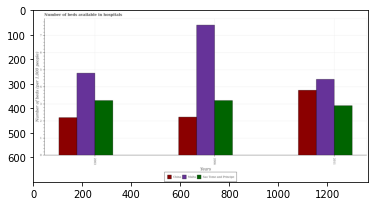

Number of QA =  29





Years     Malta     China  Sao Tome and Principe
0   2006  7.541639  2.214099               3.209361
1   2003  4.769756  2.220470               3.191544
2   2011  4.400148  3.805147               2.905564

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of beds in the hospiatls of in china in 2003 and that in 2006 ?
PREDICTED =  0.006370767202670713
EXPECTED =  -0.029999999999999805




				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the number of beds in the hospiatls of in china in 2011 and the number of beds in the hospiatls of in sao tome and principe in 2006?
PREDICTED =  1.5910477317121905
EXPECTED =  0.5999999999999996




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> in the year 2006, what is the difference between the number of beds in the hospiatls of in malta and number of beds in the hospiatls of in sao tome 

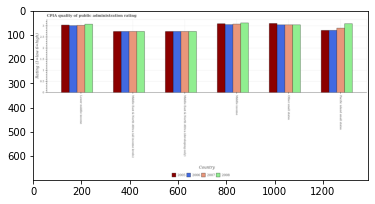

Number of QA =  30





Country      2007  ...      2008      2006
0                             Lower middle income  3.037187  ...  3.111848  3.030117
1                     Pacific island small states  2.917913  ...  3.128777  2.819662
2  Middle East & North Africa (all income levels)  2.764454  ...  2.771098  2.765761
3    Middle East & North Africa (developing only)  2.778140  ...  2.771688  2.779207
4                              Other small states  3.075243  ...  3.075355  3.056783
5                                   Middle income  3.108817  ...  3.170160  3.082400

[6 rows x 5 columns]

is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 1 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.





> what is the difference between the cpia rating in 2006 in middle east & north africa (all income levels) and the cpia rating in 2005 in middle income?
PREDICTED =  -0.12432894070343048
EXPECTED =  -0.3500000000000001




				 0 / 2 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 3 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 4 = 0.0


is_built_with_cuda: True
is_gpu_available: False
GPUs: []
Training or predicting ...
Evaluation finished after training step 0.







				 0 / 5 = 0.0


is_built_

In [ ]:
# IMAGE_IDs = list(map(str, plot_types["hbar_categorical"][:5]))
# NO_CSV = 2

# IMAGE_IDs = []
# files = random.sample(csvs, NO_CSV)
# for f in files:
#   w = f.split("/content/final_csv/")[-1]
#   IMAGE_IDs.append(w.split(".csv")[0])

per_img_data_v = []
IMG_COUNT = 0
for TEST_IMG in v_IMAGE_IDs:

  TOTAL_QA = 0
  TOTAL_CORRECT_QA = 0
  
  IMG_COUNT += 1
  print("Image number = ", IMG_COUNT)
  print("\n\n")
  
  IMAGE_ID = TEST_IMG

  ind, plotqa_questions, plotqa_answers = display_image_qa_pairs(IMAGE_ID)

  df = pd.read_csv('/content/final_csv/' + IMAGE_ID + '.csv')
  

  dic_labels = dict()
  for col in df.columns:
    if col == 'xlabel':
      dic_labels['xlabel'] = df['xlabel'].iloc[-1].strip()
    elif col == 'ylabel':
      dic_labels['ylabel'] = df['ylabel'].iloc[-1].strip()
    elif col == 'title':
      dic_labels['title'] = df['title'].iloc[-1].strip()
  

  df.drop(axis = 1 , labels = ['Unknown' , 'xlabel' , 'ylabel' ,'title' , 'legend orientation'] , inplace= True, errors = 'ignore')
  columns = list(df.columns)

  display(df)

  data = get_list_of_list('/content/final_csv/' + IMAGE_ID + '.csv', False)

  question_answer = dict()
  for i, q in enumerate(plotqa_questions):
      question_answer[q.lower()] = plotqa_answers[i]

  questions = plotqa_questions    

  tapas_questions, tabfact_questions = binary_classifier_predict(questions)
  tapas_find_answers(tapas_questions, columns, data, question_answer, dic_labels)
  tabfact_find_answers(data, tabfact_questions, columns, question_answer) 

  ACCURACY = round(TOTAL_CORRECT_QA * 100 / TOTAL_QA, 4)
  per_img_data_v.append([TEST_IMG, TOTAL_CORRECT_QA, TOTAL_QA, ACCURACY])

In [ ]:
per_img_data_v

[['32448', 9, 23, 39.1304],
 ['32897', 17, 23, 73.913],
 ['22421', 7, 18, 38.8889],
 ['22955', 14, 27, 51.8519],
 ['33321', 17, 23, 73.913],
 ['31624', 7, 18, 38.8889],
 ['28322', 5, 16, 31.25],
 ['32410', 15, 23, 65.2174],
 ['23249', 5, 15, 33.3333],
 ['25674', 12, 28, 42.8571],
 ['31570', 13, 29, 44.8276],
 ['25689', 8, 28, 28.5714],
 ['23002', 18, 27, 66.6667],
 ['22659', 6, 23, 26.087],
 ['32682', 15, 19, 78.9474],
 ['26734', 10, 24, 41.6667],
 ['27511', 7, 17, 41.1765],
 ['24699', 8, 28, 28.5714],
 ['28182', 11, 28, 39.2857],
 ['32435', 13, 19, 68.4211],
 ['25322', 4, 17, 23.5294],
 ['24365', 6, 16, 37.5],
 ['31180', 4, 18, 22.2222],
 ['28414', 6, 17, 35.2941],
 ['31267', 3, 23, 13.0435],
 ['22716', 7, 22, 31.8182],
 ['24746', 8, 29, 27.5862],
 ['29007', 5, 18, 27.7778],
 ['26252', 11, 29, 37.931],
 ['23549', 13, 28, 46.4286],
 ['31259', 17, 29, 58.6207],
 ['22427', 14, 28, 50.0],
 ['27741', 5, 28, 17.8571],
 ['27633', 10, 28, 35.7143],
 ['25641', 12, 28, 42.8571],
 ['30126', 8, 2

In [ ]:
df_ver_per_img = pd.DataFrame(per_img_data_v, columns=["Image ID", "Correct QA", "Total QA", "Accuracy"])
df_ver_per_img

Image ID  Correct QA  Total QA  Accuracy
0     32448           9        23   39.1304
1     32897          17        23   73.9130
2     22421           7        18   38.8889
3     22955          14        27   51.8519
4     33321          17        23   73.9130
..      ...         ...       ...       ...
95    31377           9        18   50.0000
96    22696          13        28   46.4286
97    25551           8        17   47.0588
98    27150          13        28   46.4286
99    30482          10        30   33.3333

[100 rows x 4 columns]

In [ ]:
print(f"AVERAGE ACCURACY FOR VERTICAL IMGS = {round(df_ver_per_img['Accuracy'].mean(), 4)} %")

AVERAGE ACCURACY FOR VERTICAL IMGS = 42.6515 %


## Save the data

In [ ]:
df_ver_per_img.to_csv("vertical.csv", encoding='utf-8', index=False)

In [ ]:
!cp /content/vertical.csv /content/drive/MyDrive/Evaluation

In [ ]:
files.download('vertical.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_hor_per_img.to_csv("horizonal.csv", encoding='utf-8', index=False)

In [ ]:
df_ver_per_img.to_csv("vertical.csv", encoding='utf-8', index=False)

In [ ]:
!cp /content/horizonal.csv /content/drive/MyDrive/Evaluation

In [ ]:
!cp /content/vertical.csv /content/drive/MyDrive/Evaluation

In [ ]:
files.download('horizonal.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('vertical.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_ver  = pd.read_csv("/content/vertical.csv")

In [ ]:
df_ver.columns

Index(['Image ID', 'Correct QA', 'Total QA', 'Accuracy'], dtype='object')

In [ ]:
sum(list(df_ver['Total QA']))

2300